In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")




In [2]:
path = r"/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Fall/ICSI 518 Software Engineering/Project/Results/Comparison charts"

In [4]:
AR = pd.read_csv(path+"//AR.csv").drop("Unnamed: 0",axis=1)
ARIMA = pd.read_csv(path+"//ARIMA.csv").drop("Unnamed: 0",axis=1)
SARIMA = pd.read_csv(path+"//SARIMA.csv").drop("Unnamed: 0",axis=1)
Deep = pd.read_csv(path+"//LSTM-RNN.csv").drop("Unnamed: 0",axis=1)
Supervised = pd.read_csv(path+"//LR-RF-SVR.csv").drop("Unnamed: 0",axis=1)
mae = pd.concat([AR,ARIMA,SARIMA,Deep,Supervised])

In [5]:
mae.columns

Index(['station', 'model', 'train_method', 'target', 'window', 'mae'], dtype='object')

CHES
prediction with target only
temperature
5
15
30
humidity
5
15
30
precipitation
5
15
30
prediction with whole dataset
temperature
5
15
30
humidity
5
15
30
precipitation
5
15
30


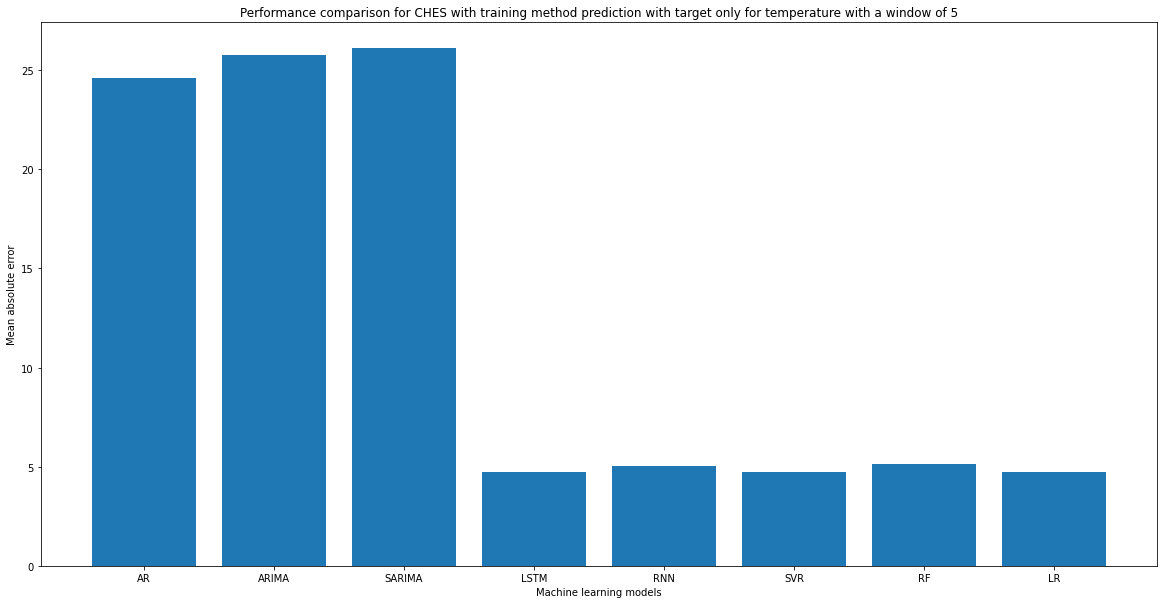

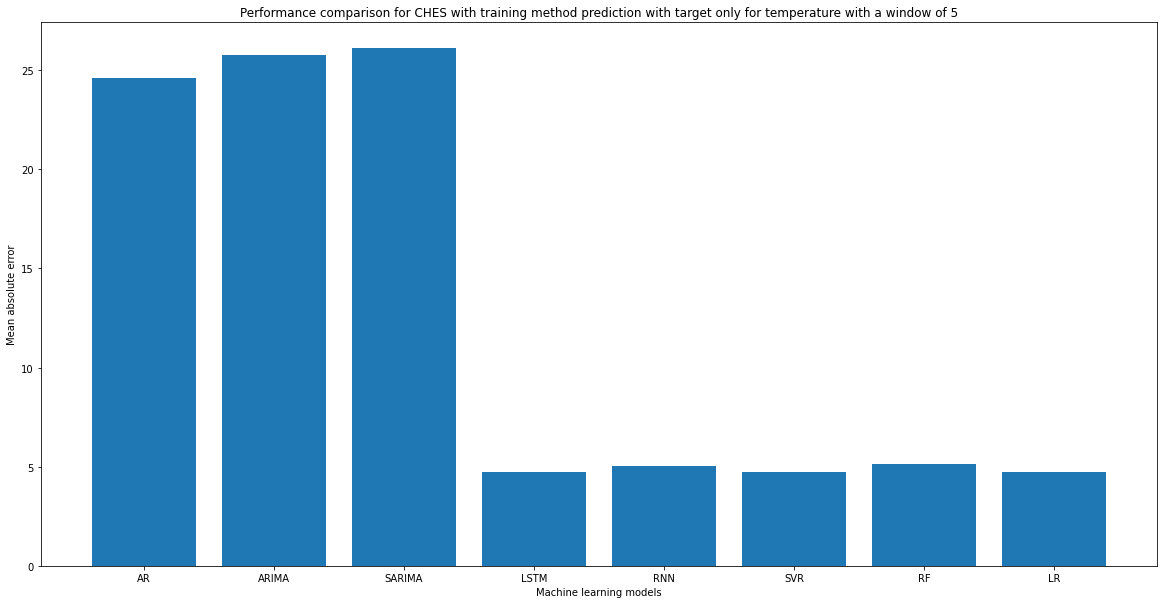

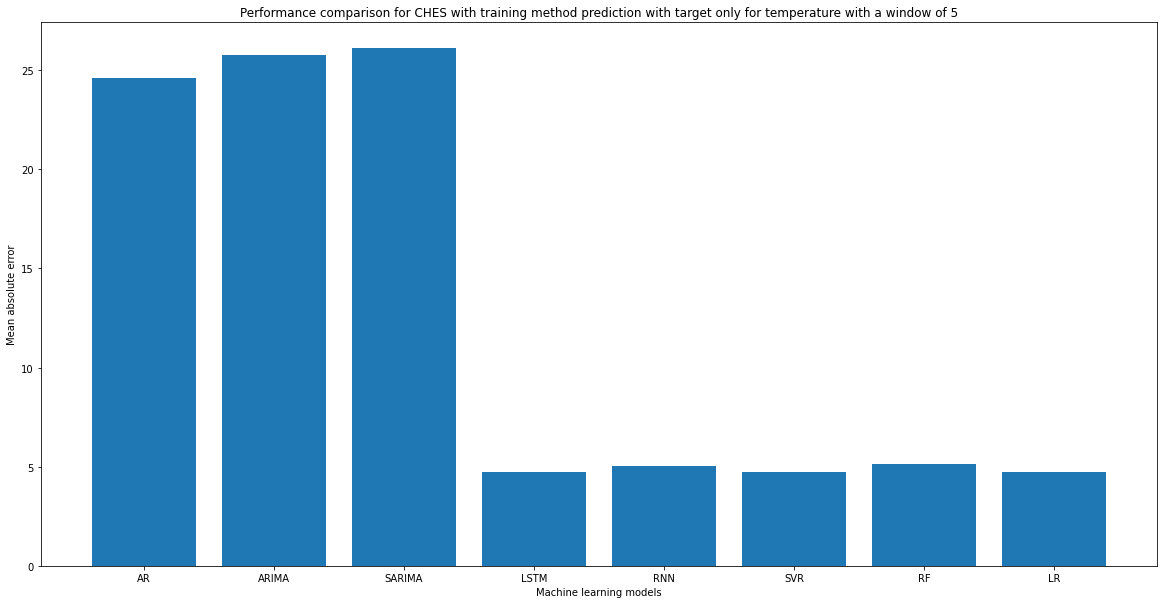

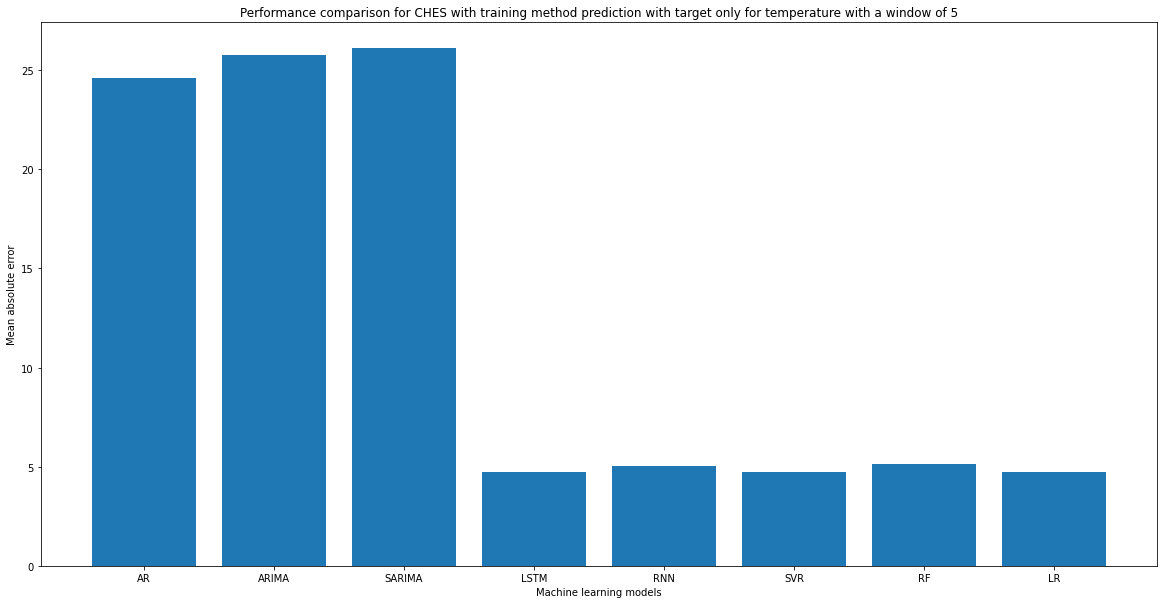

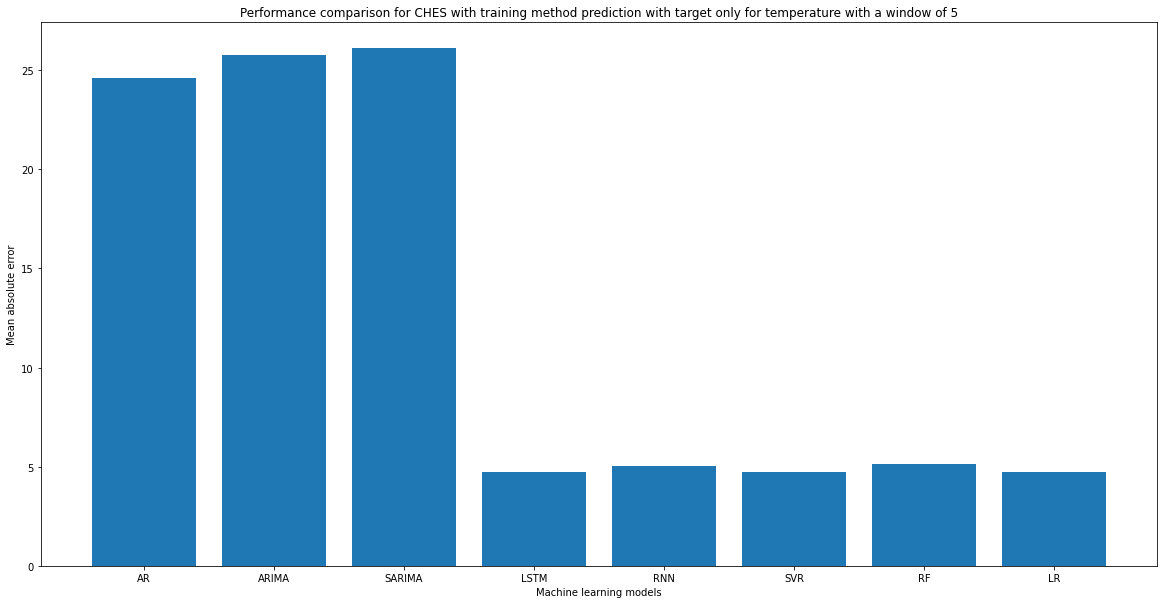

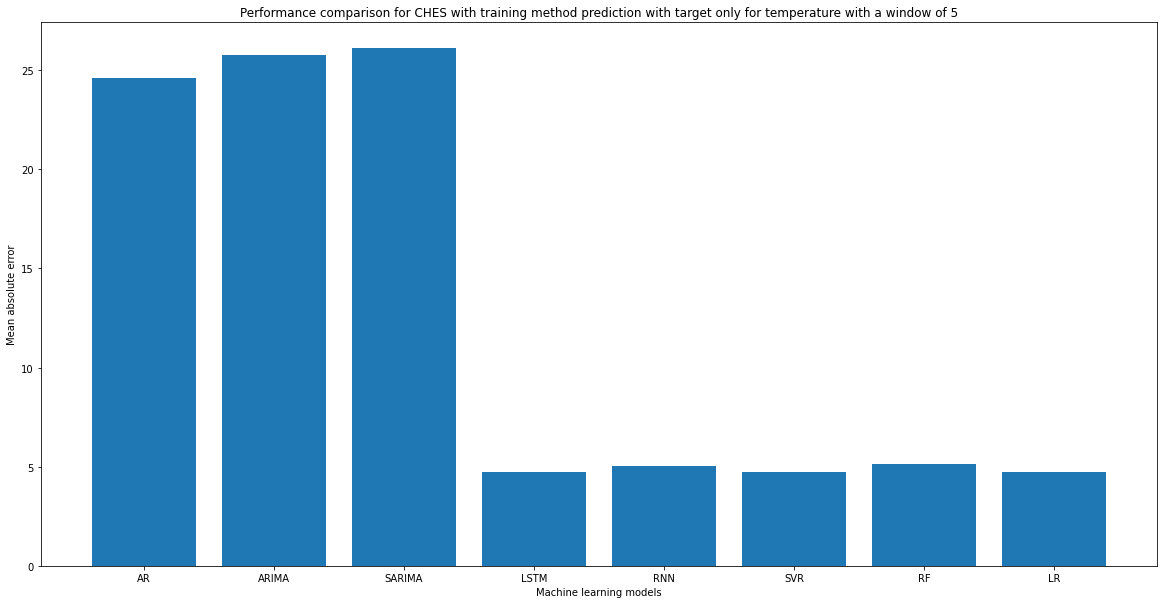

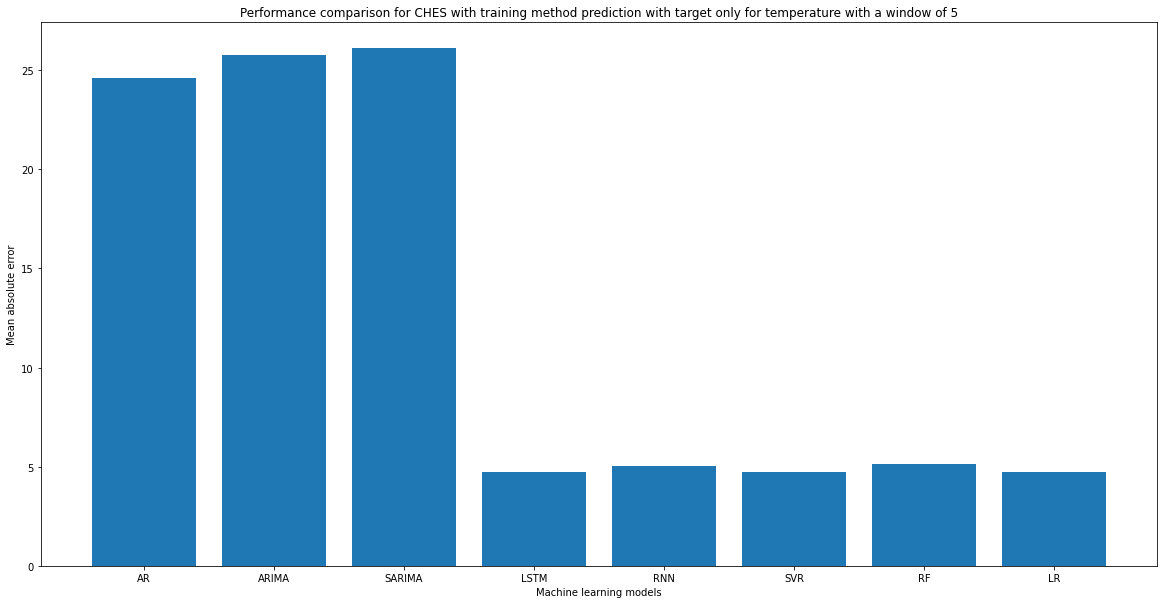

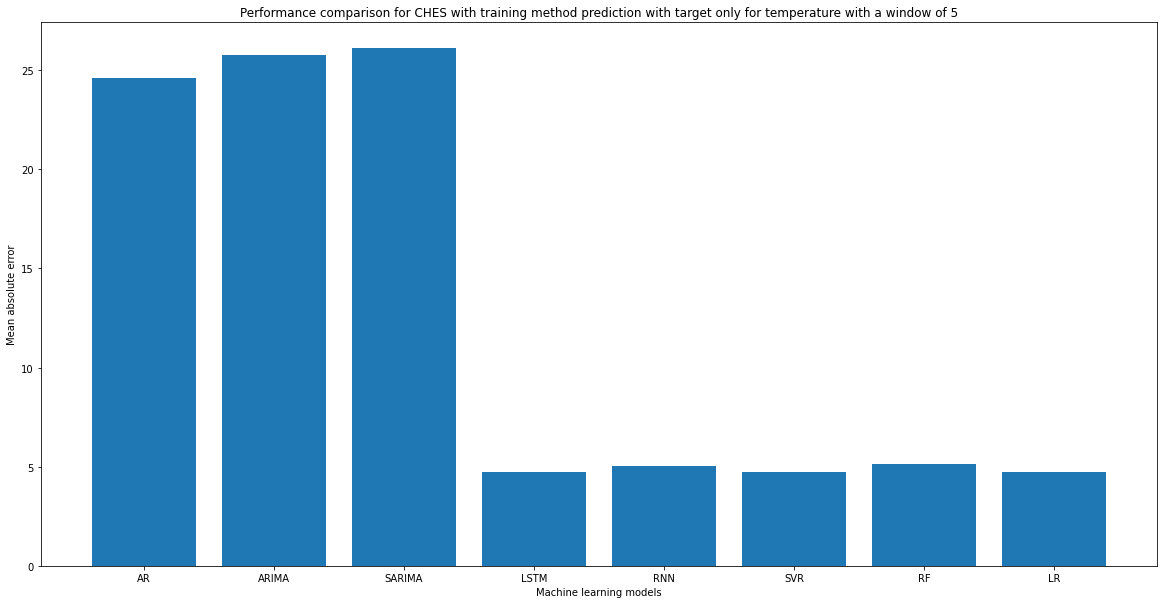

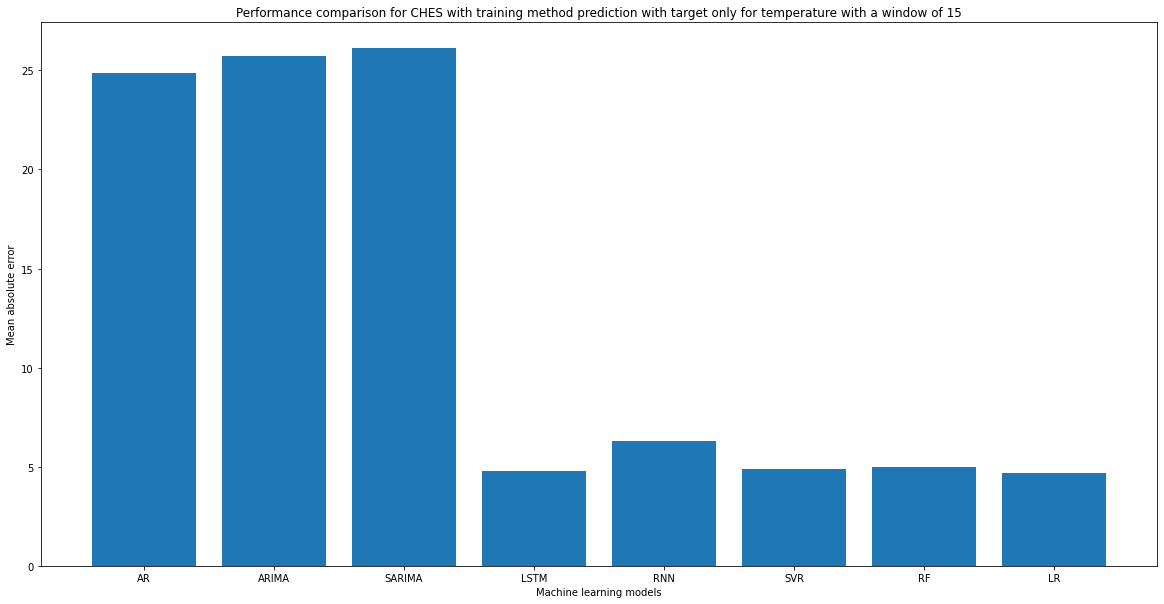

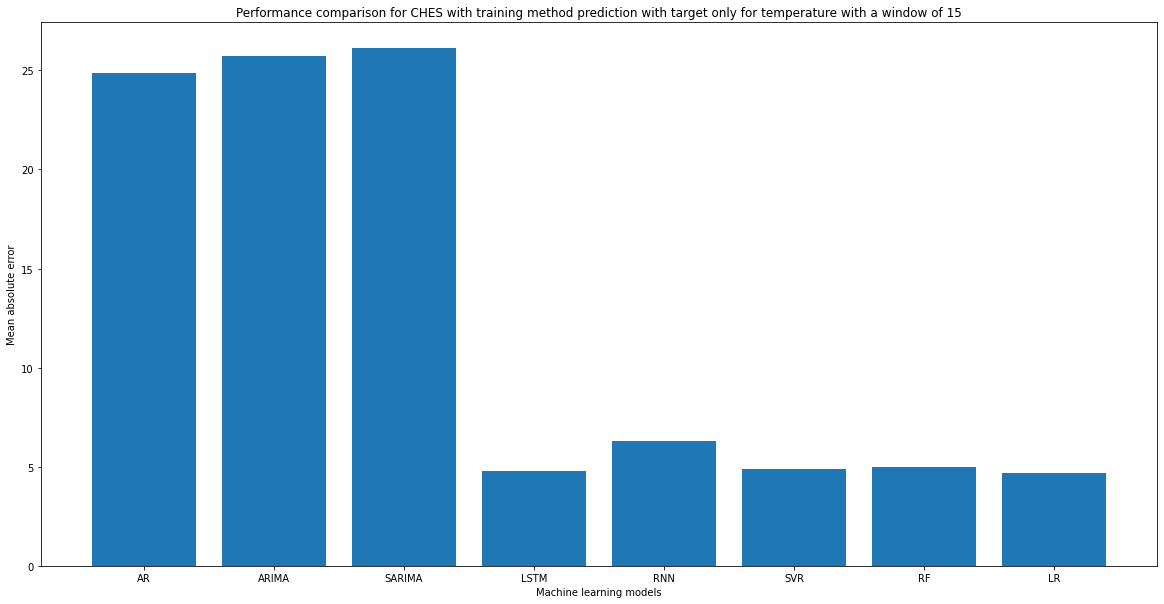

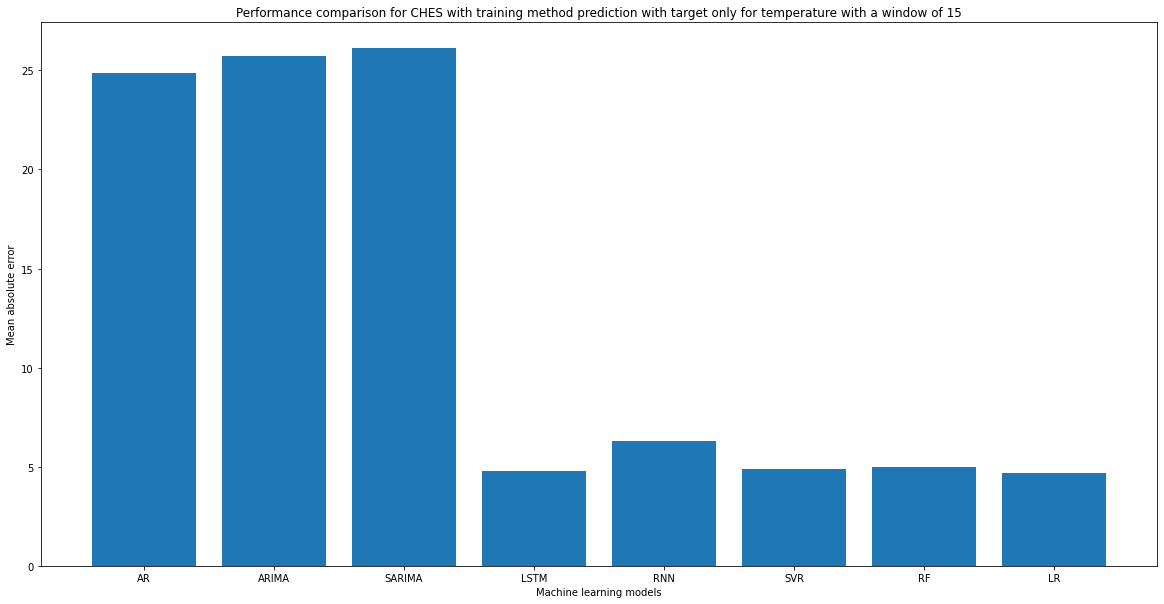

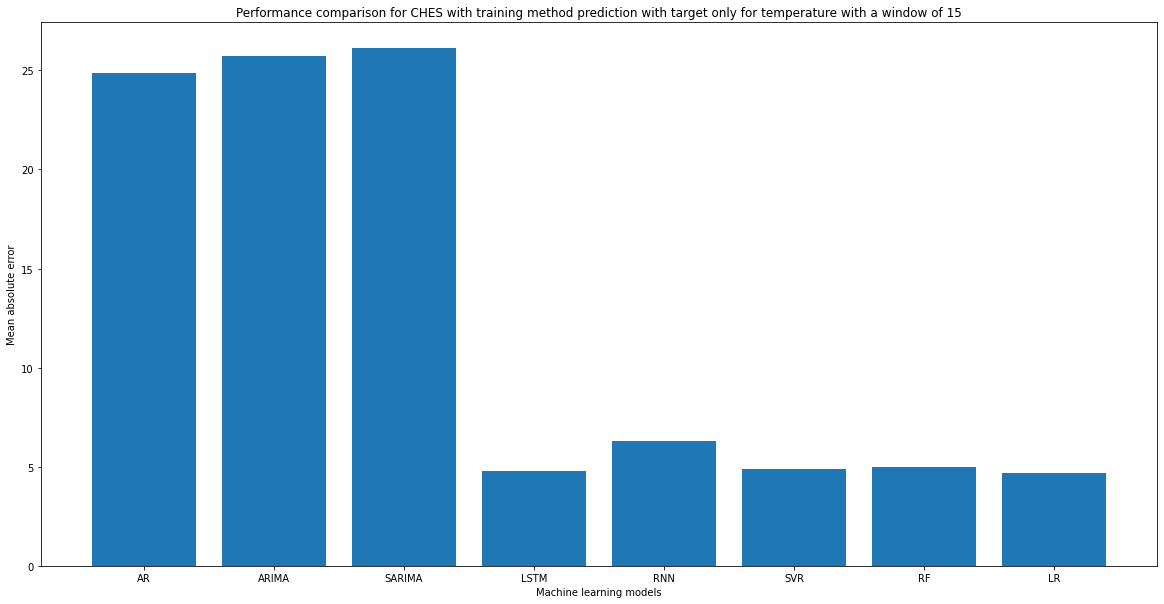

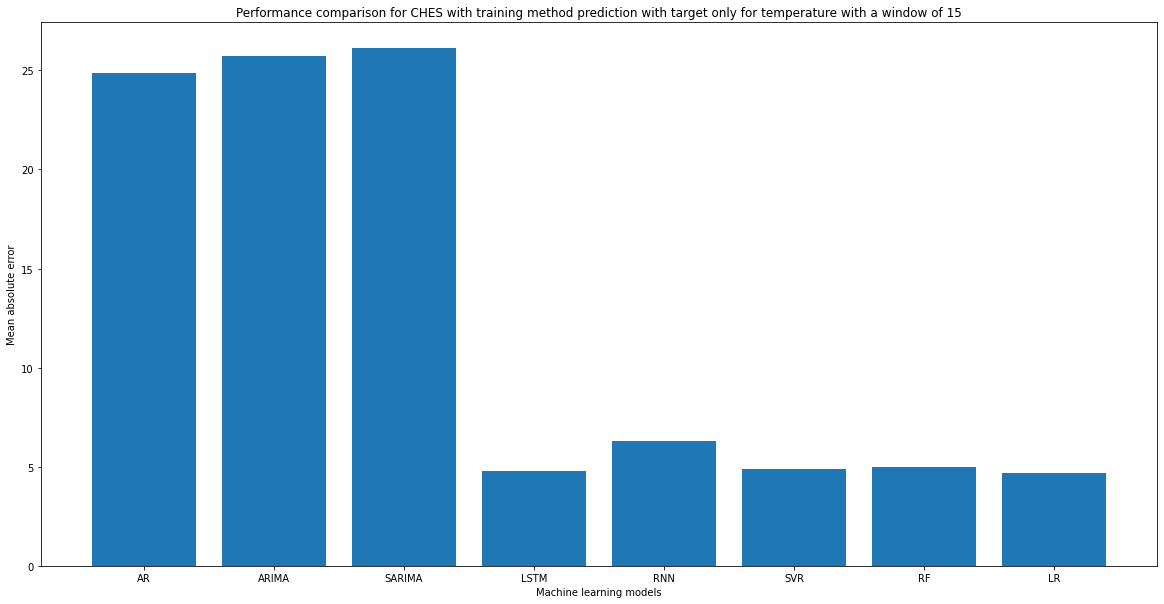

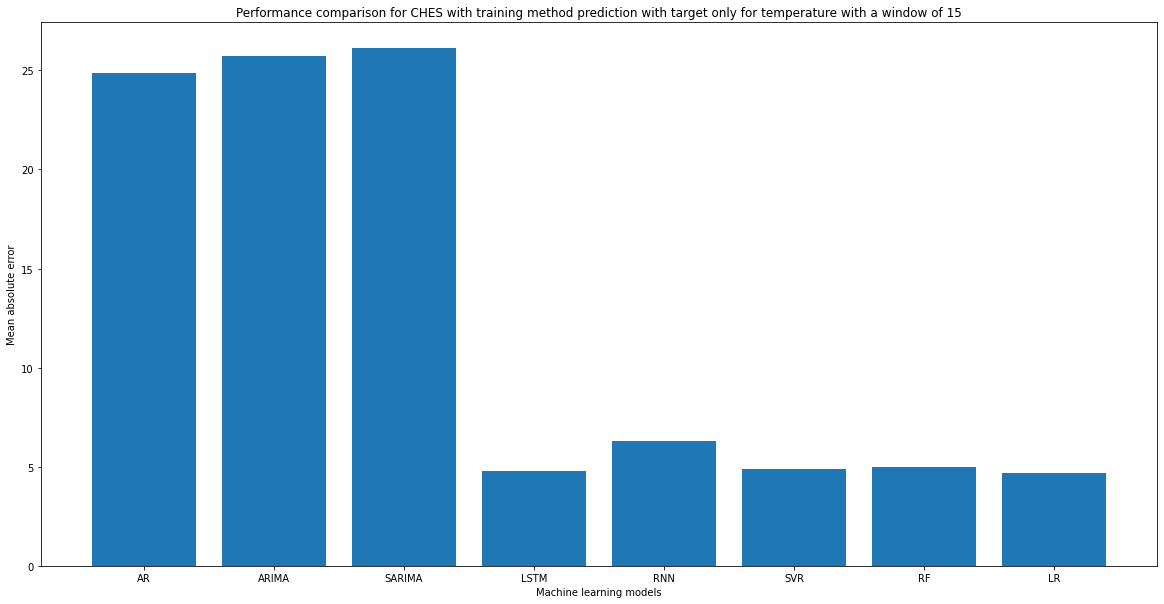

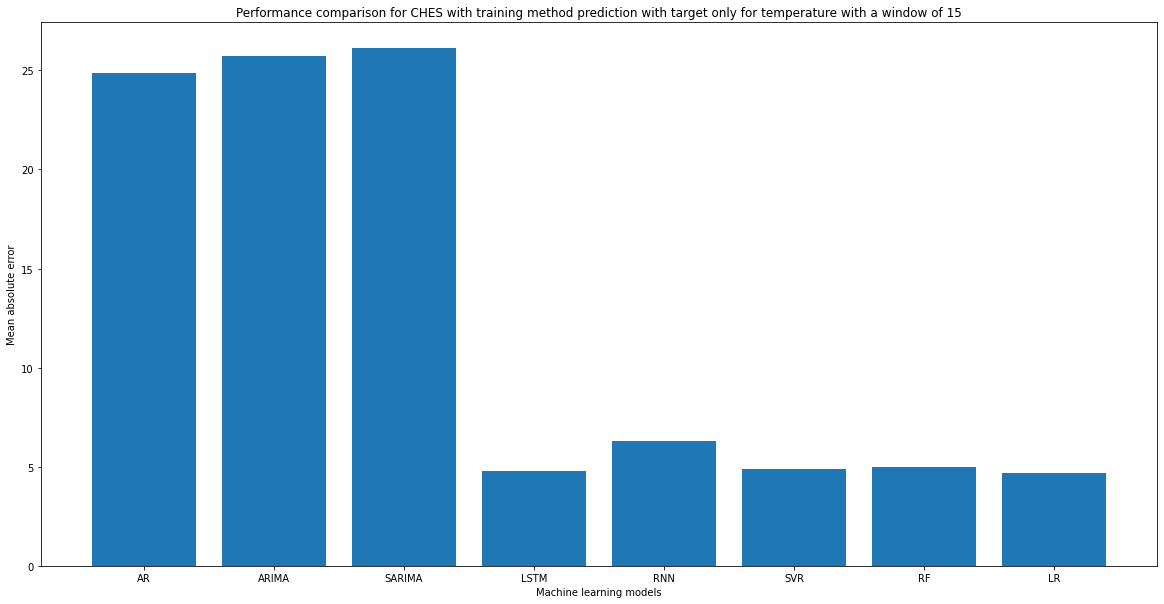

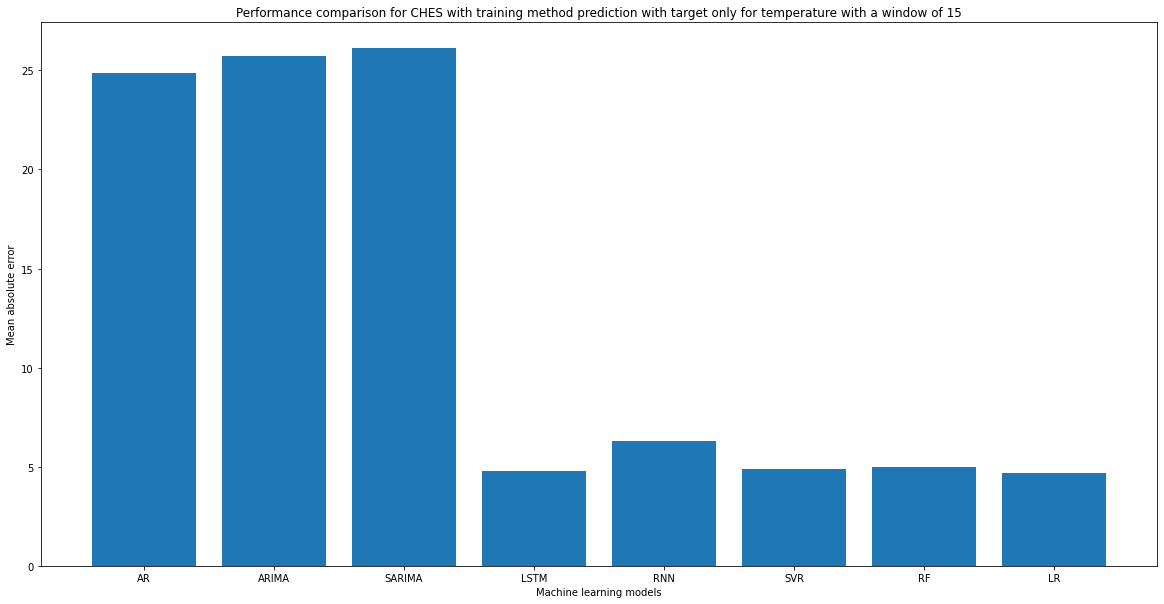

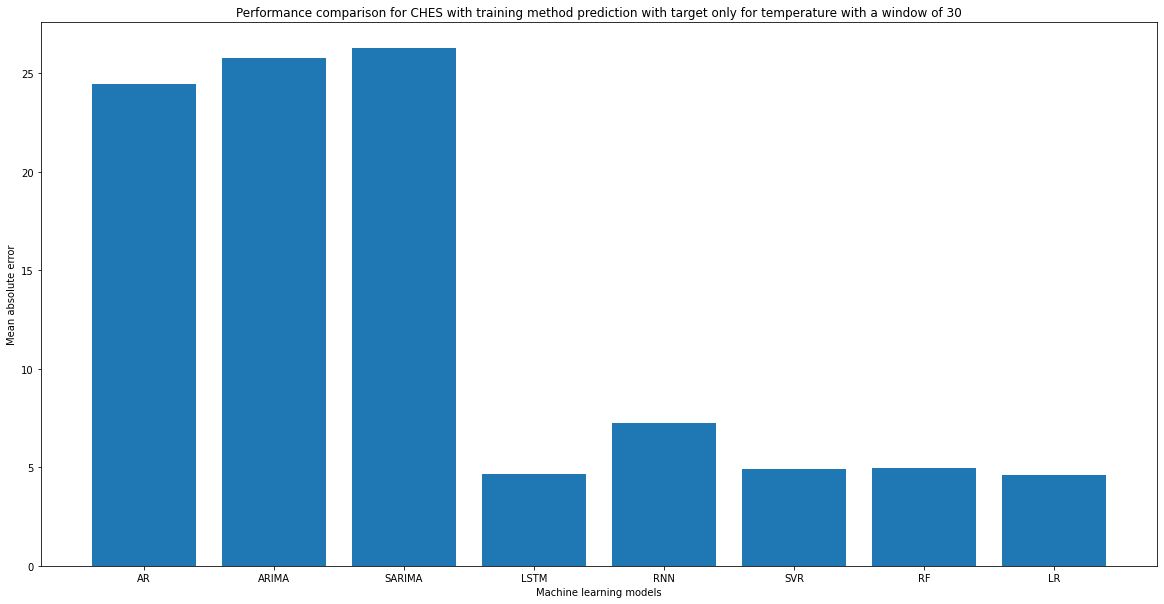

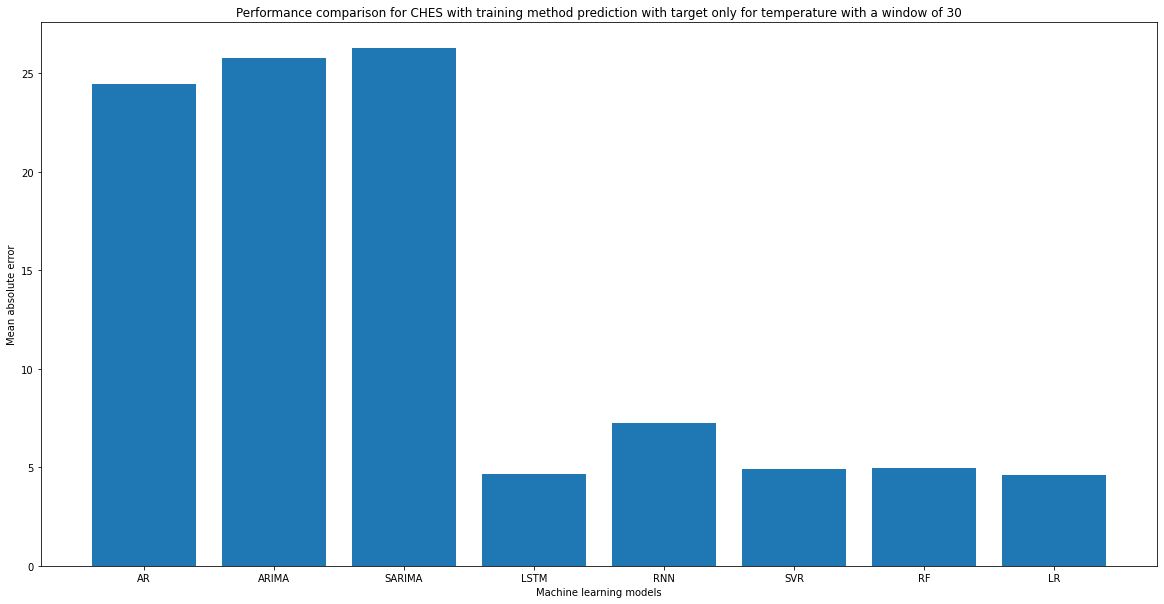

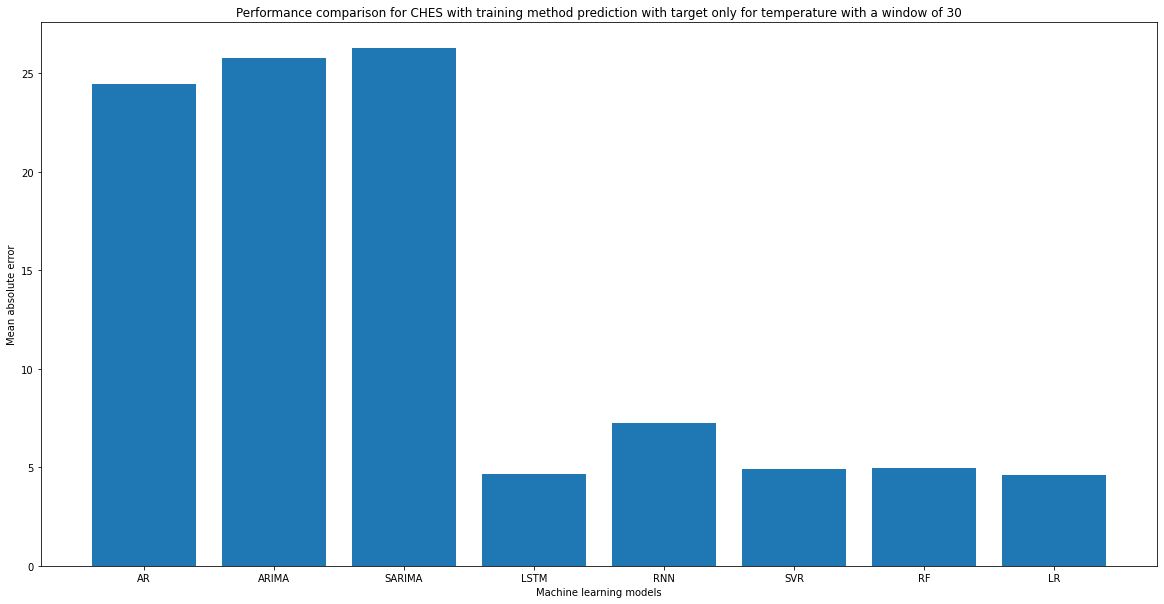

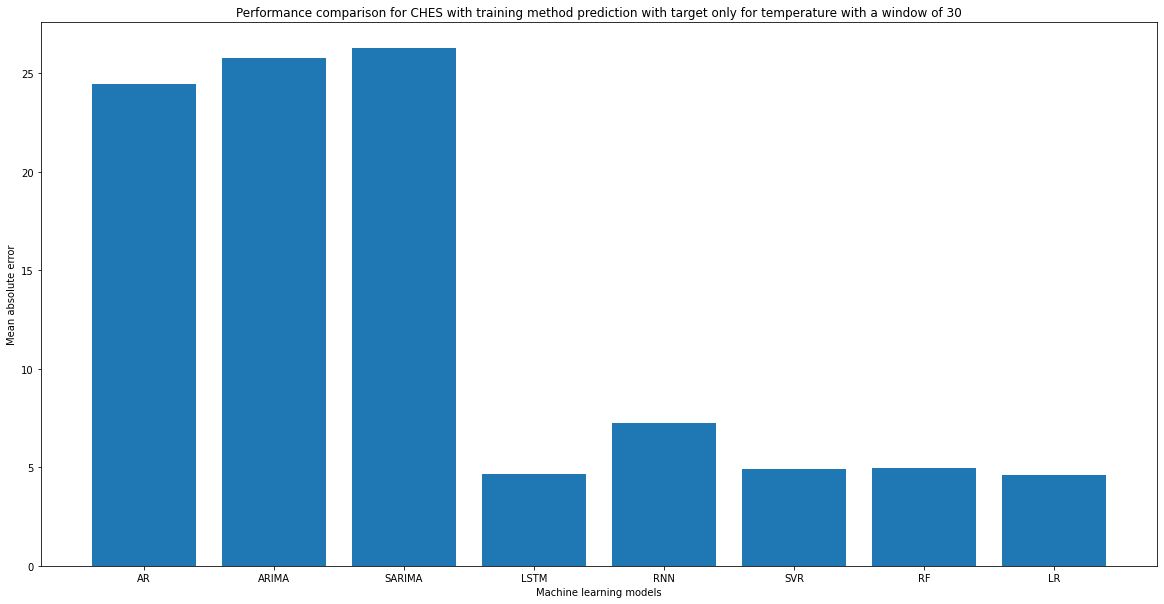

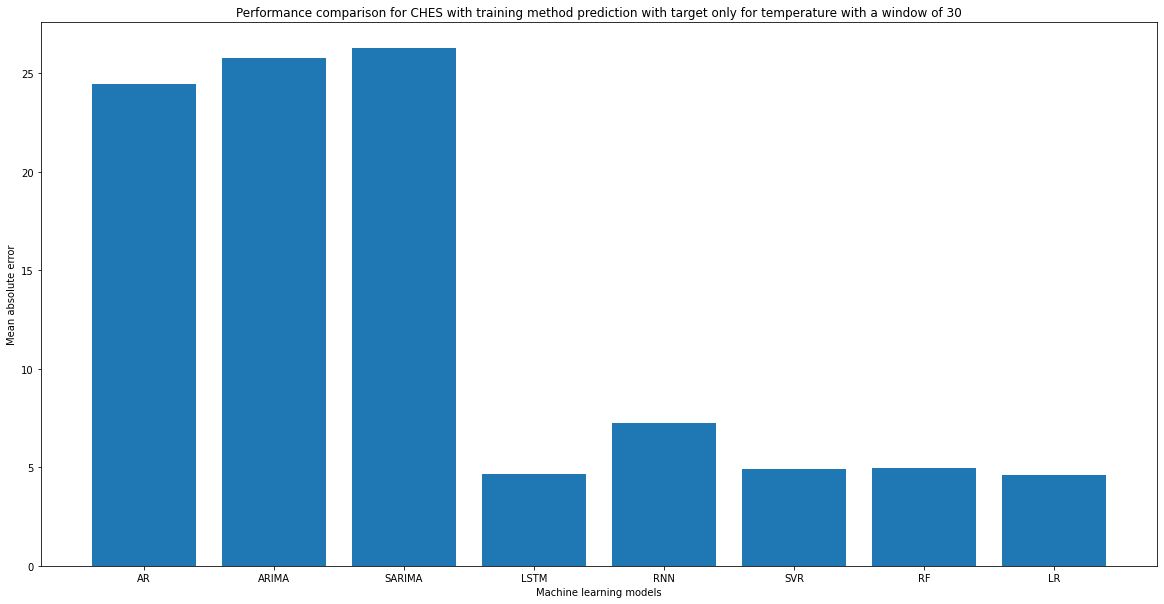

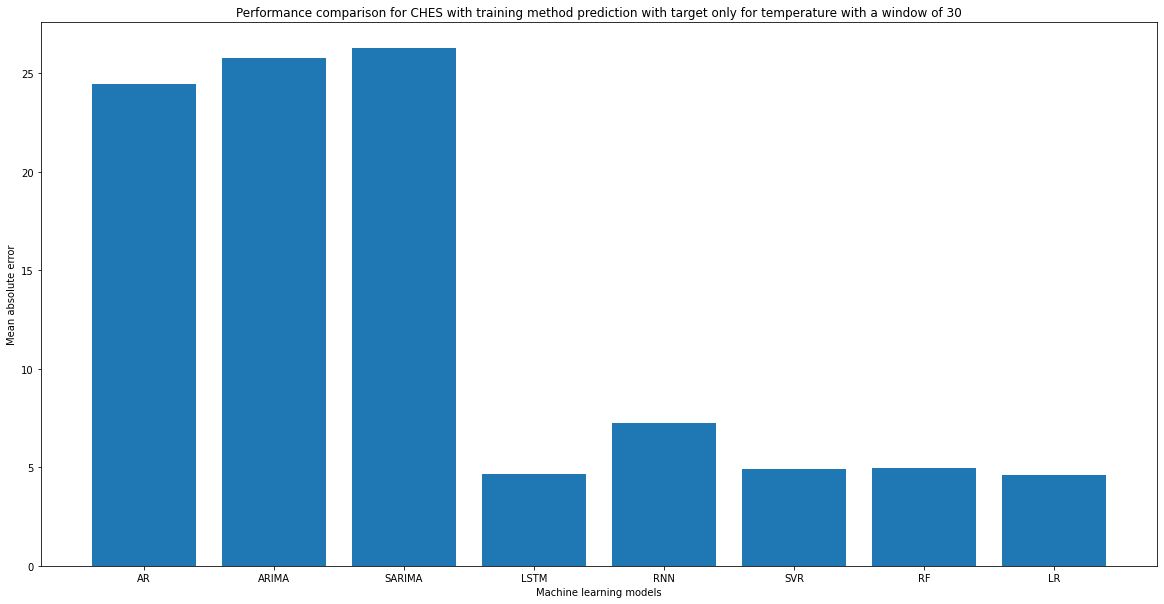

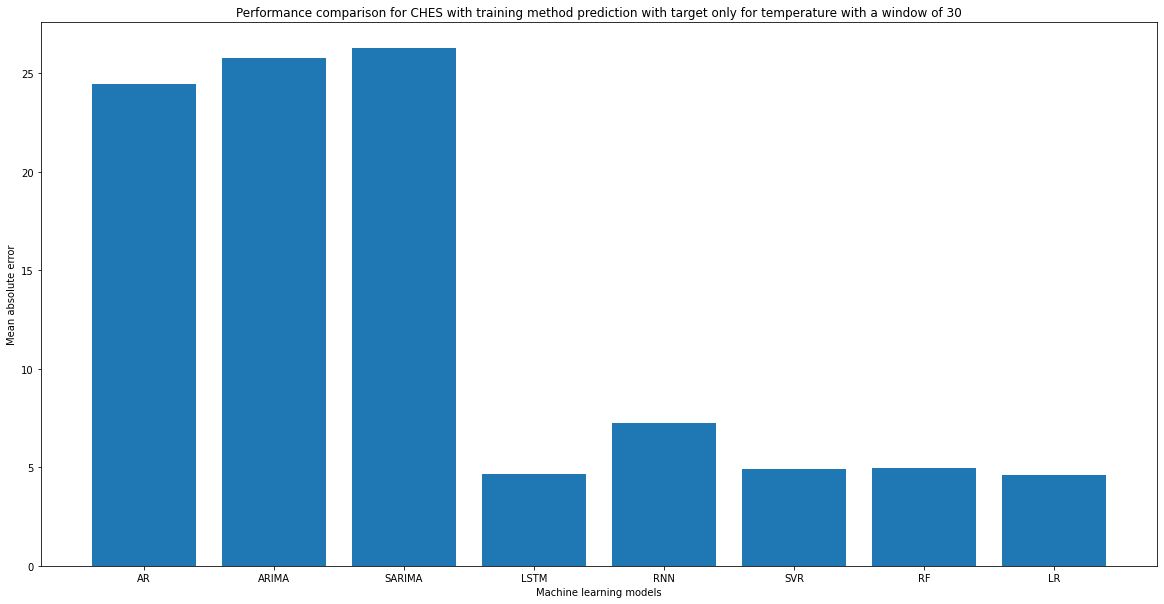

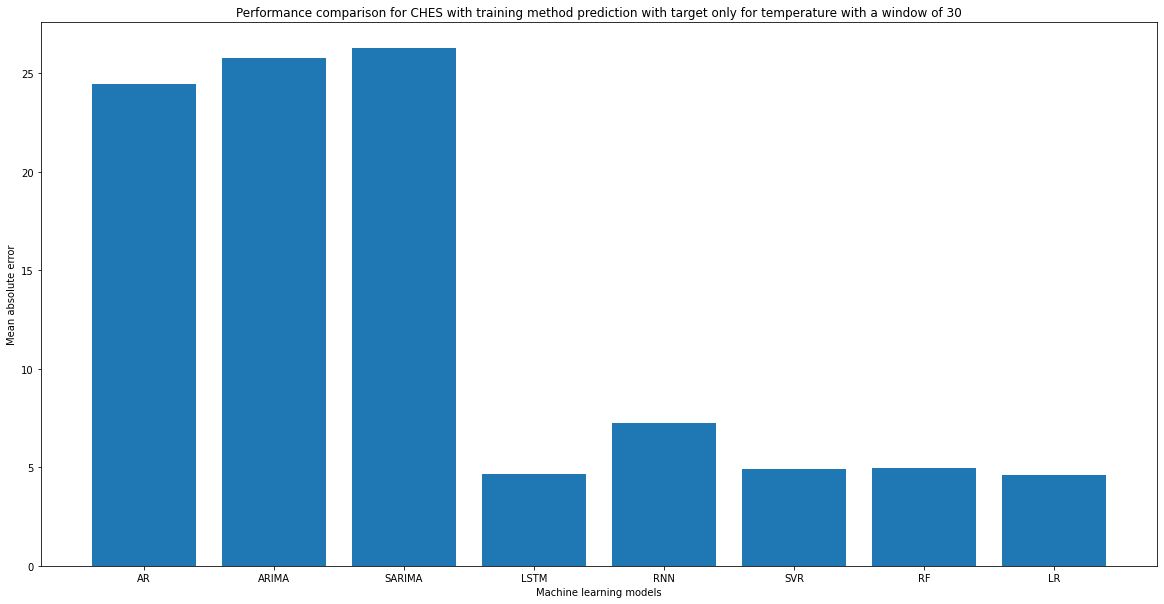

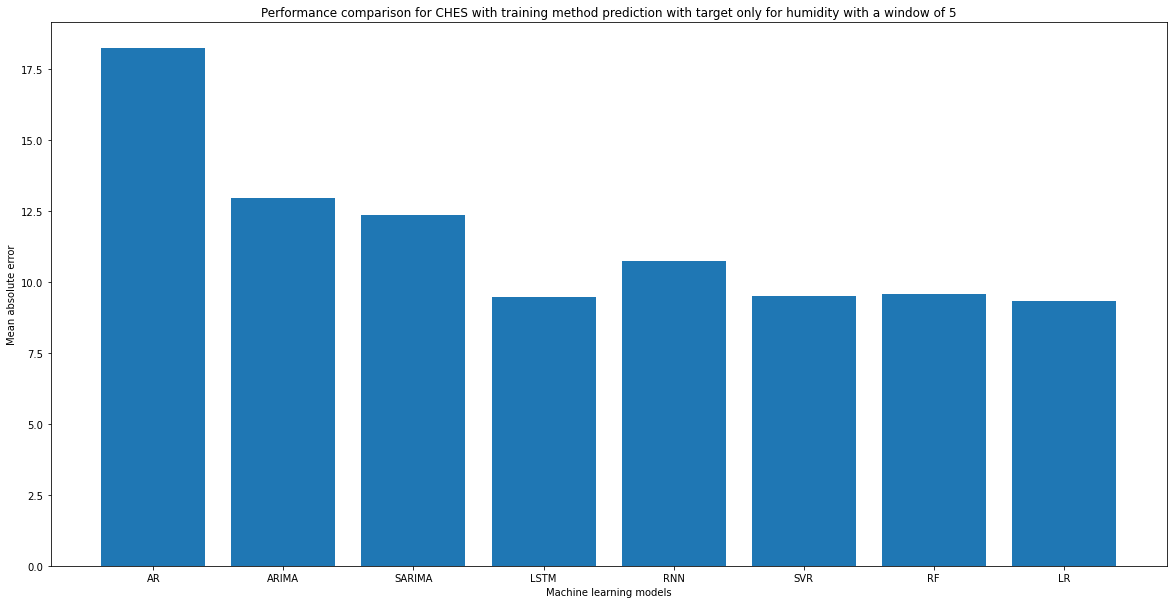

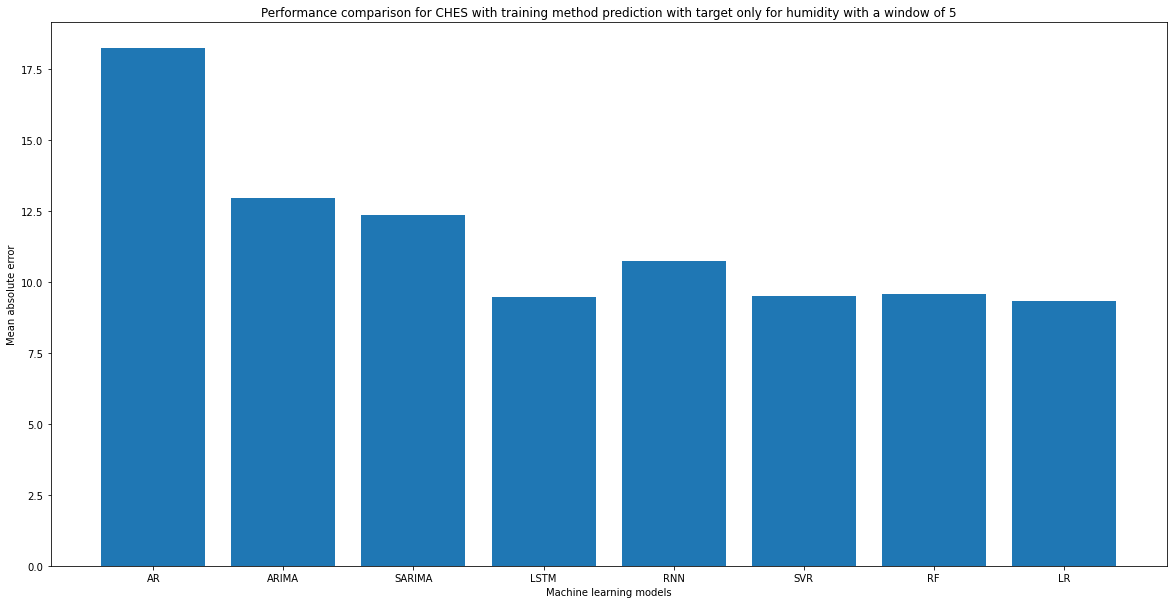

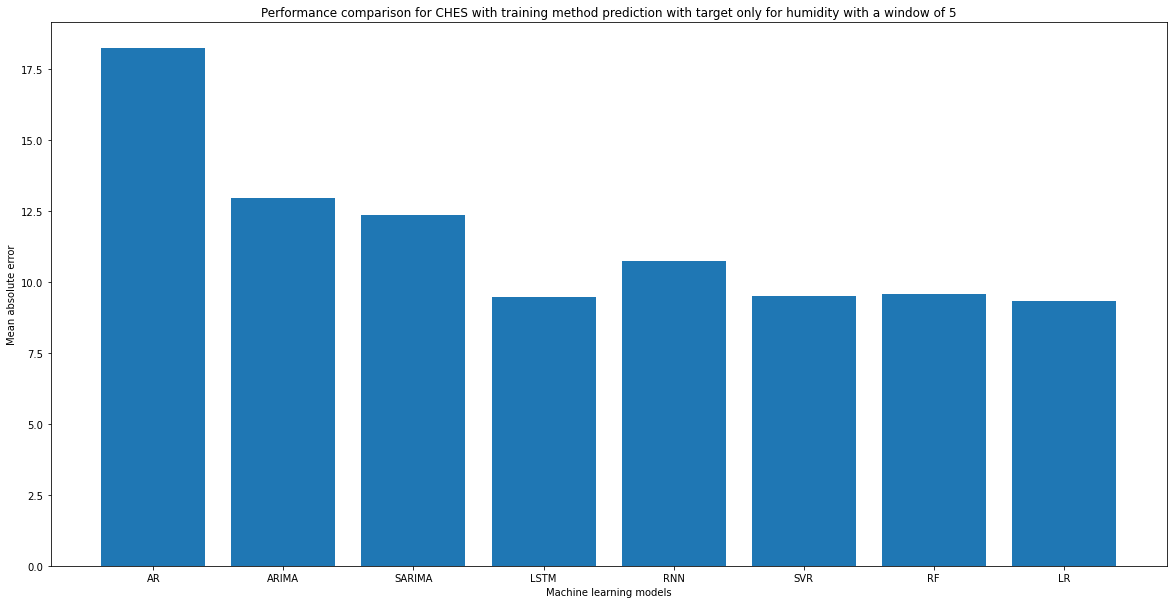

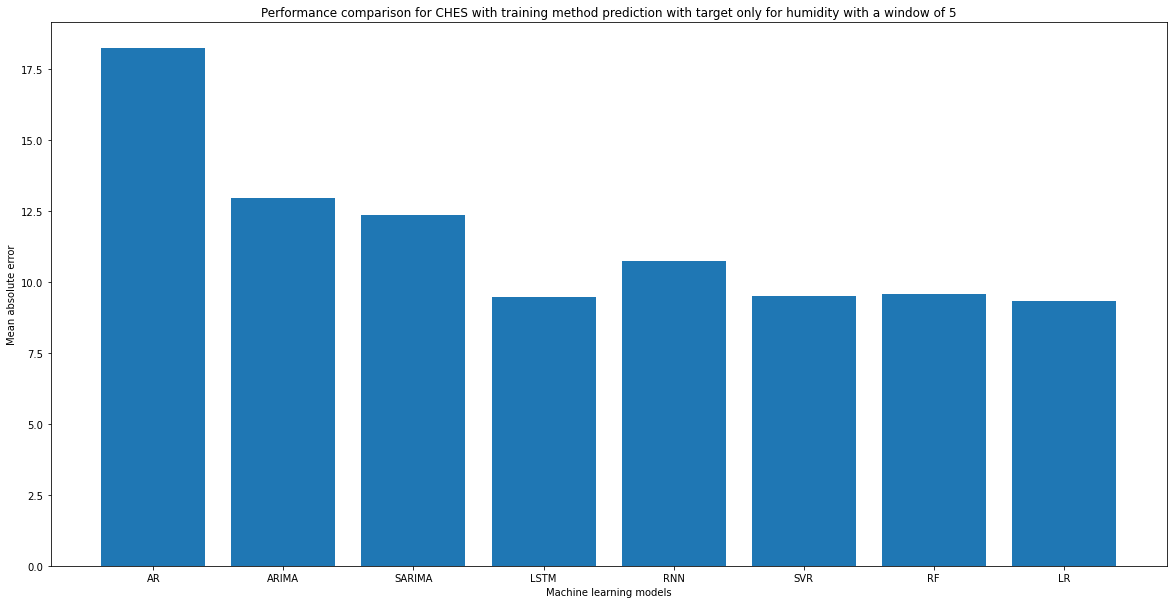

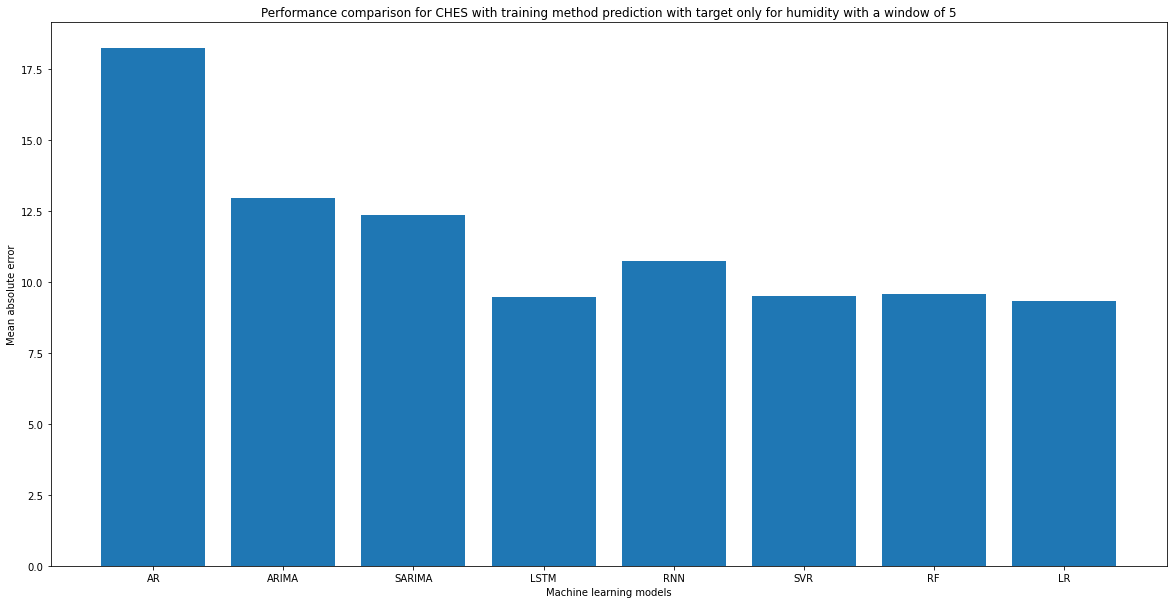

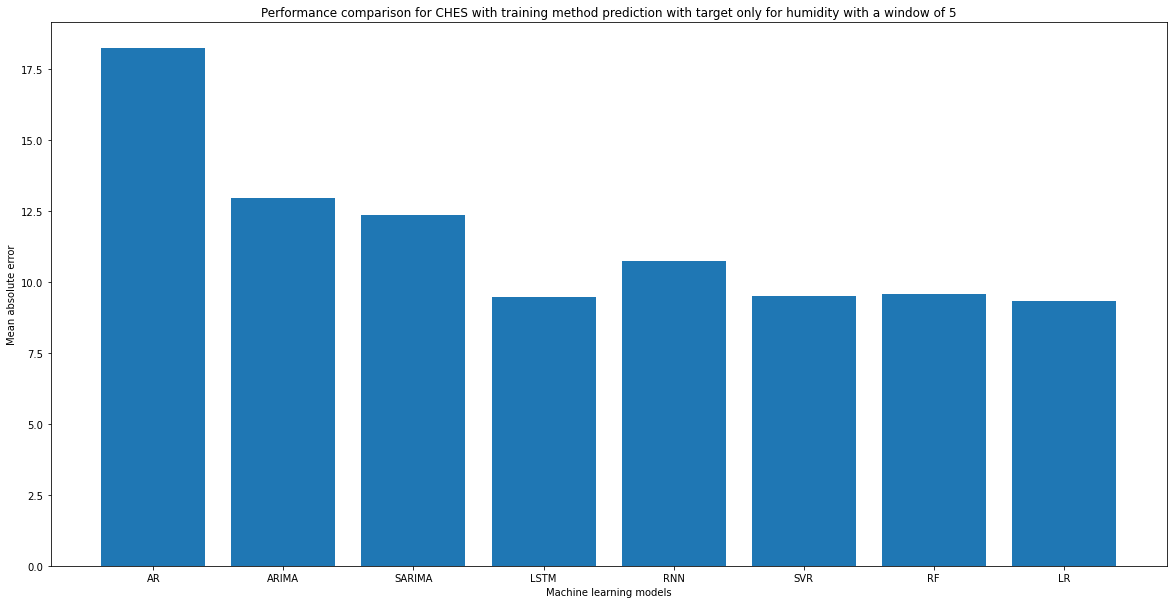

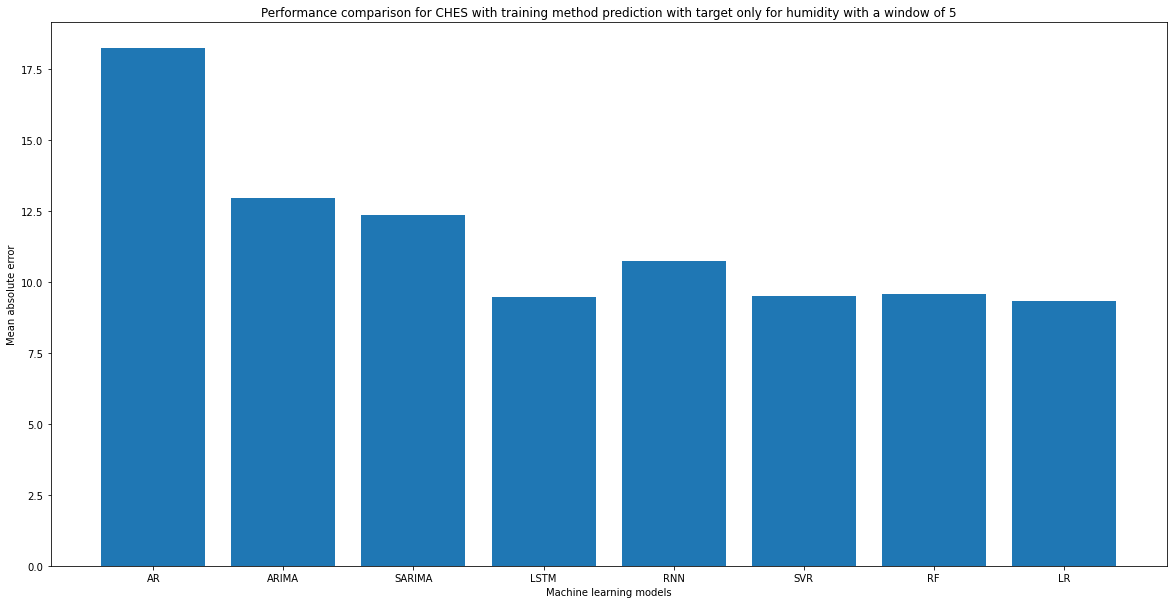

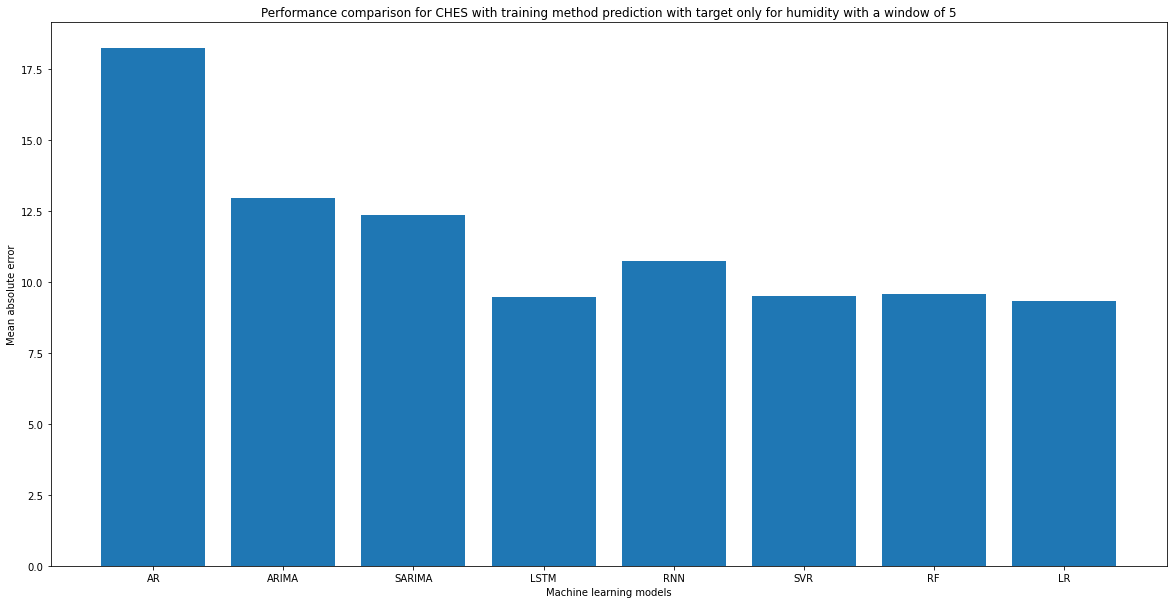

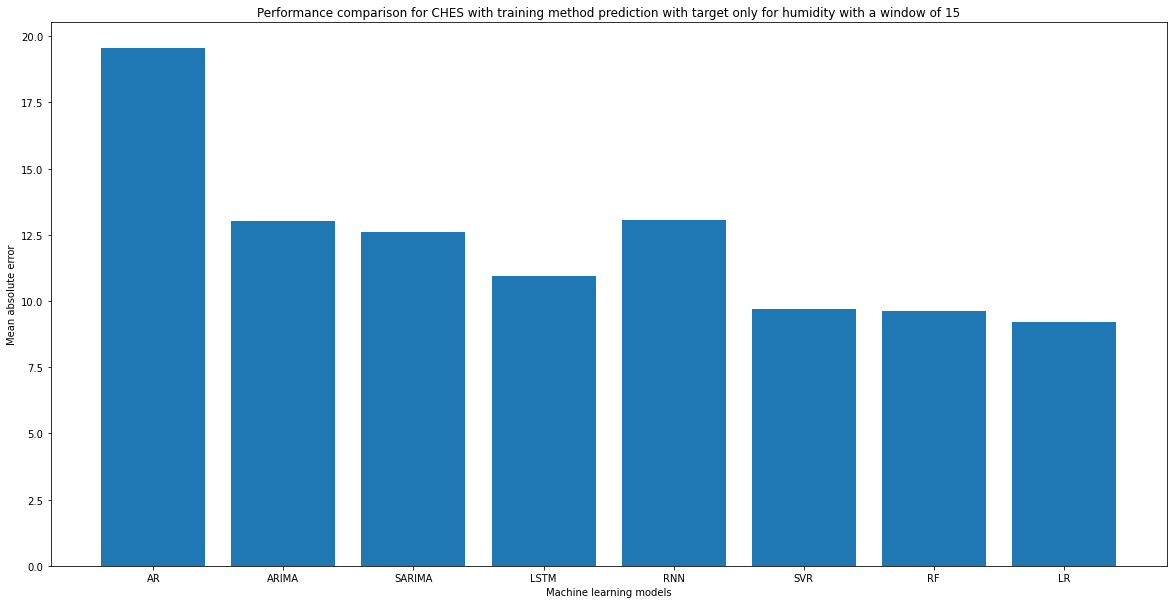

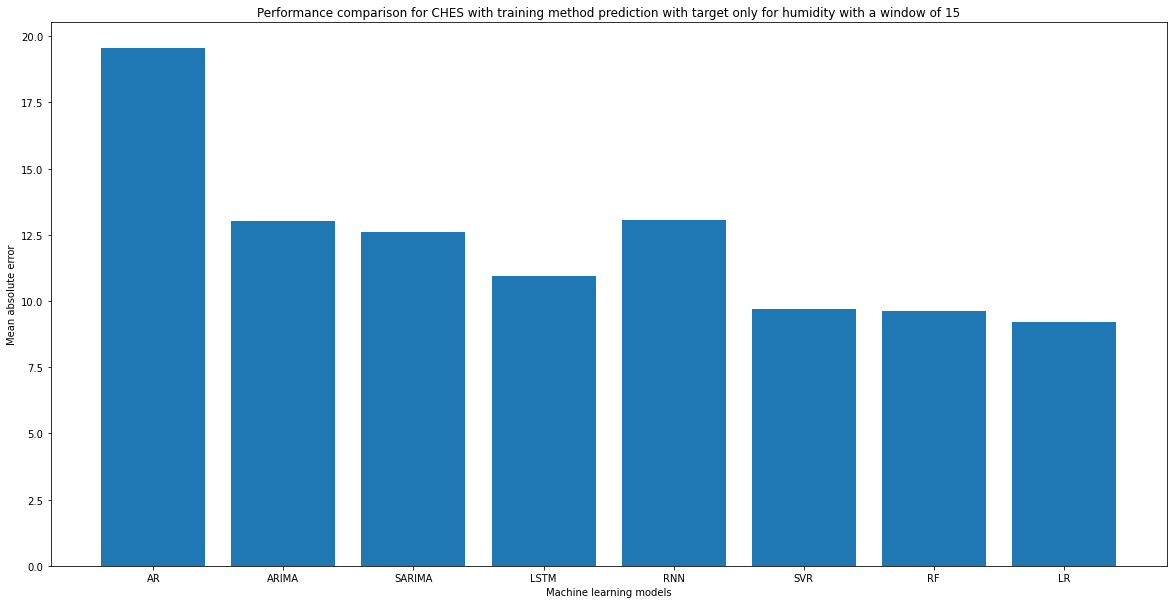

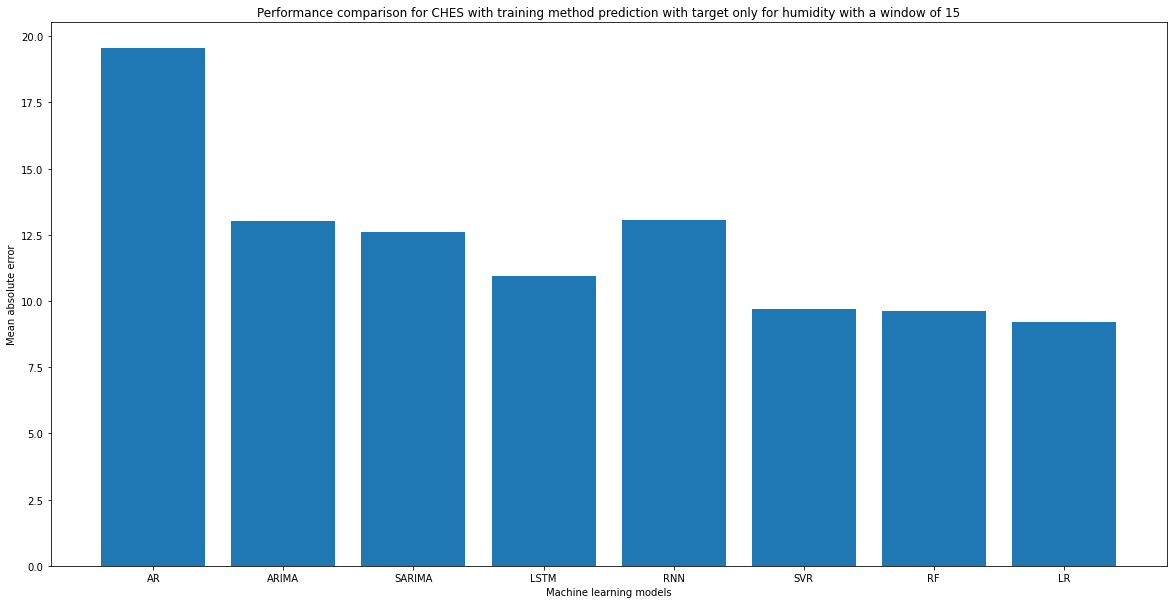

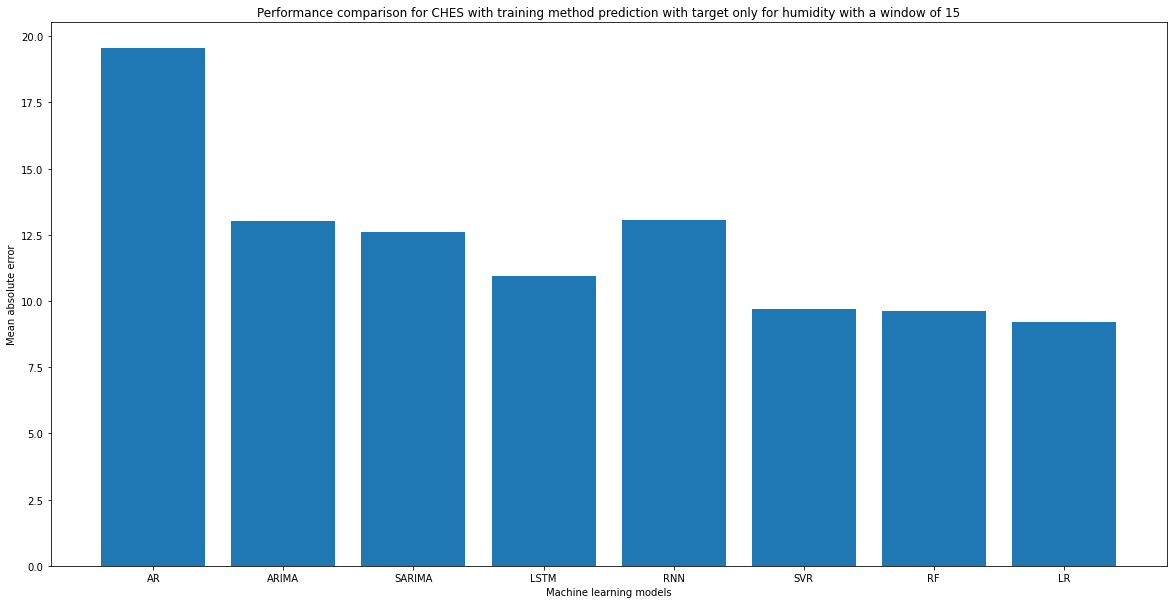

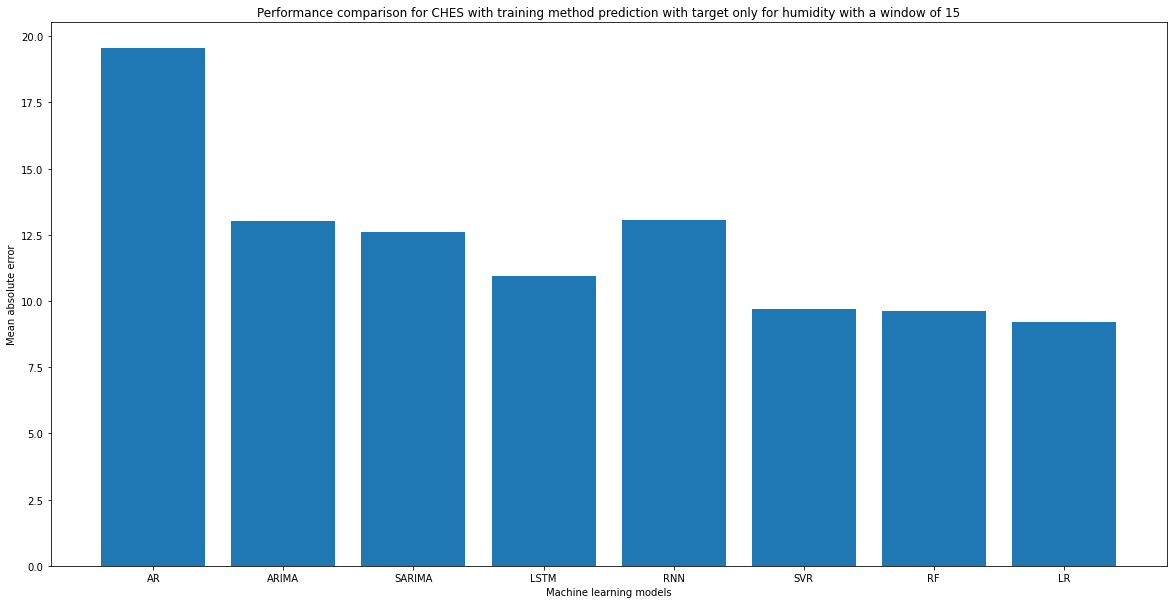

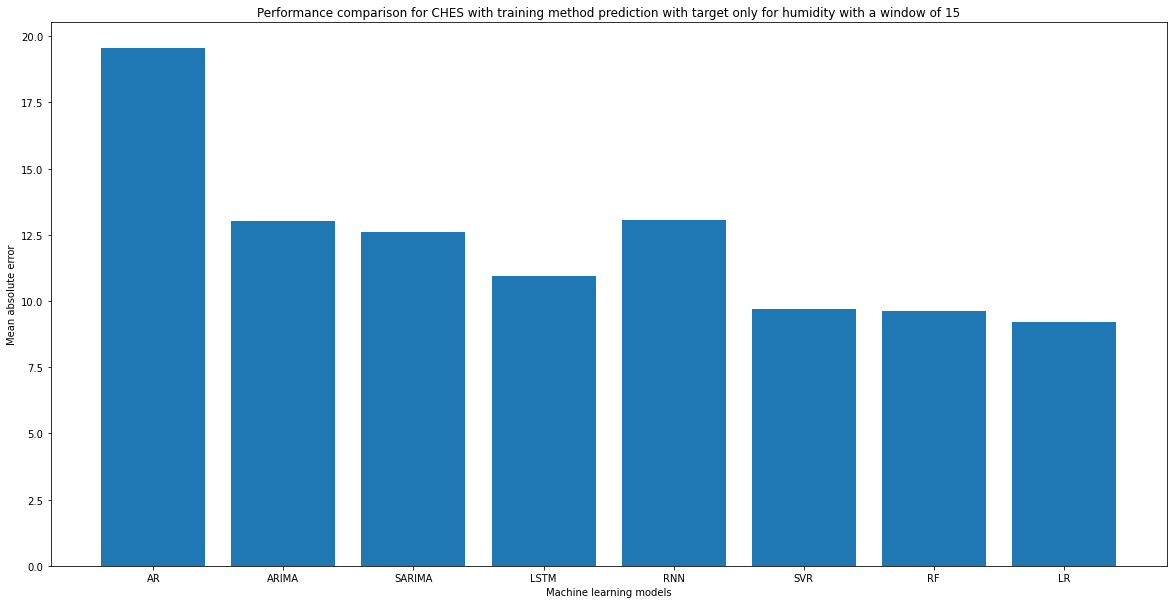

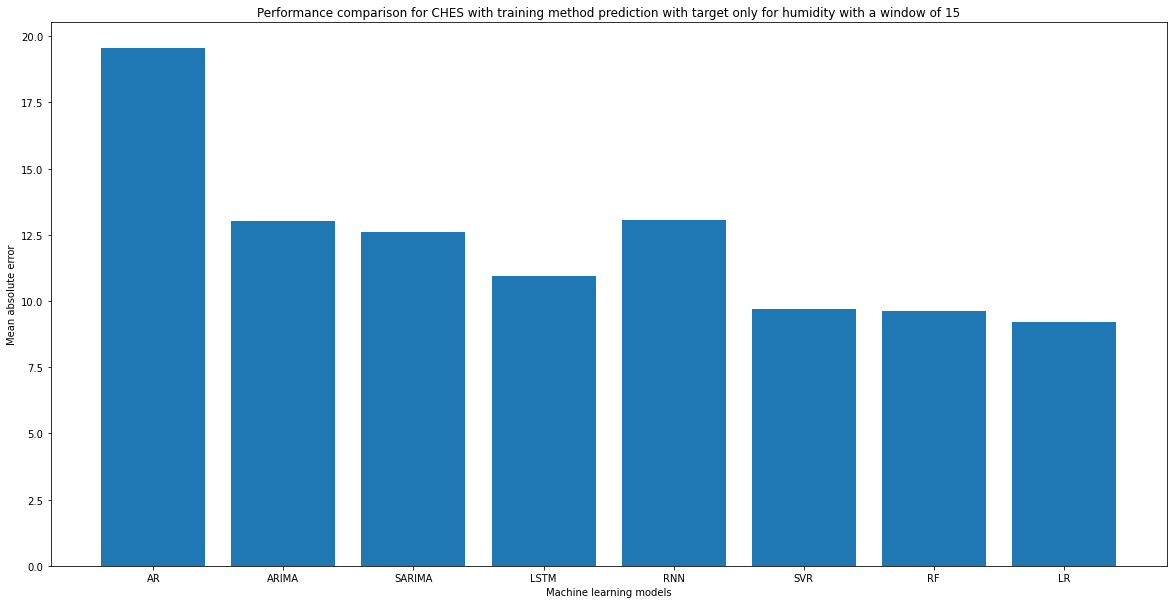

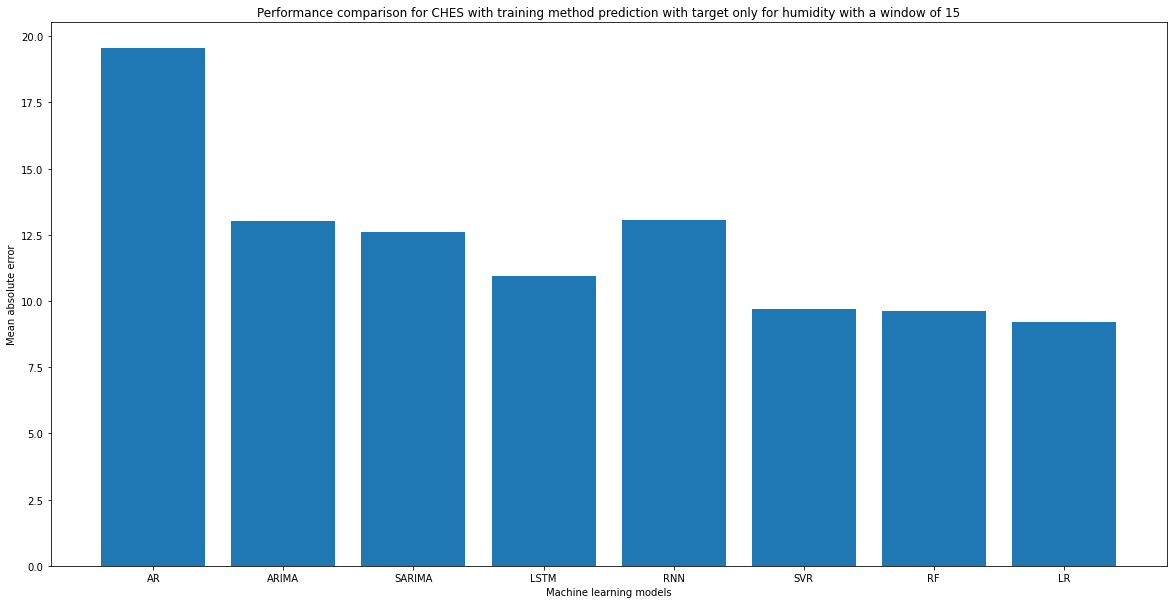

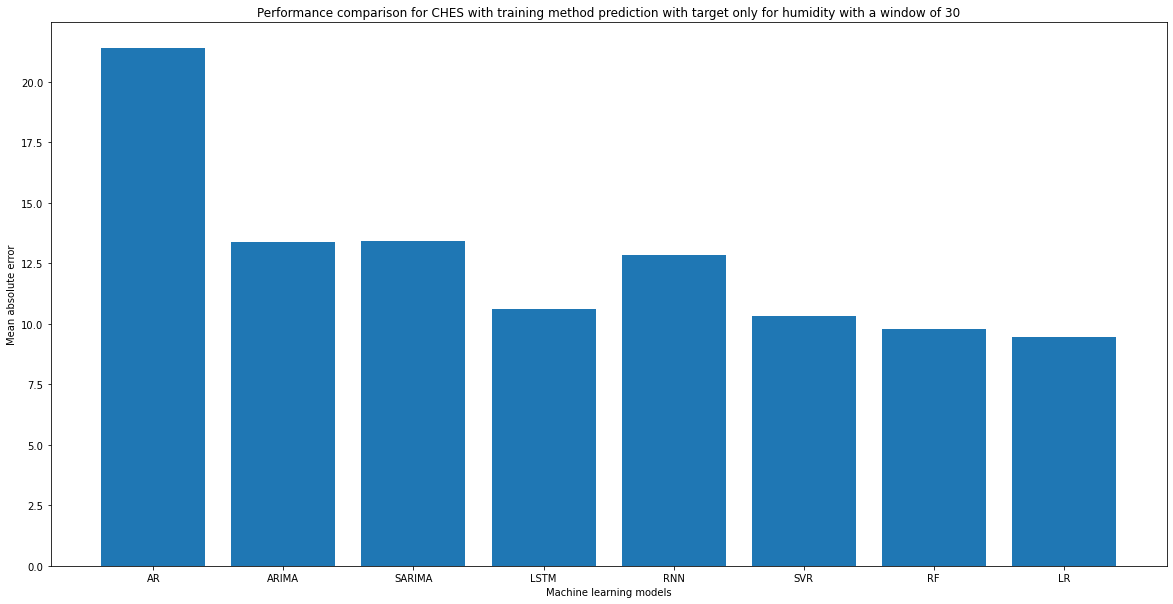

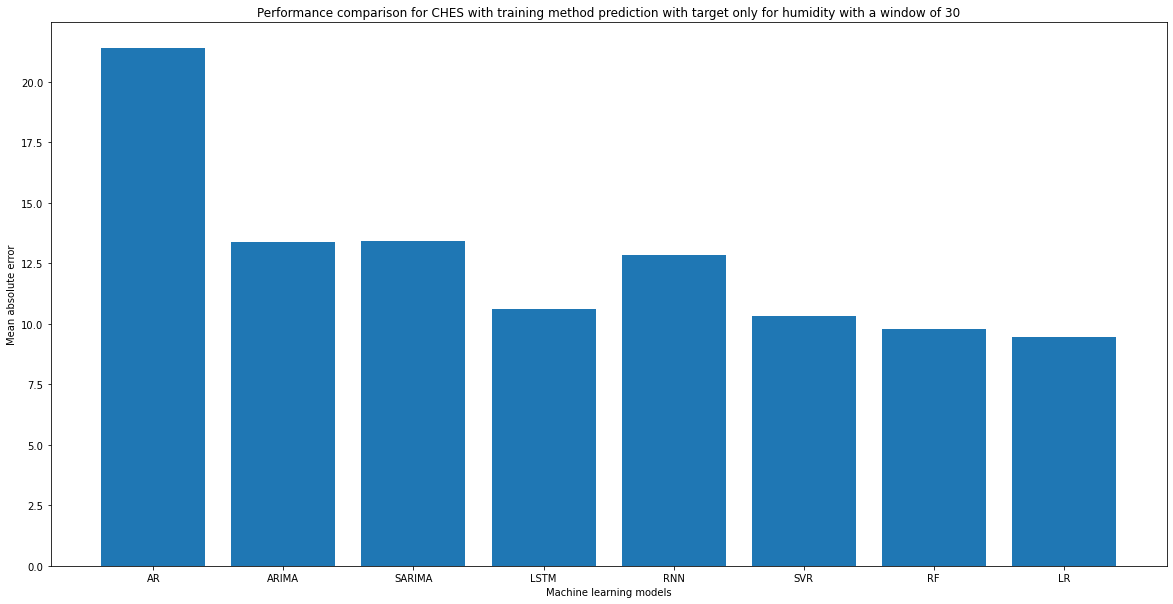

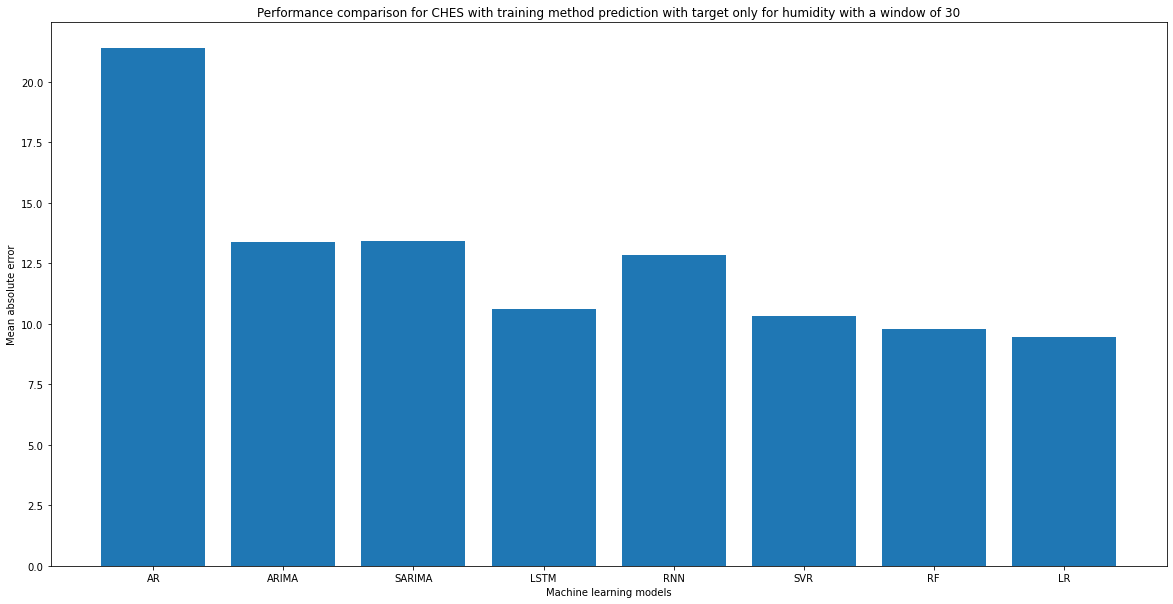

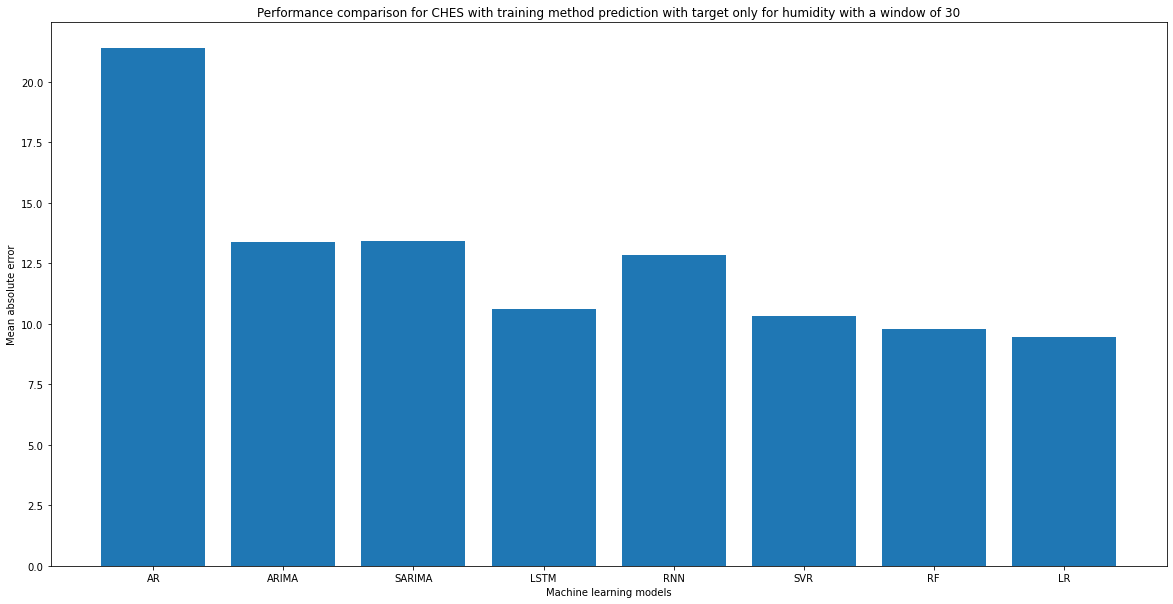

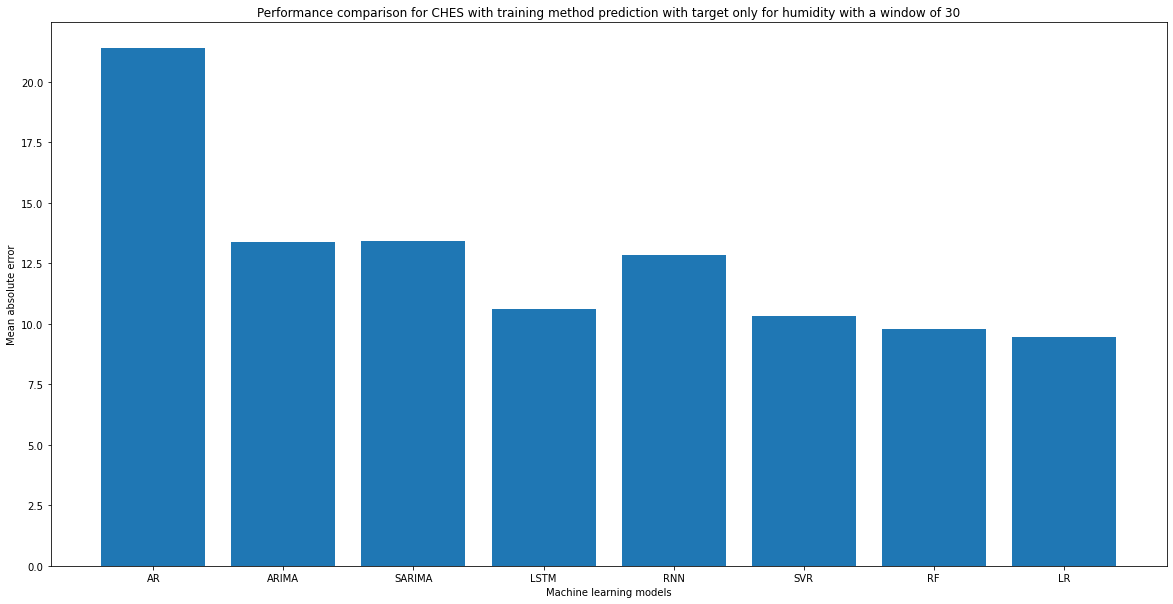

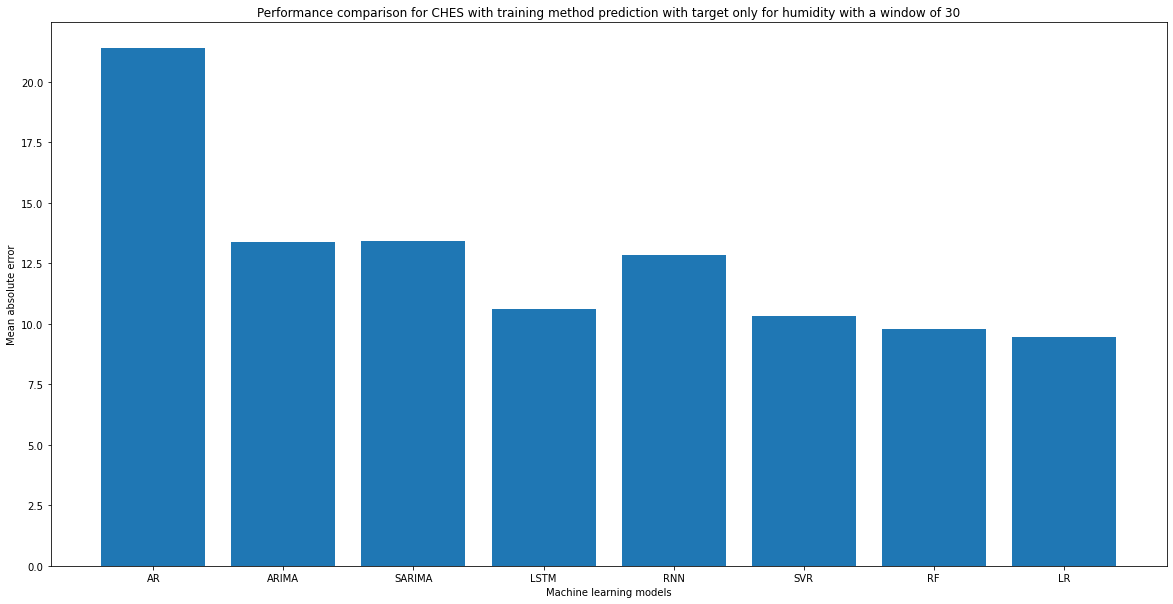

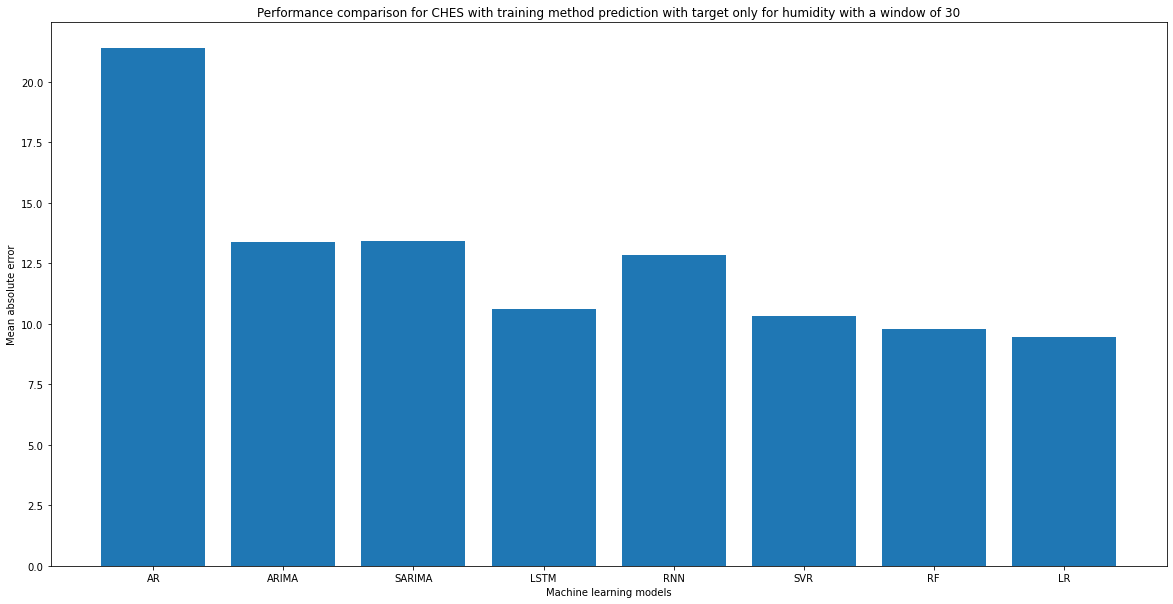

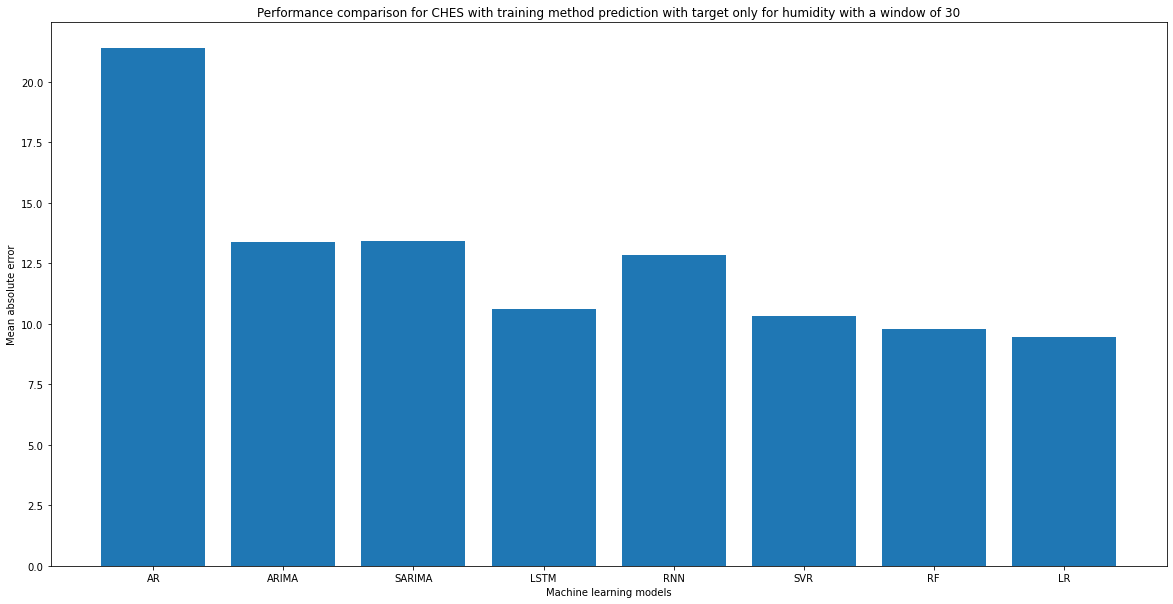

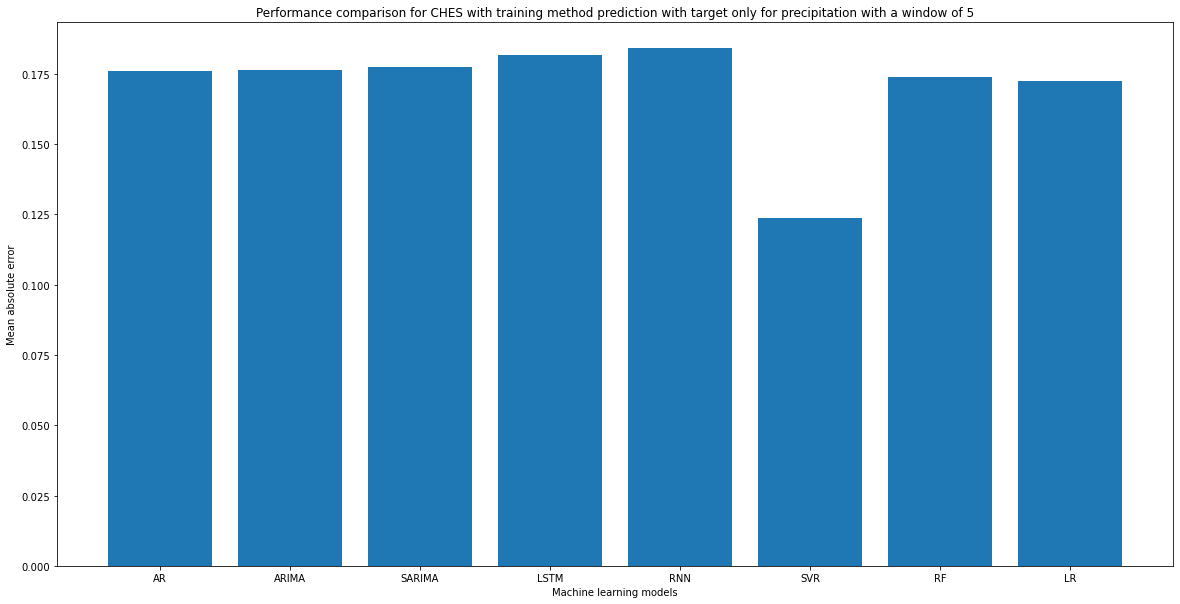

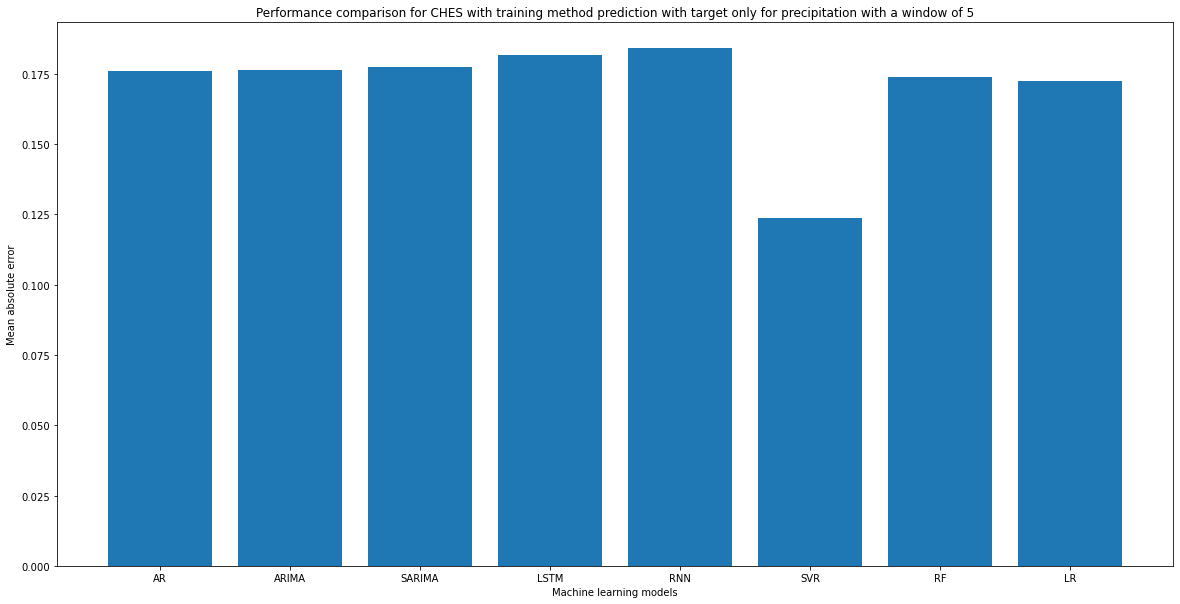

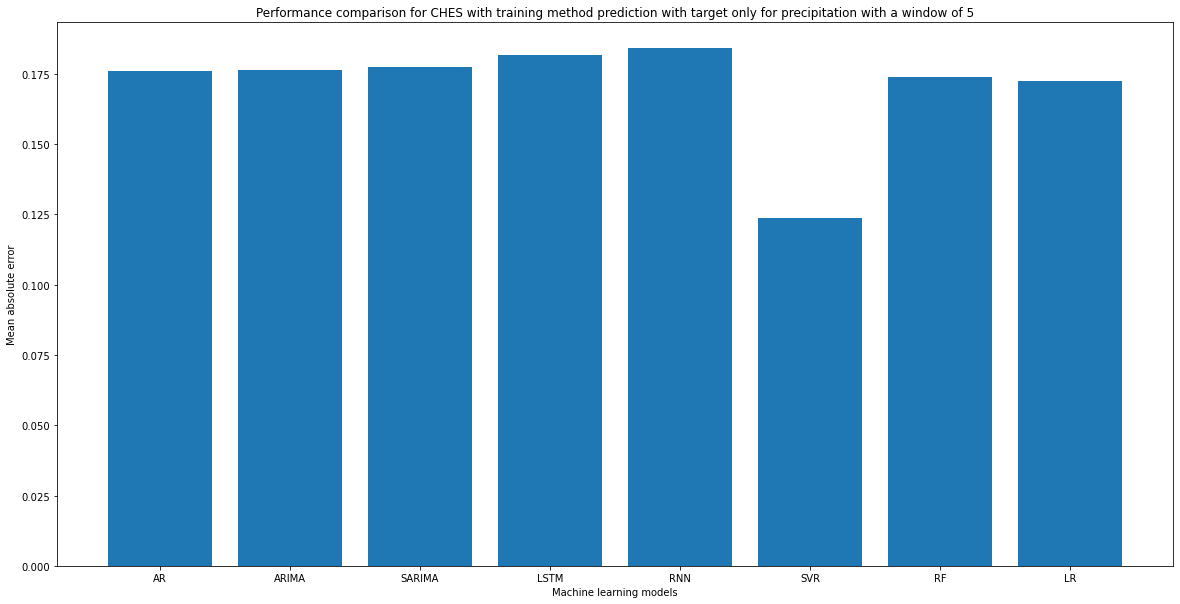

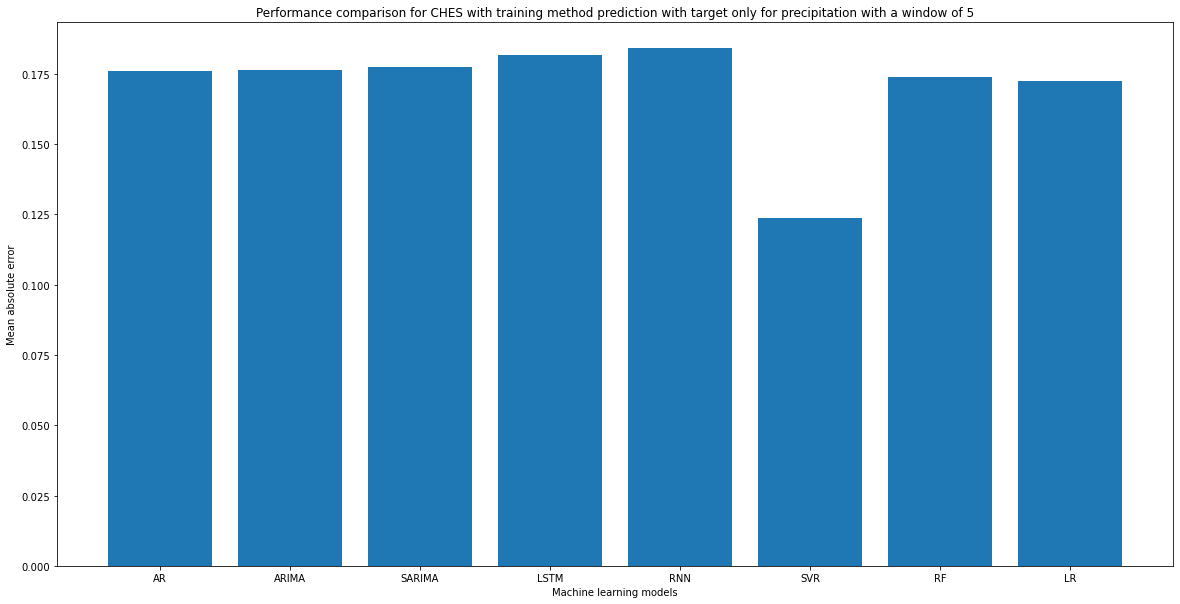

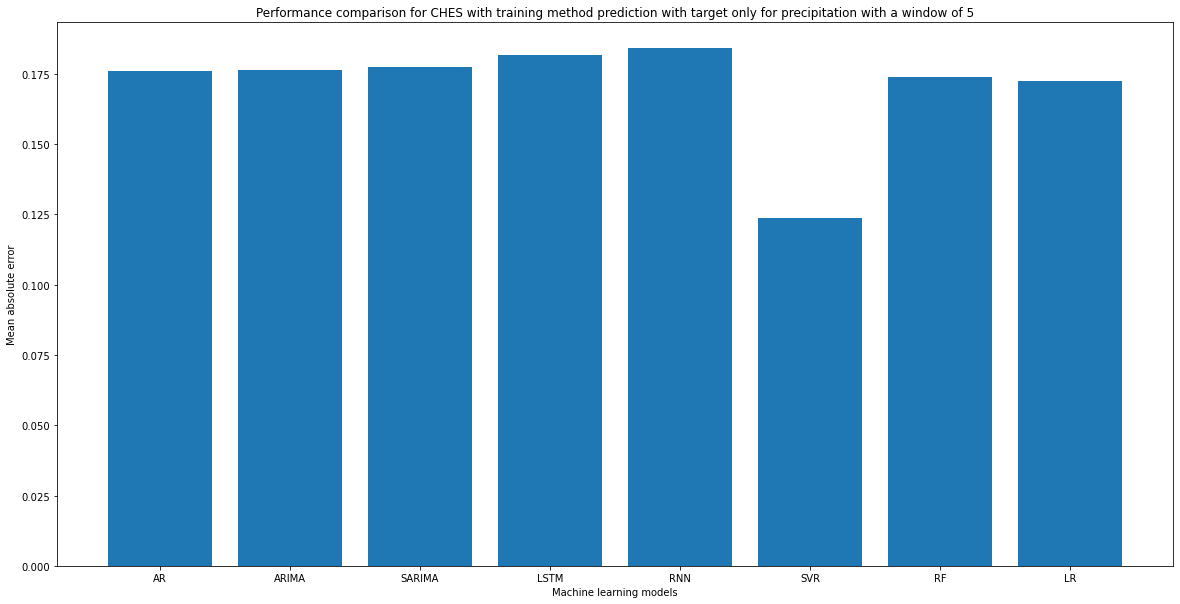

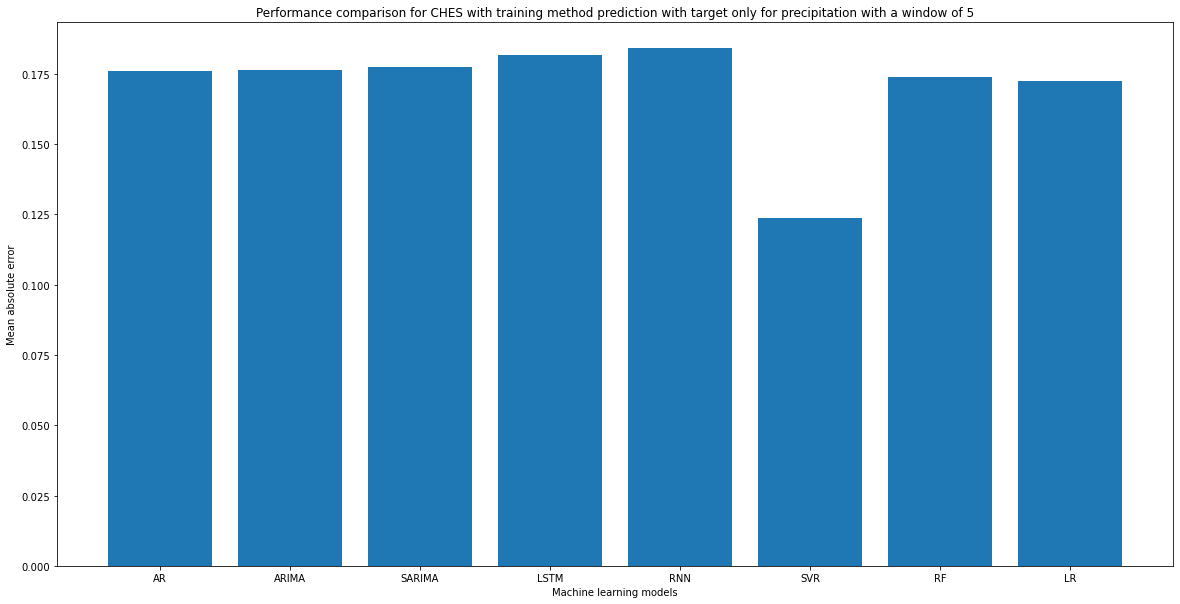

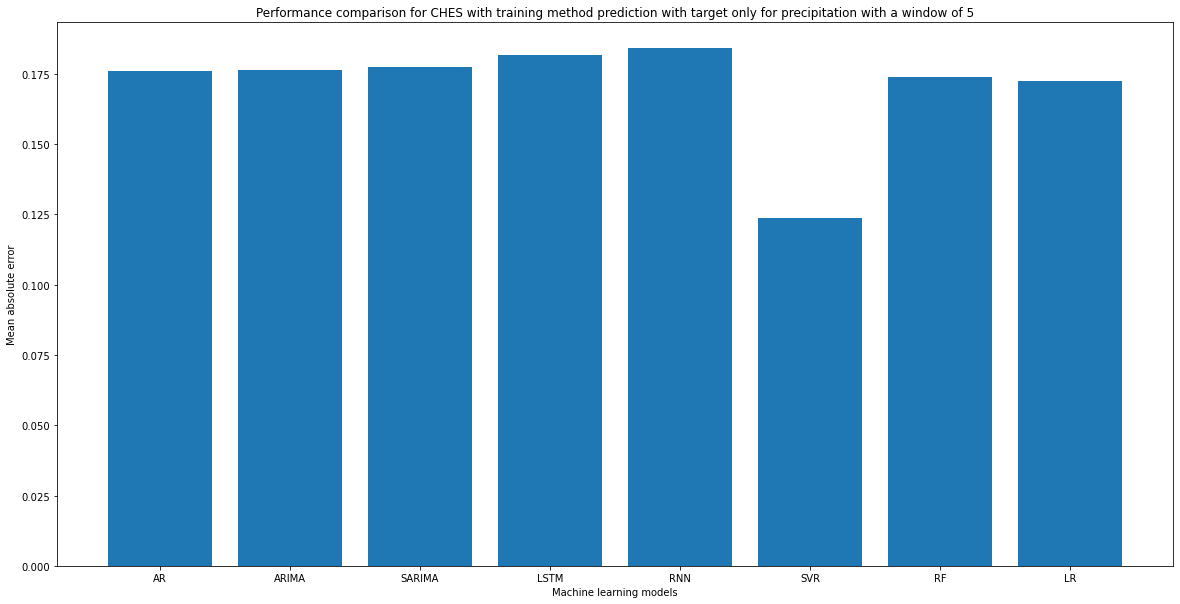

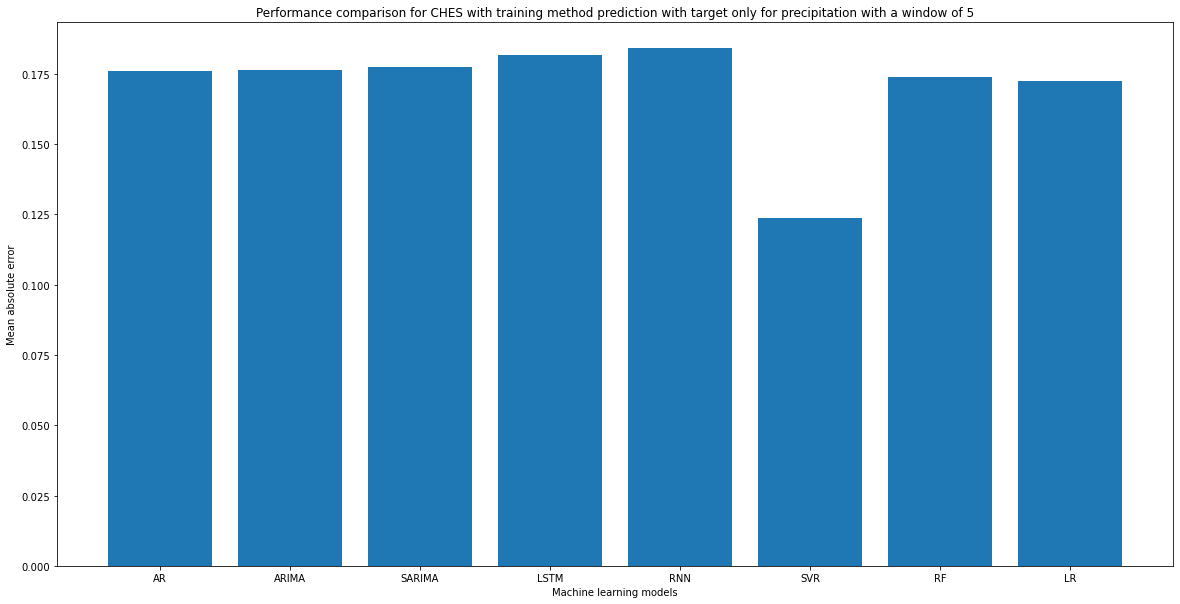

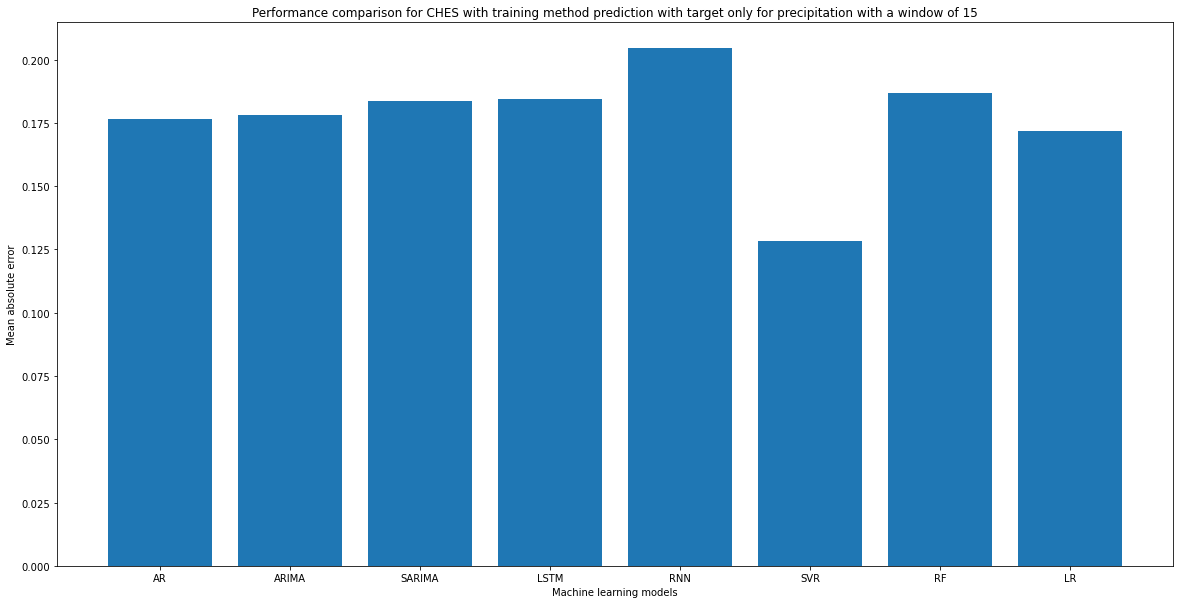

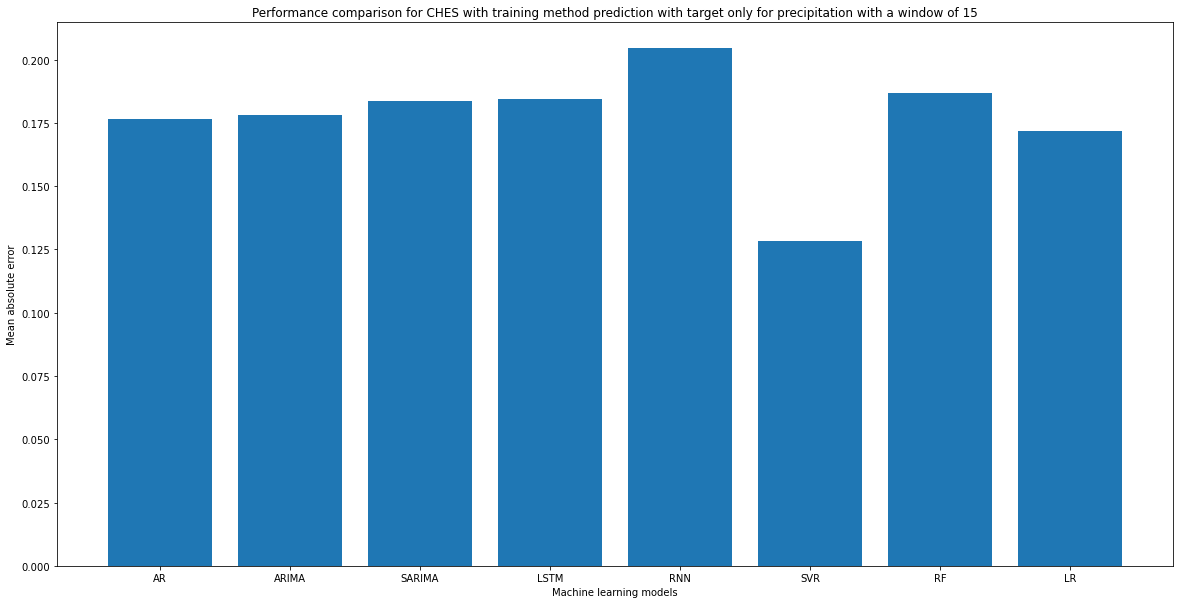

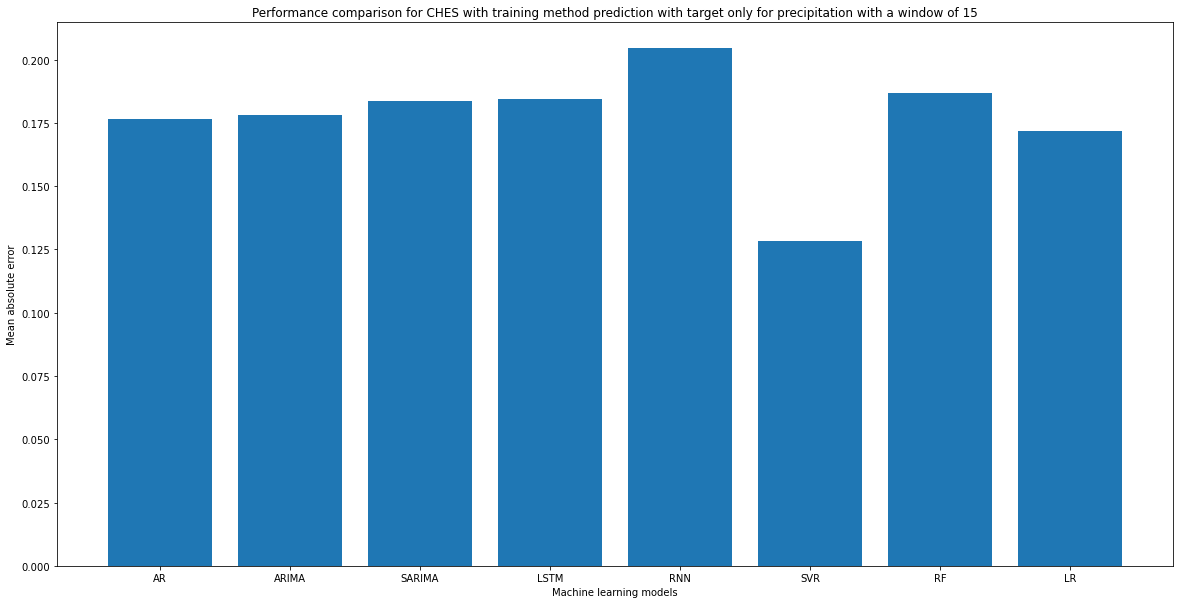

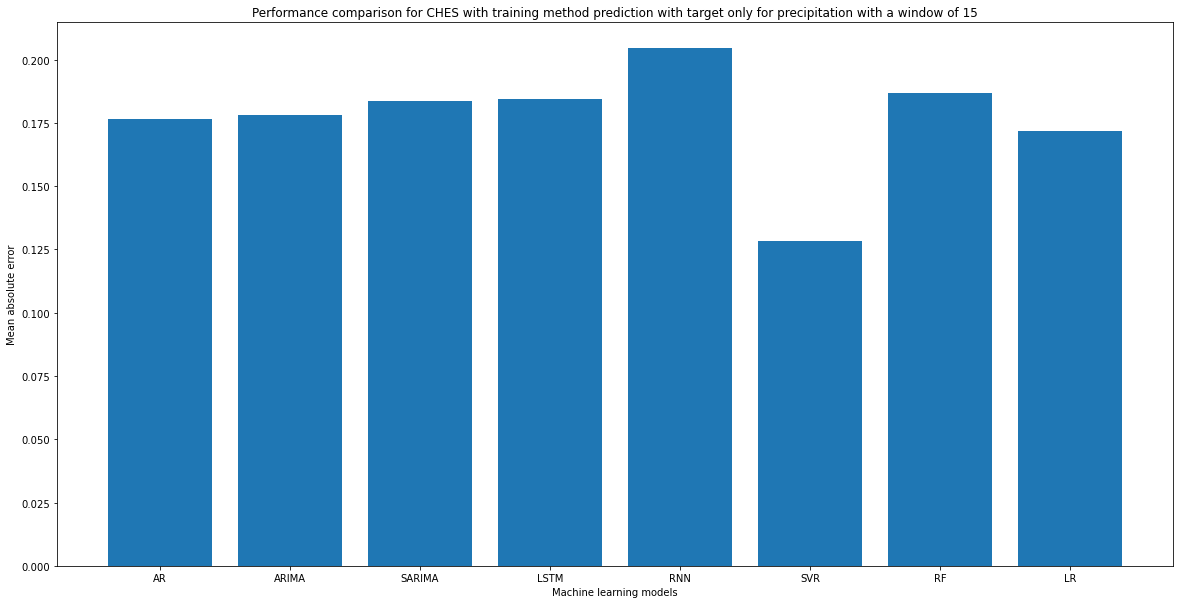

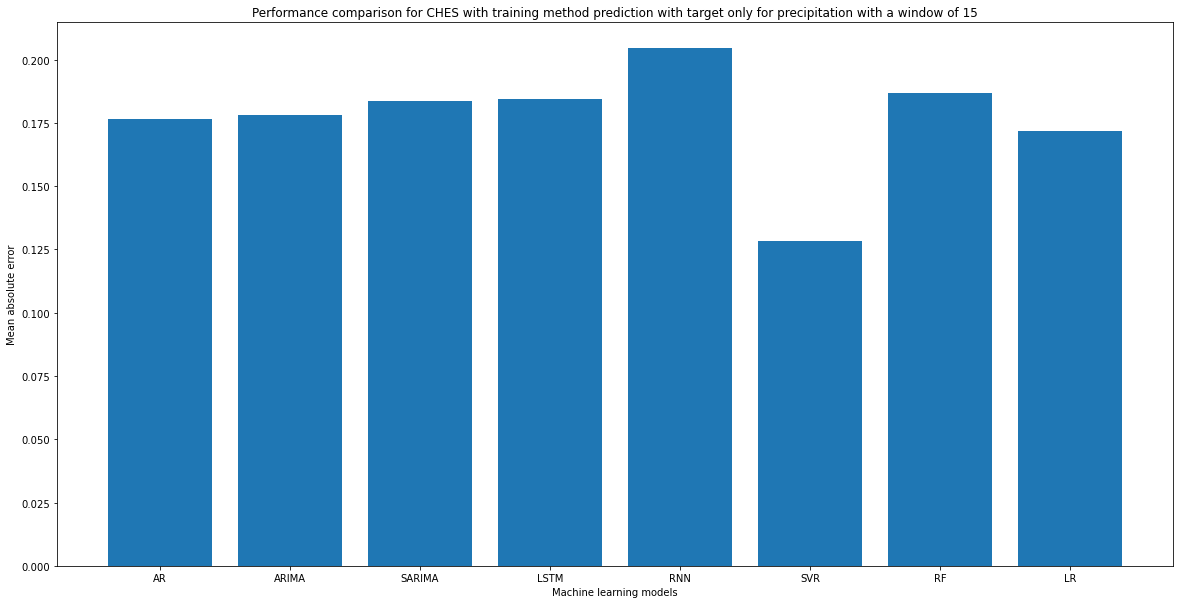

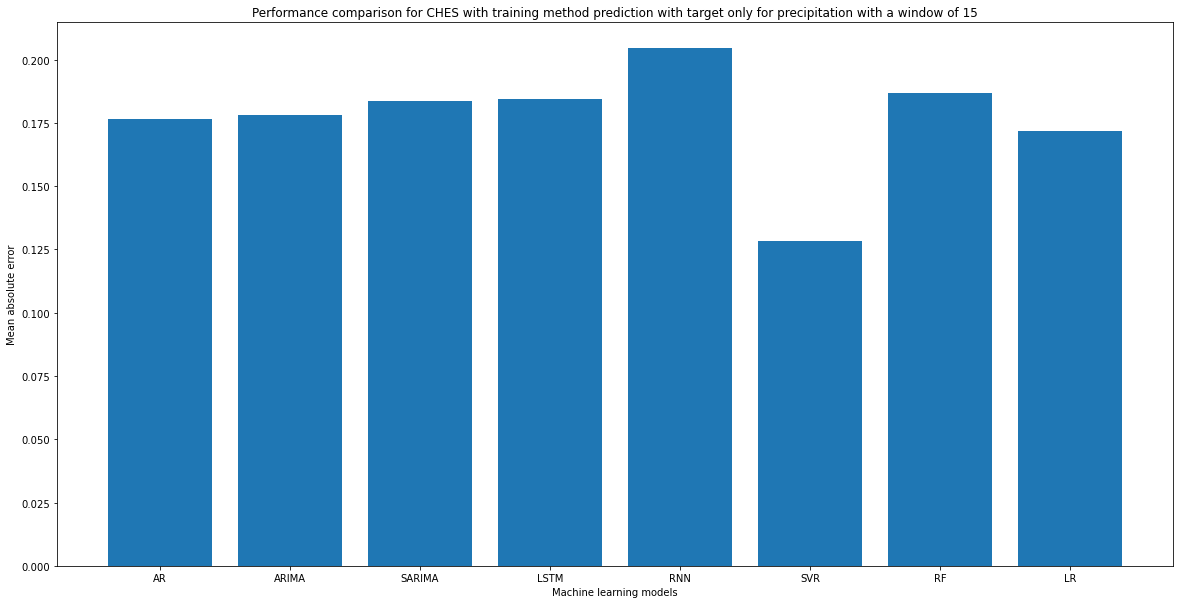

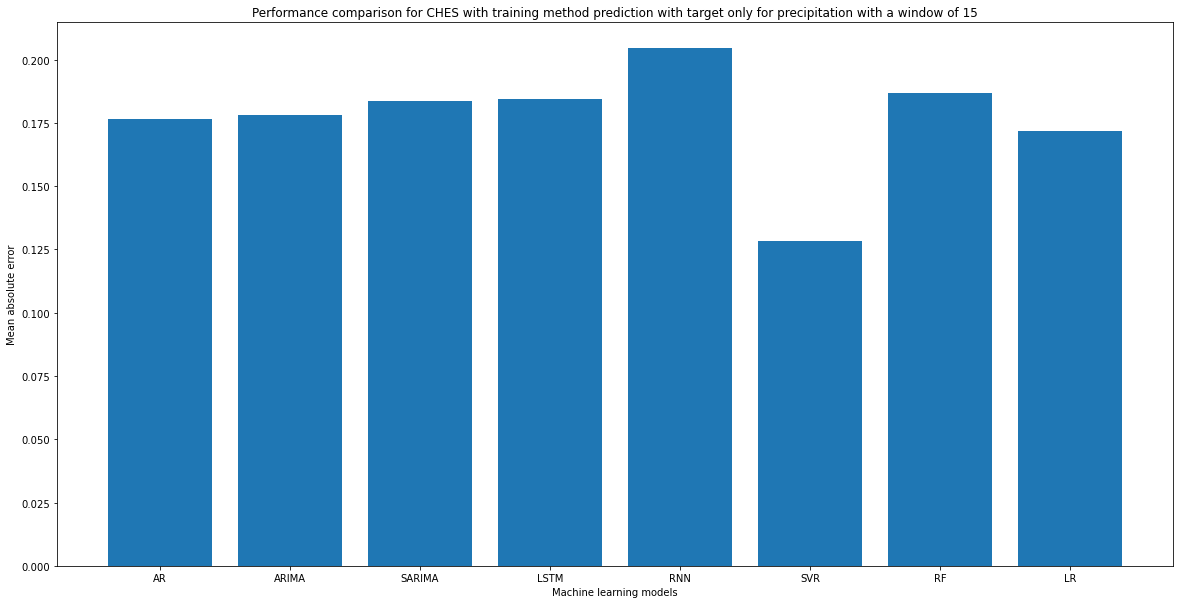

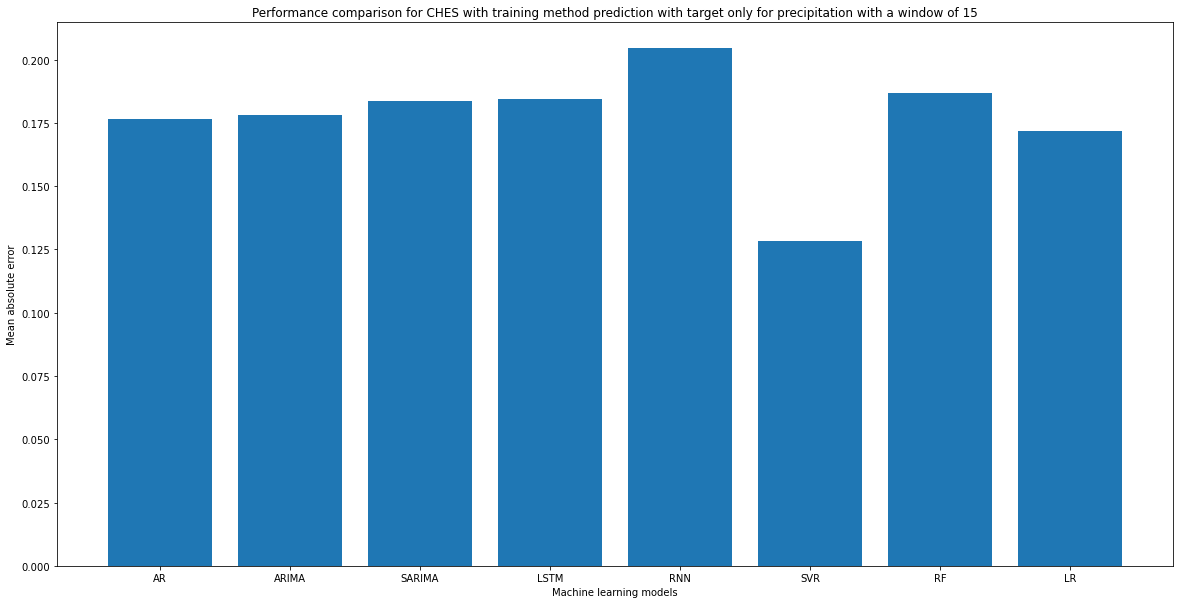

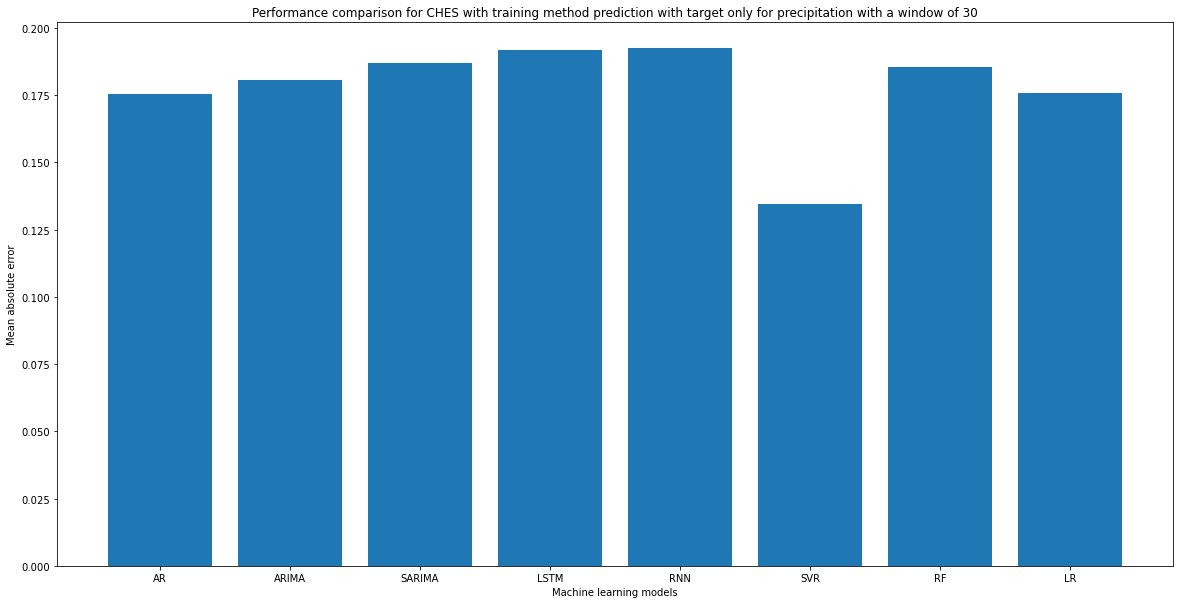

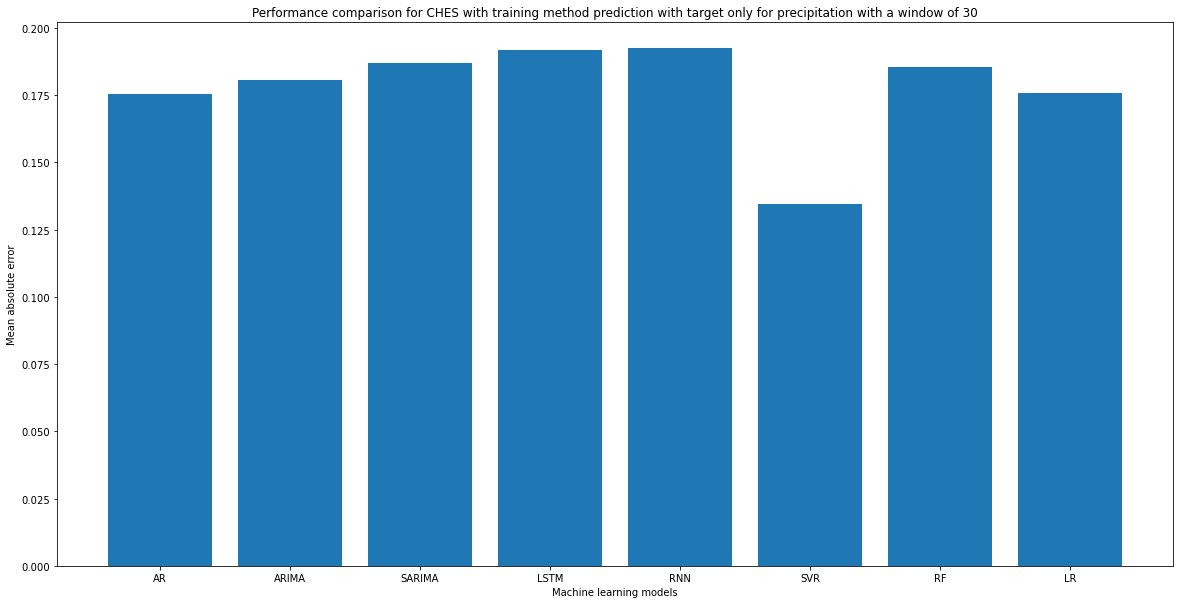

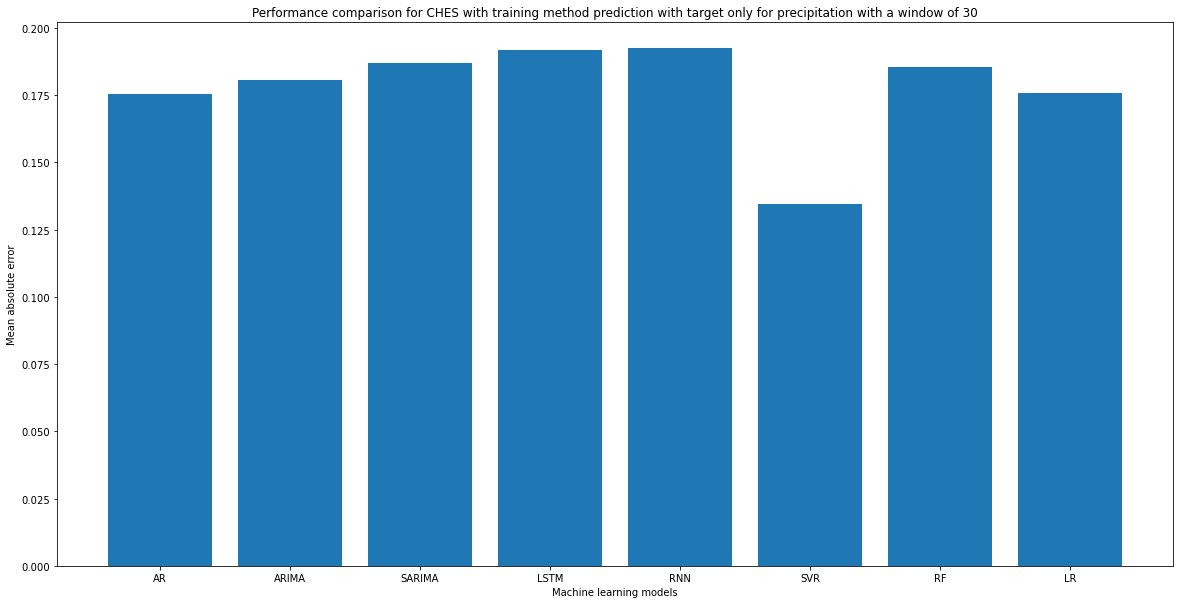

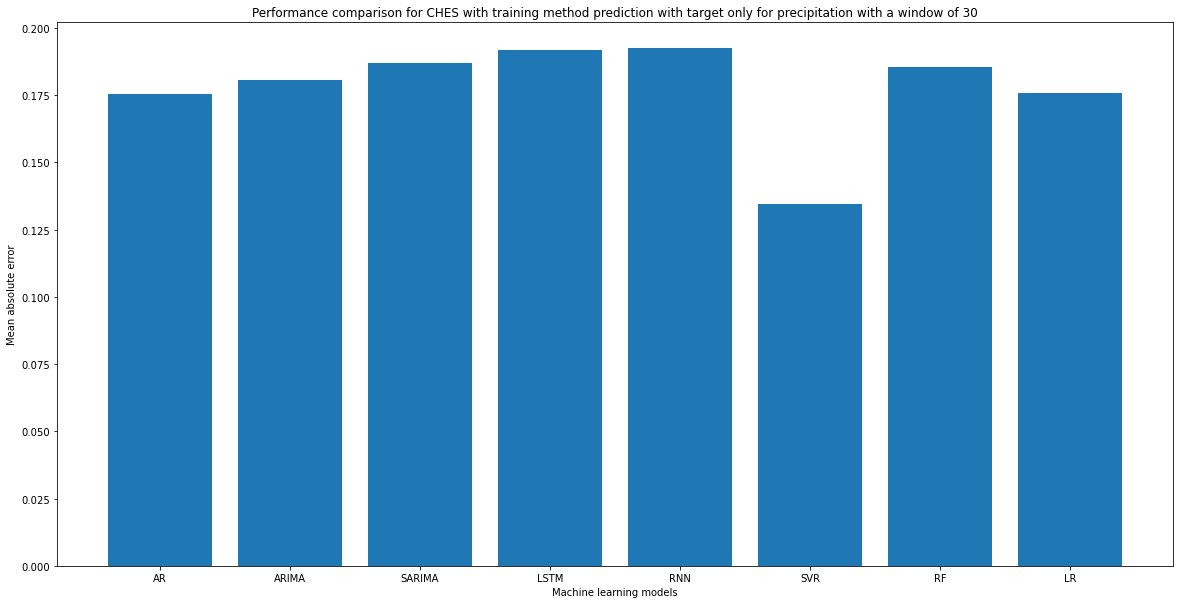

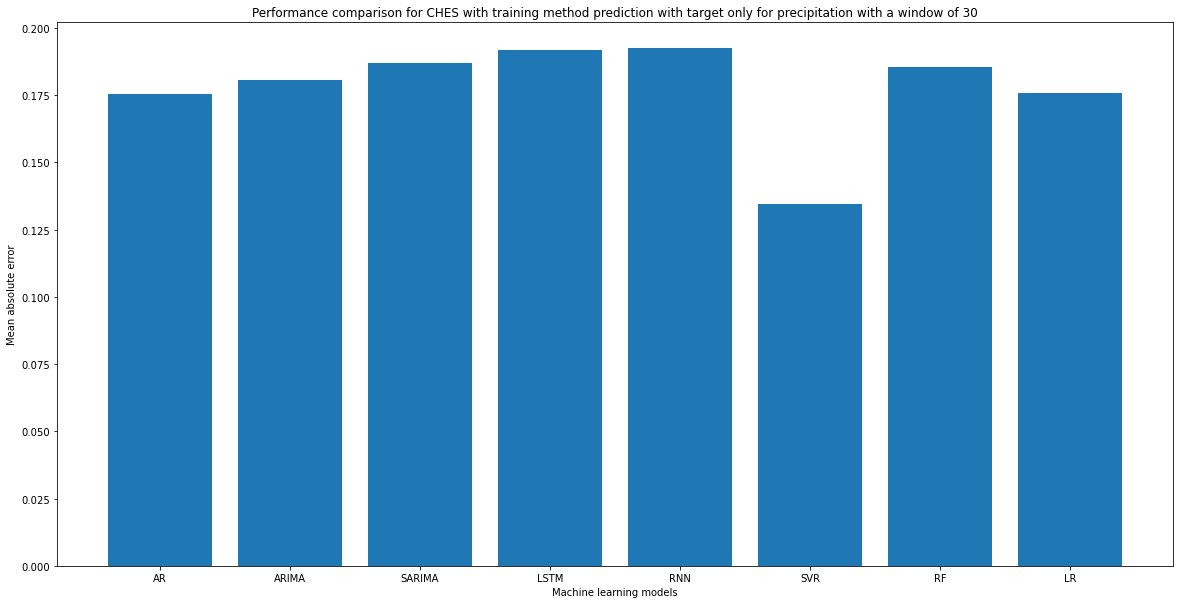

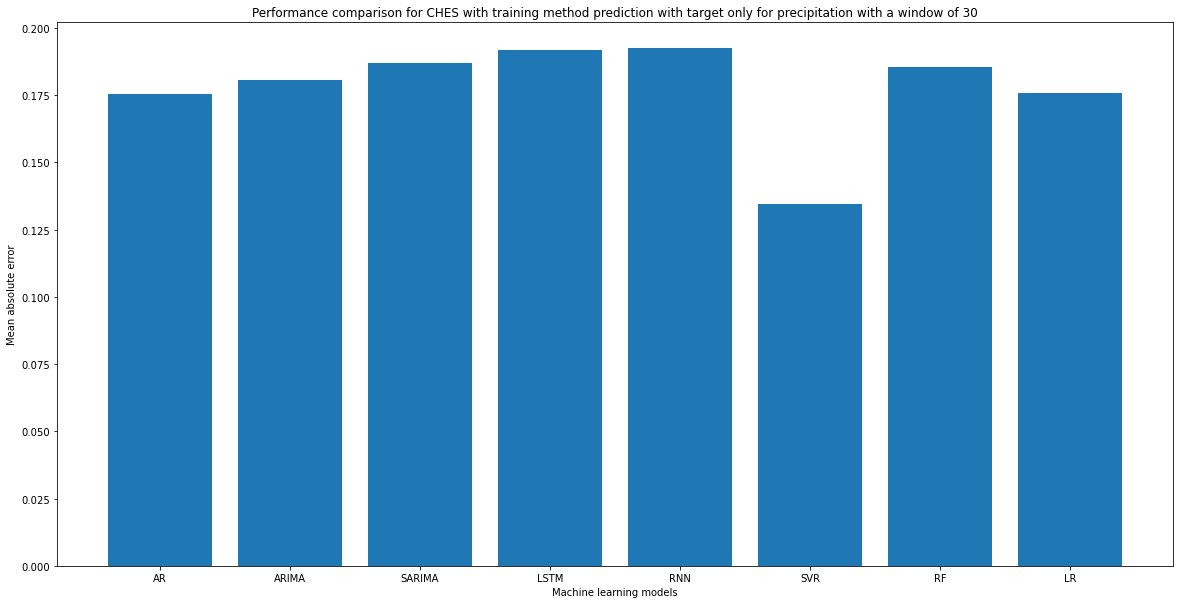

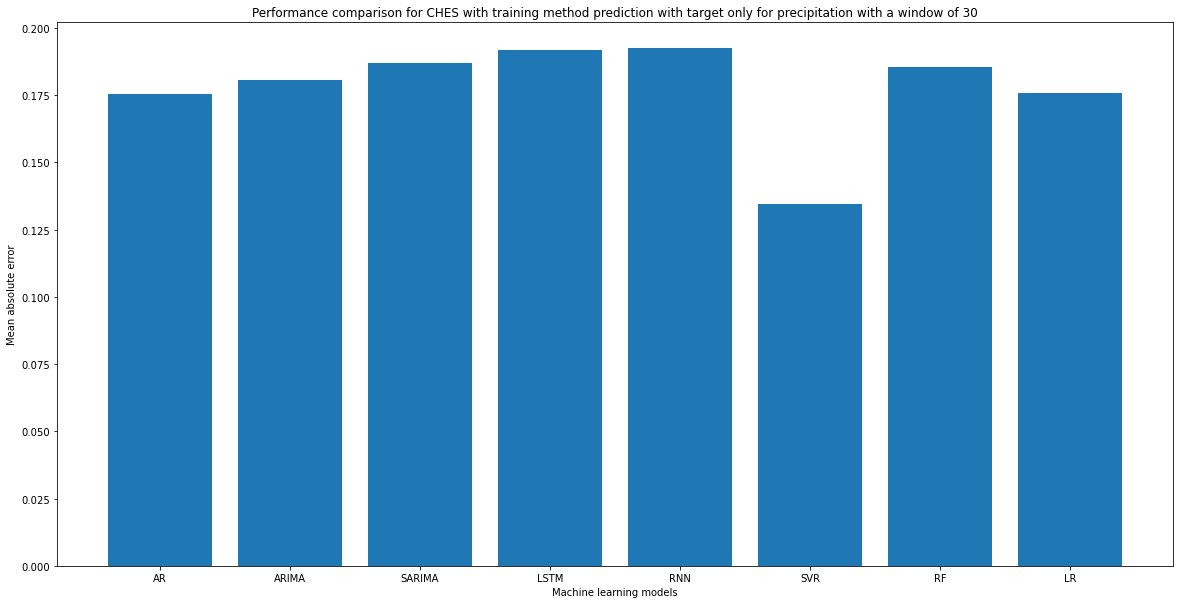

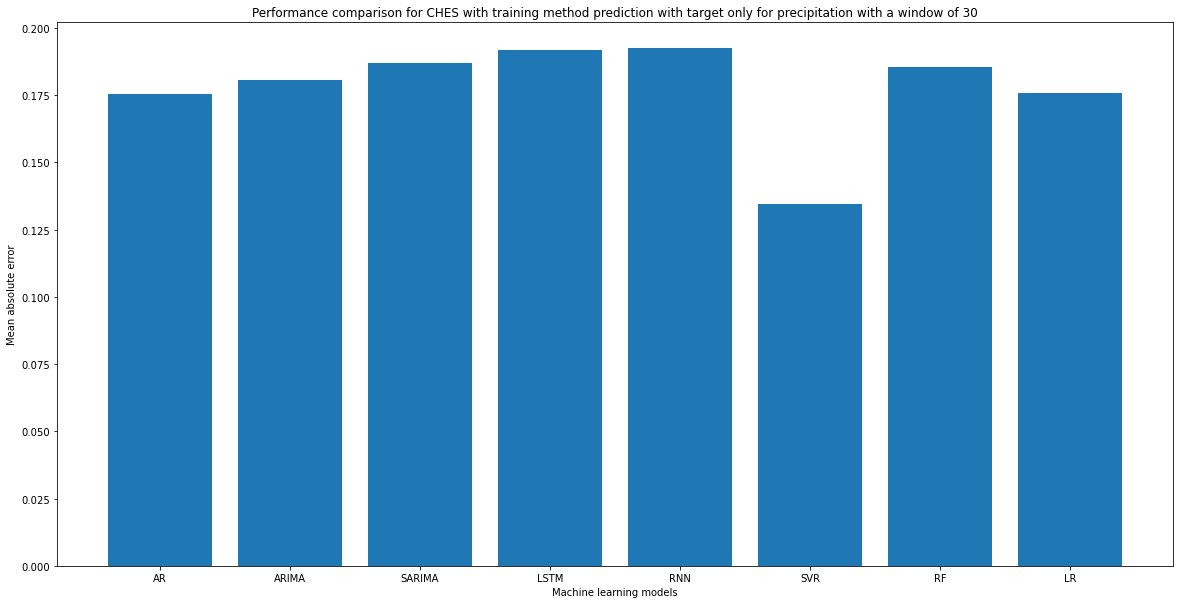

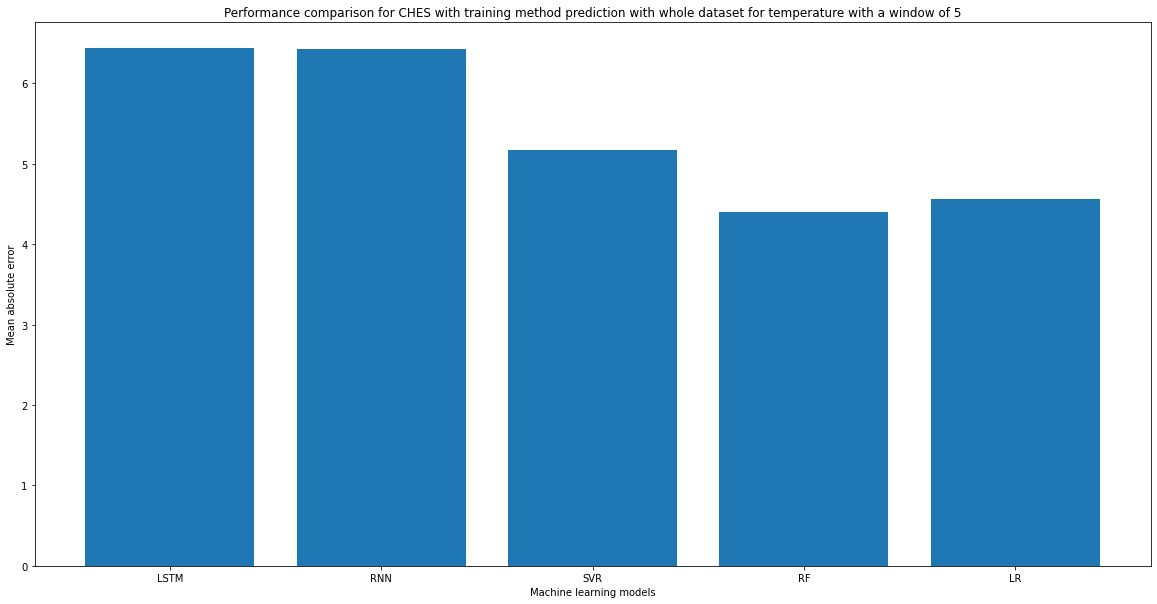

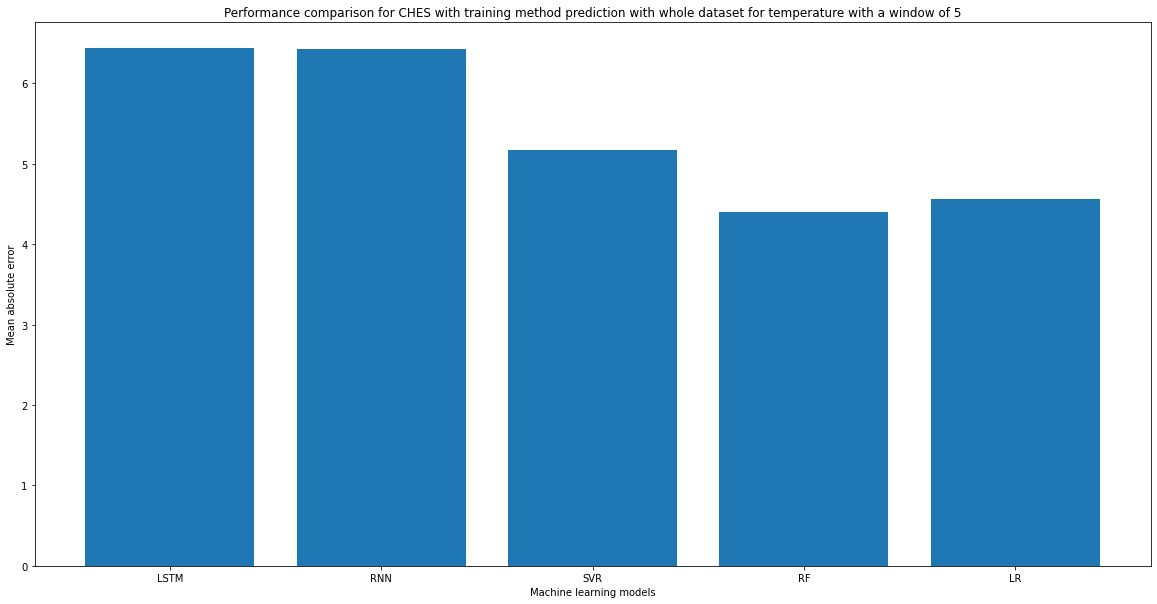

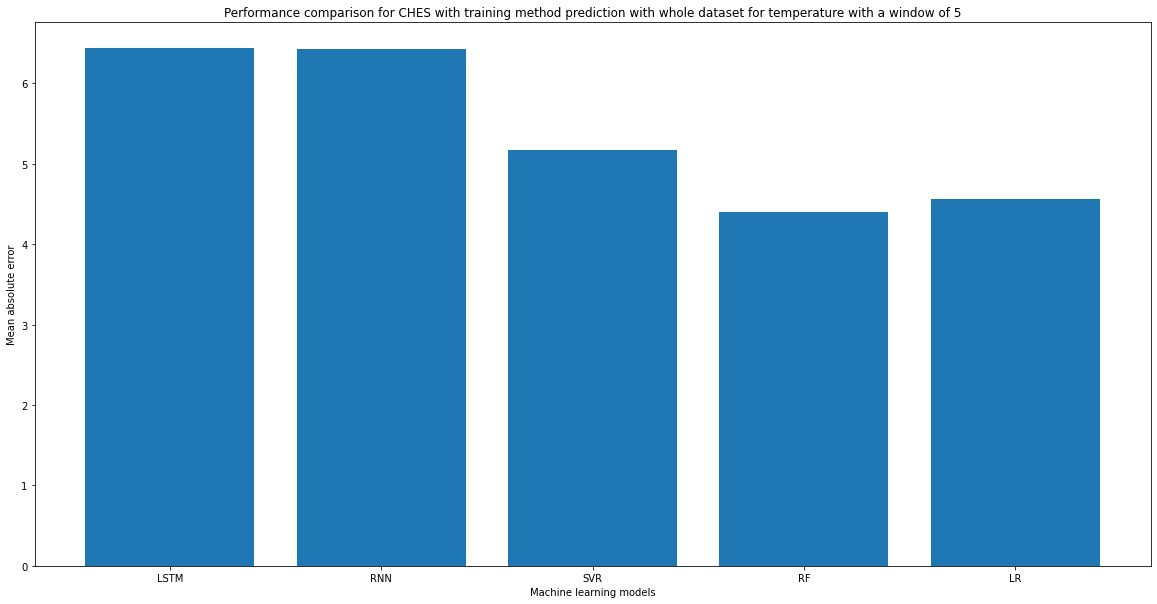

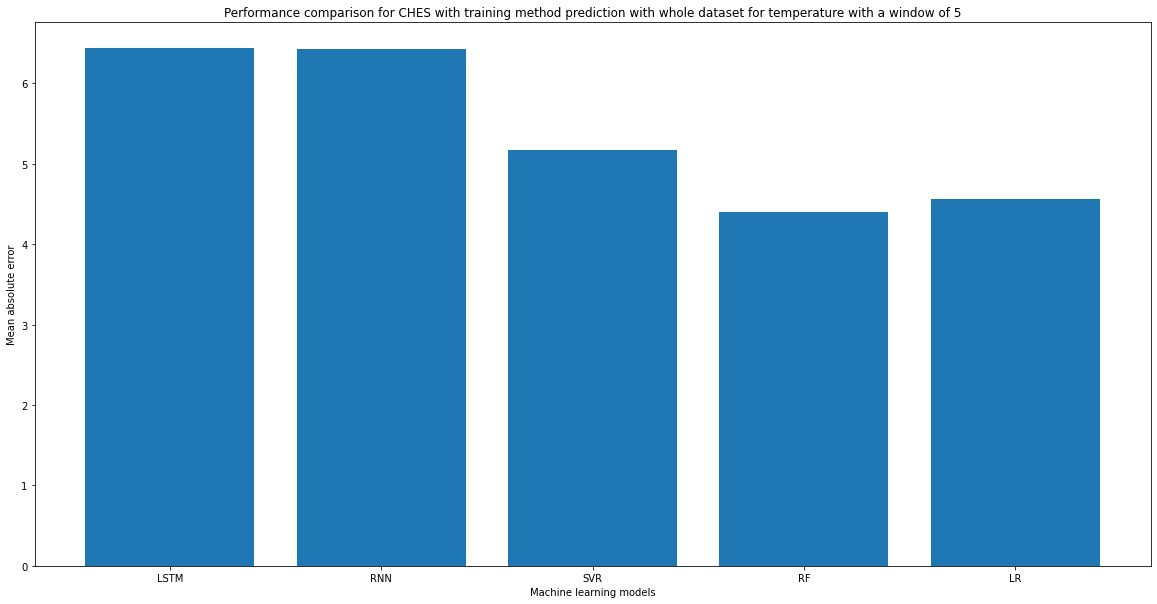

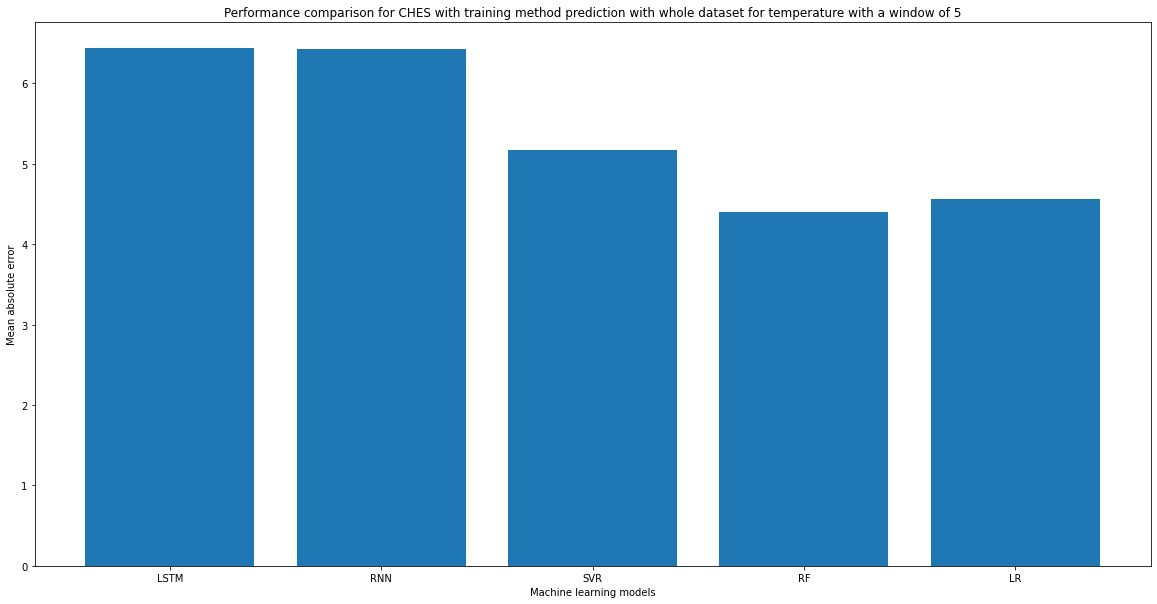

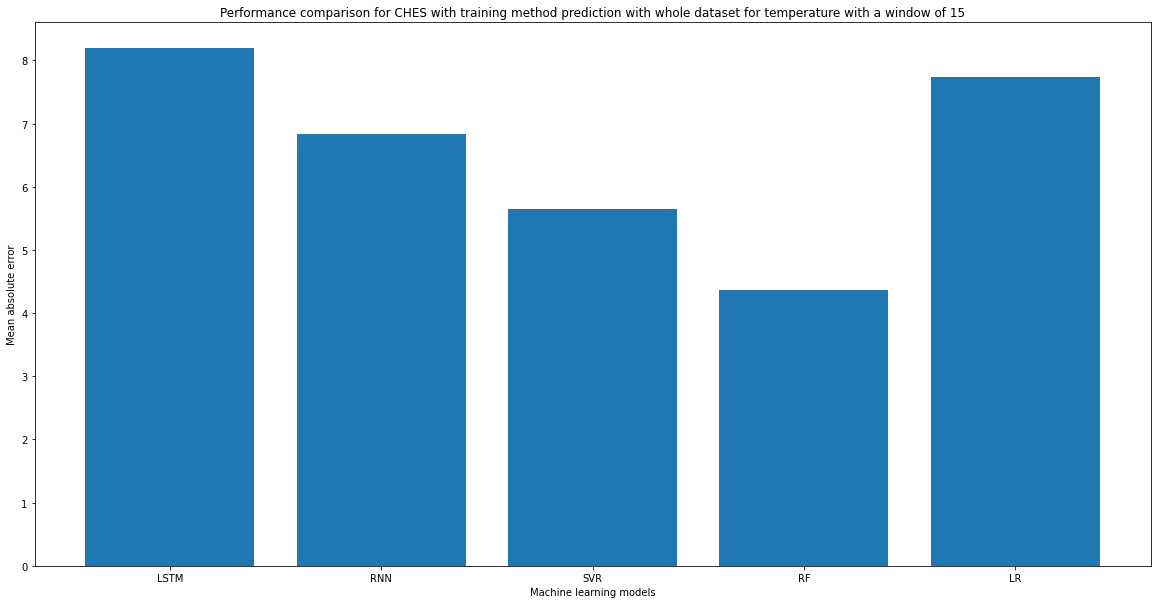

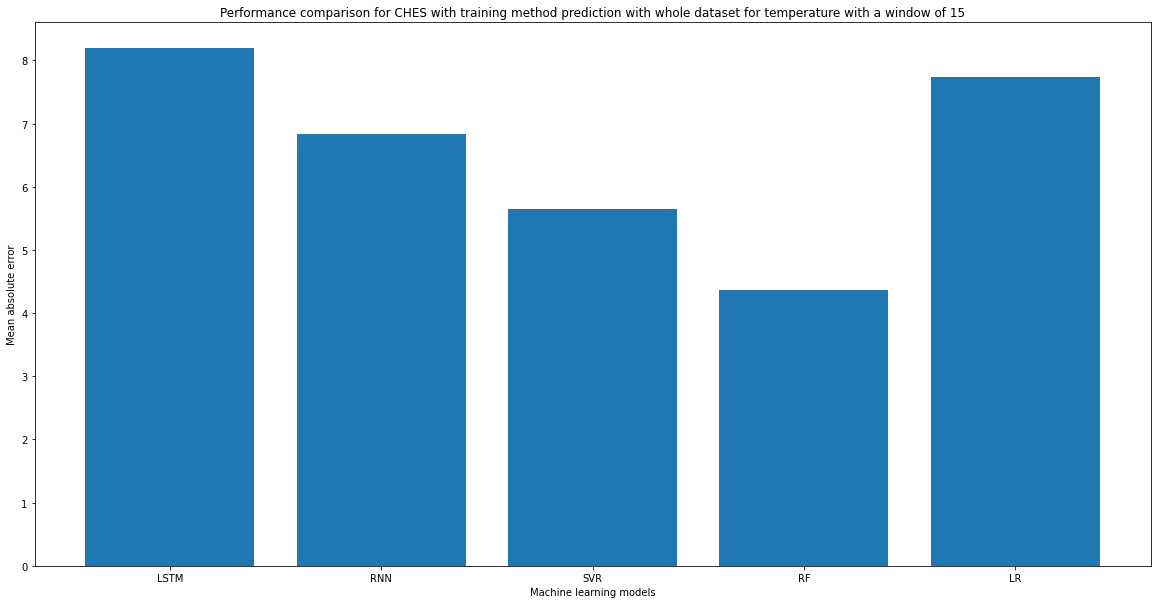

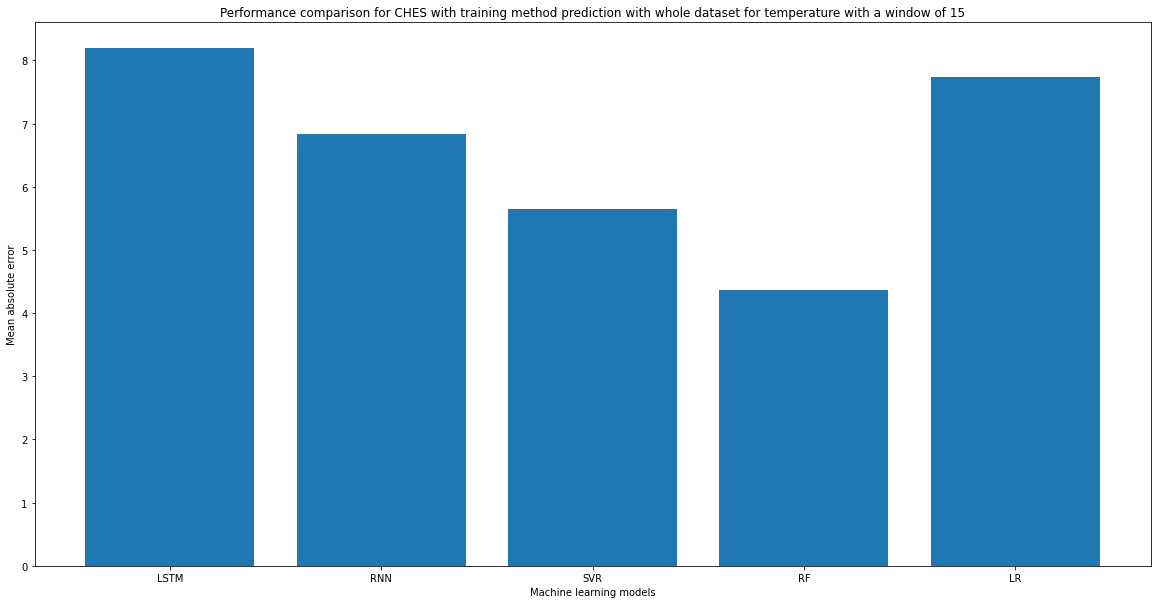

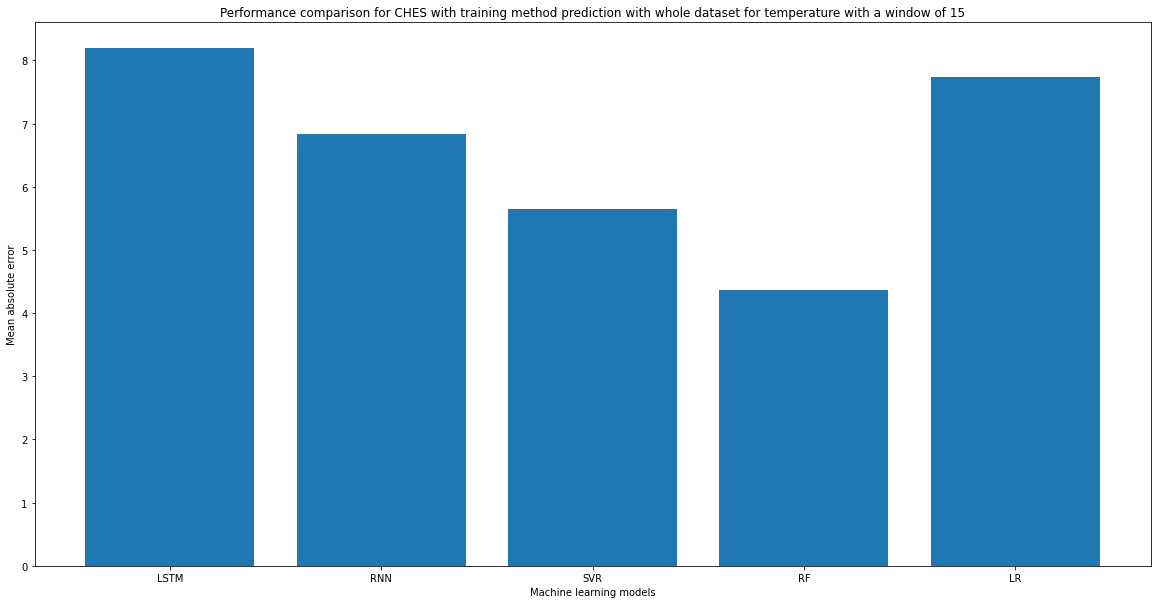

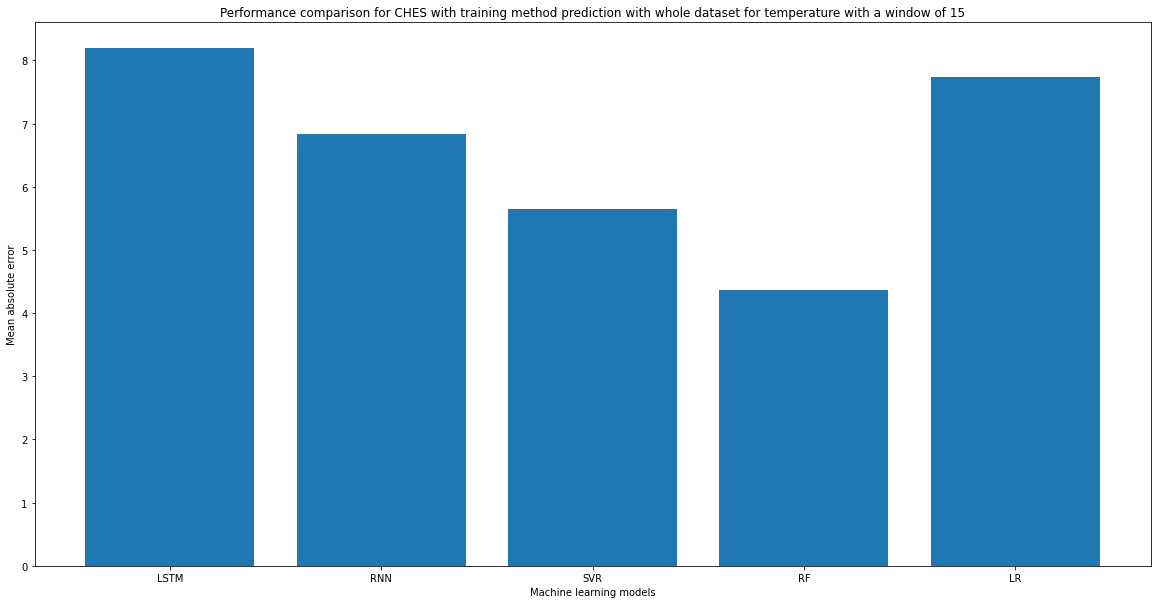

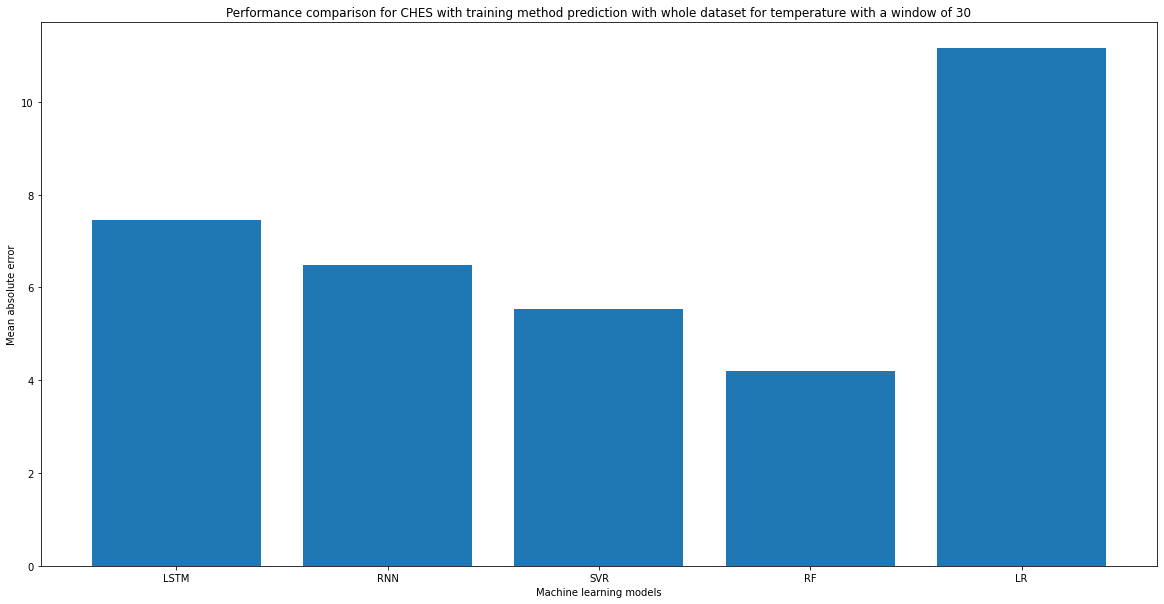

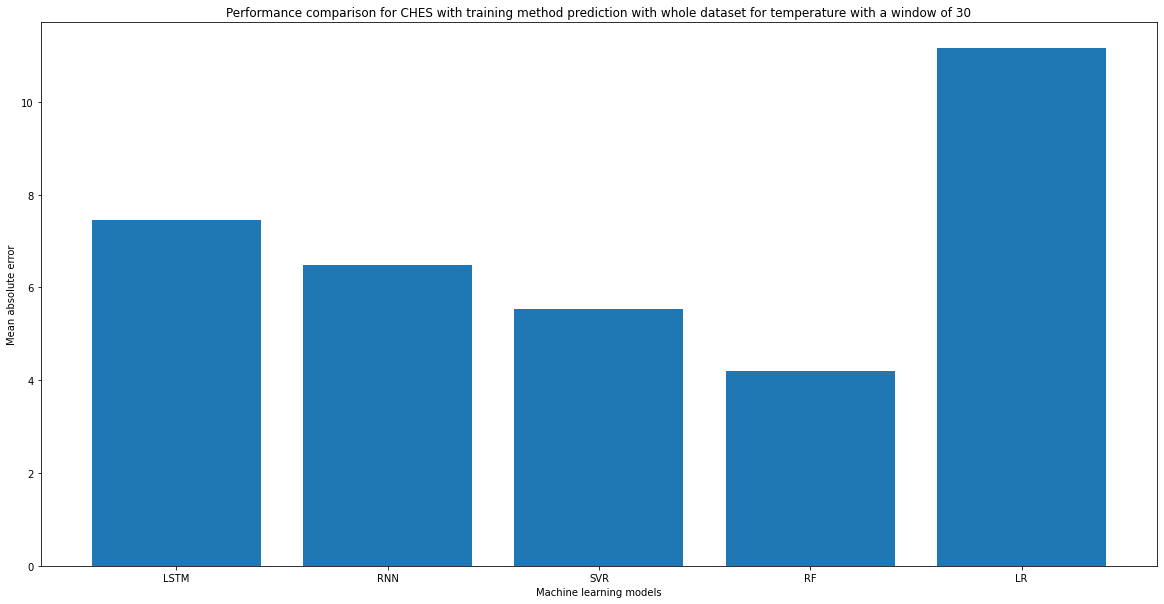

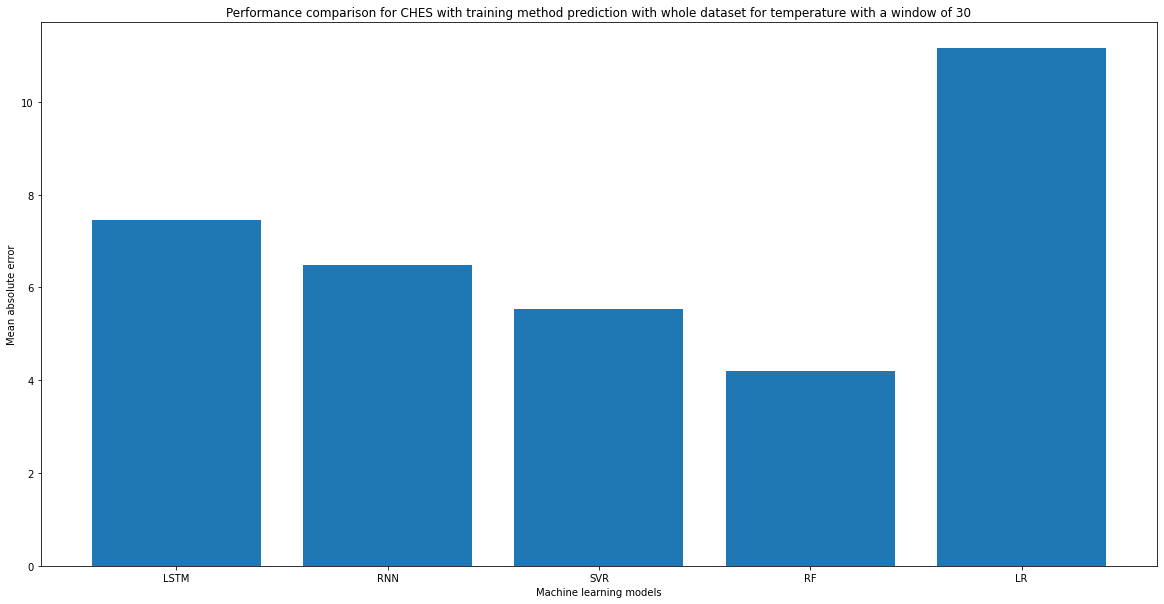

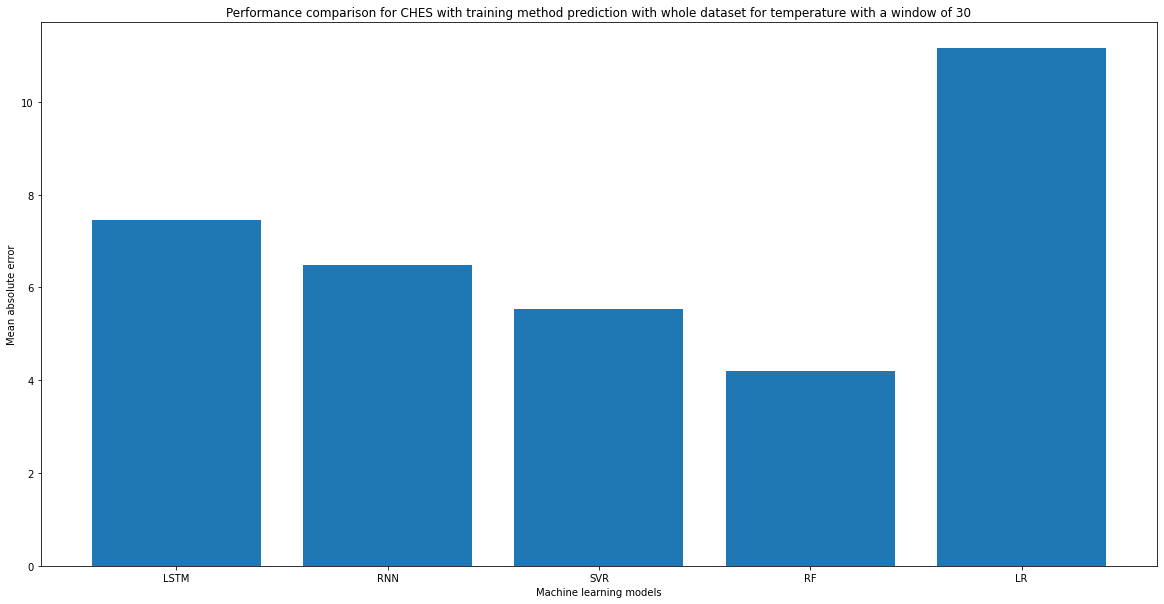

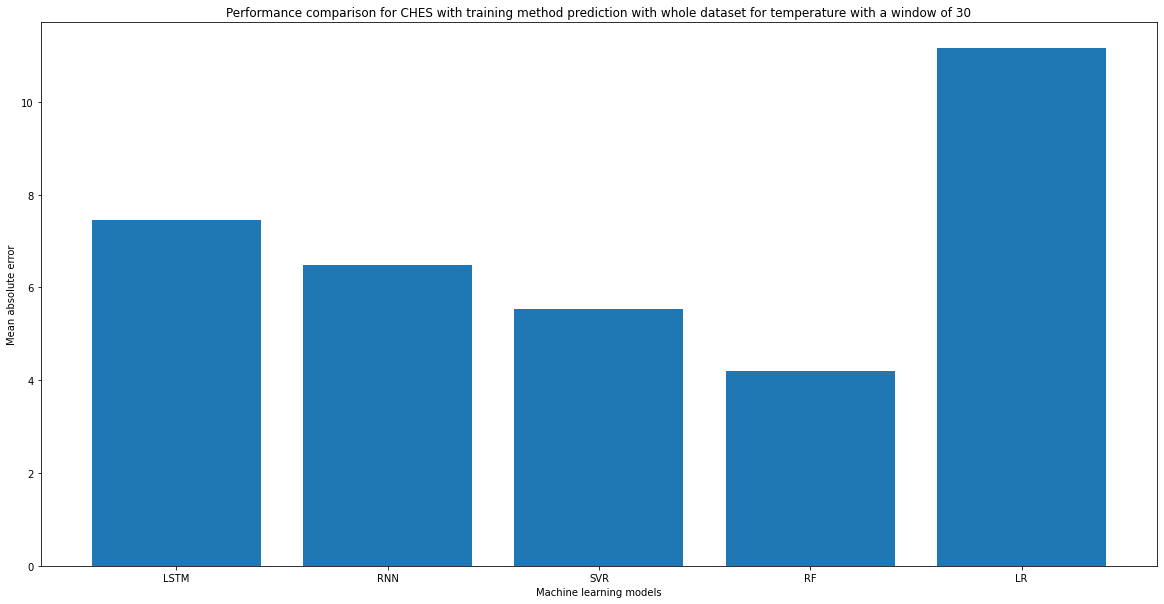

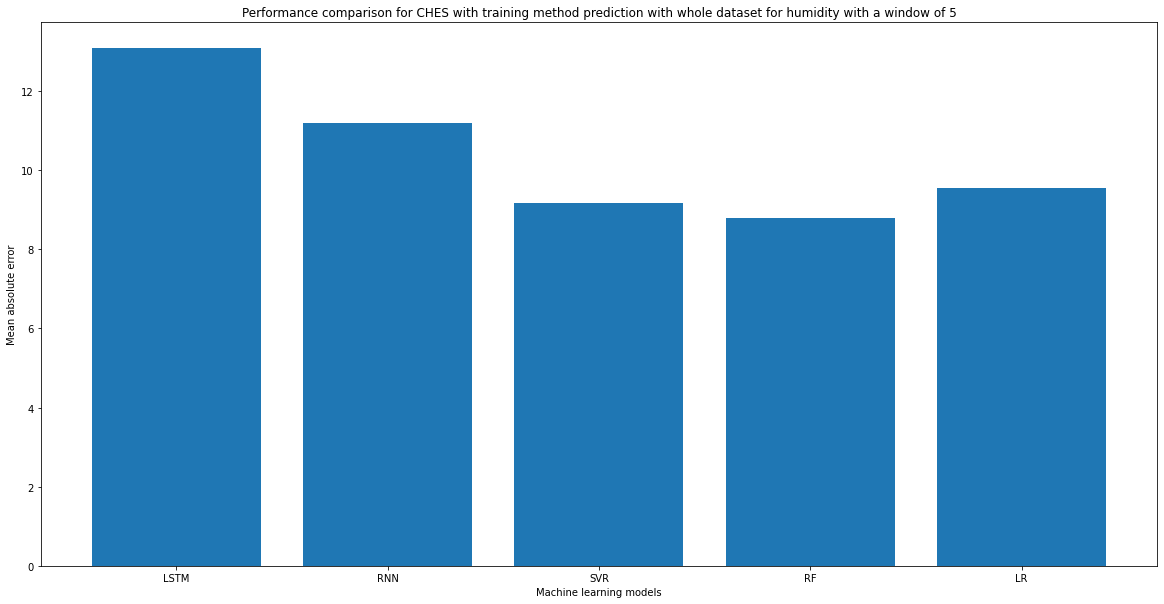

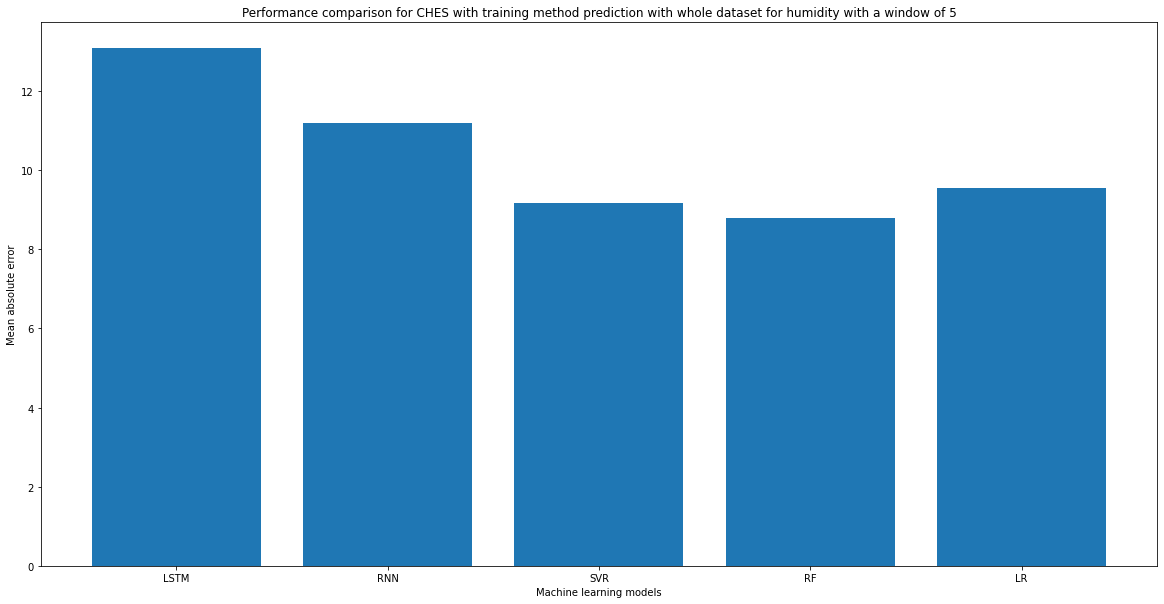

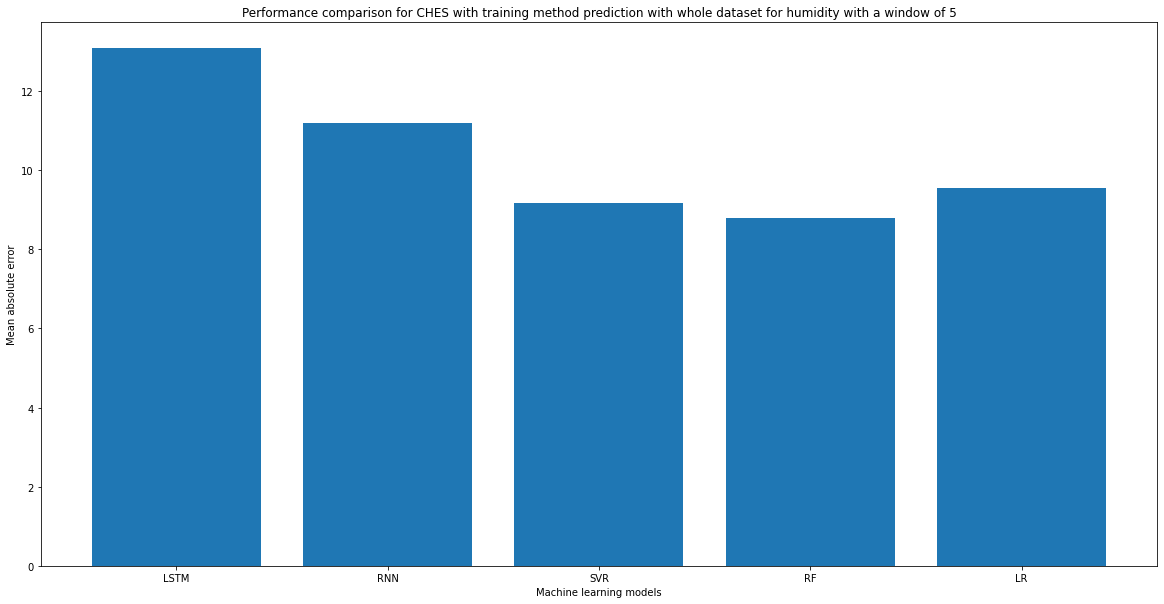

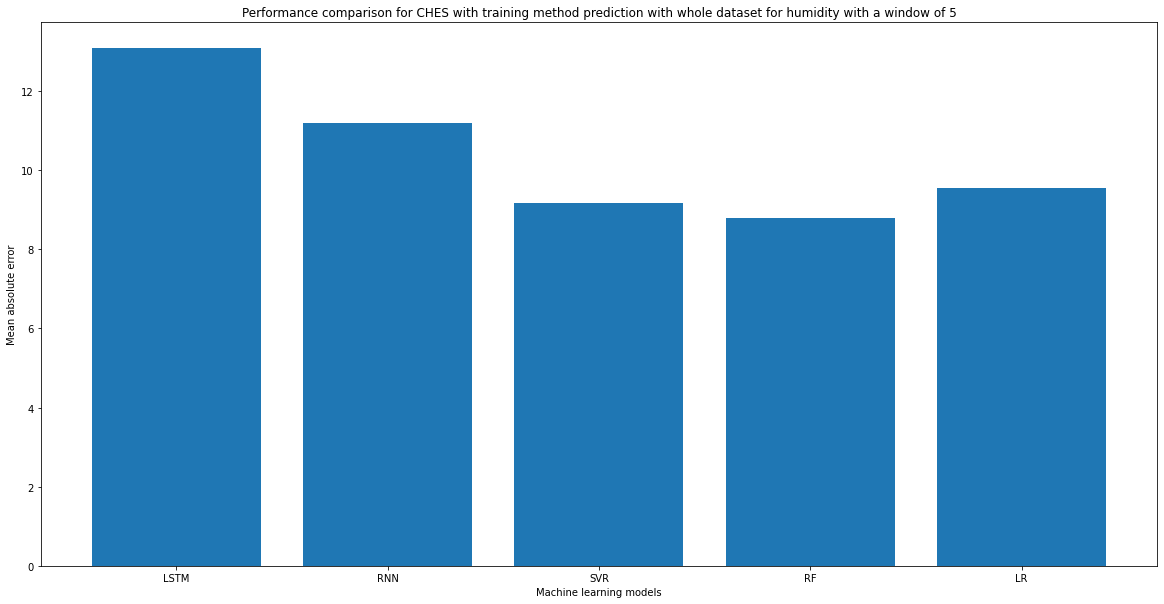

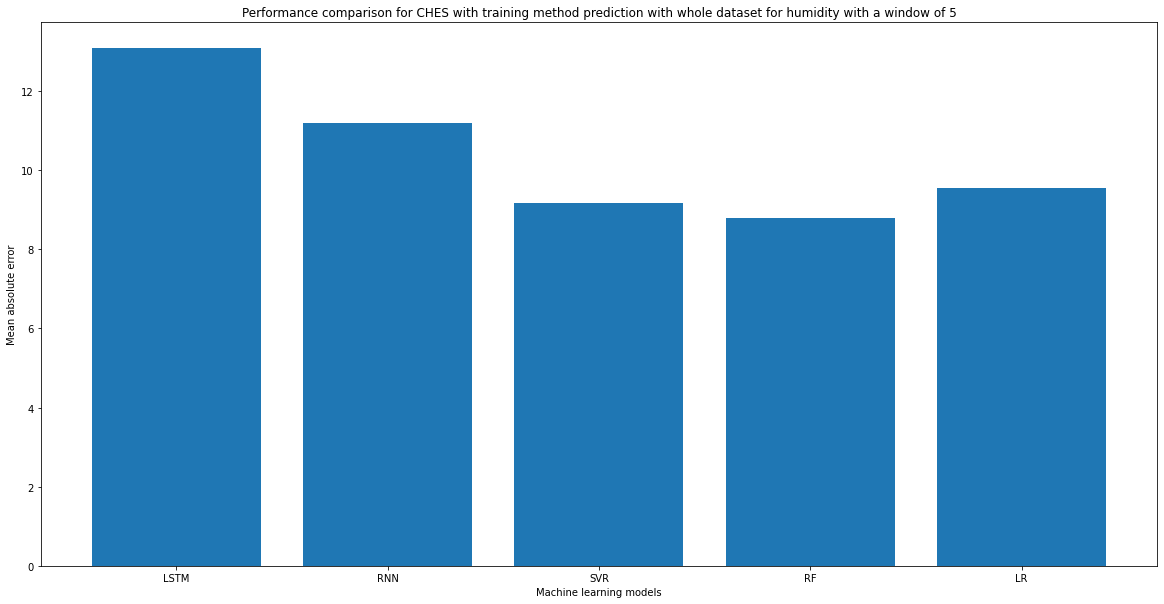

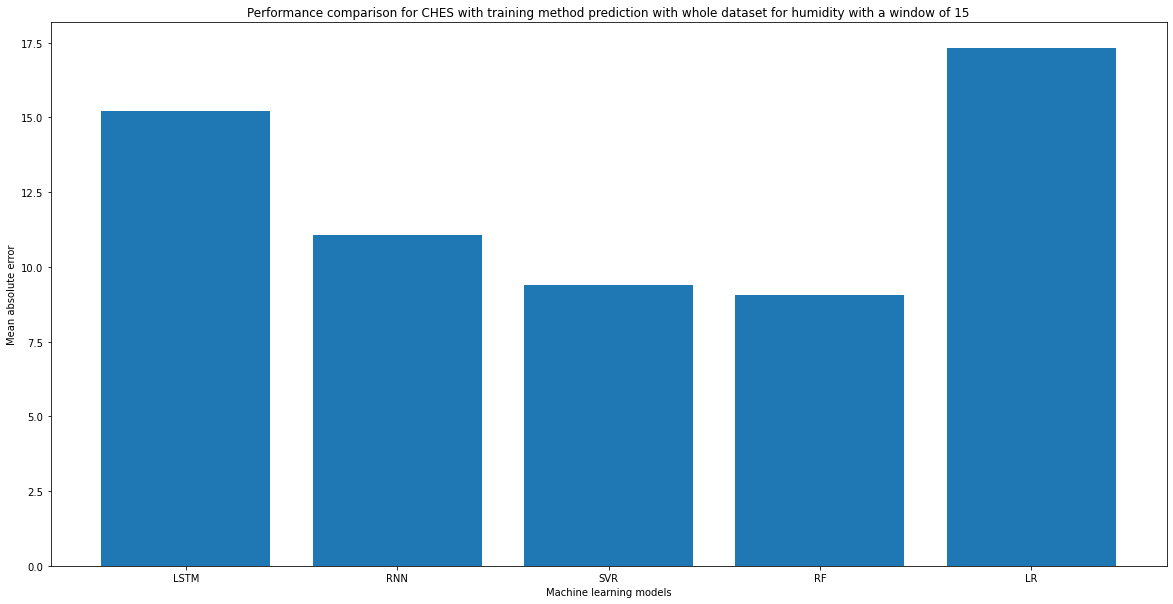

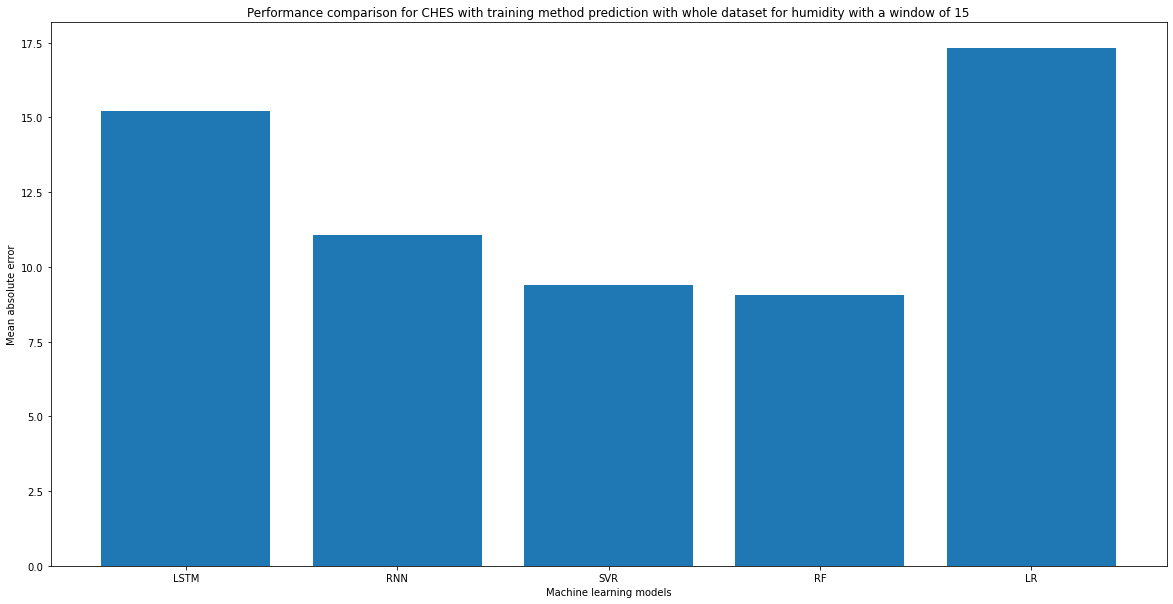

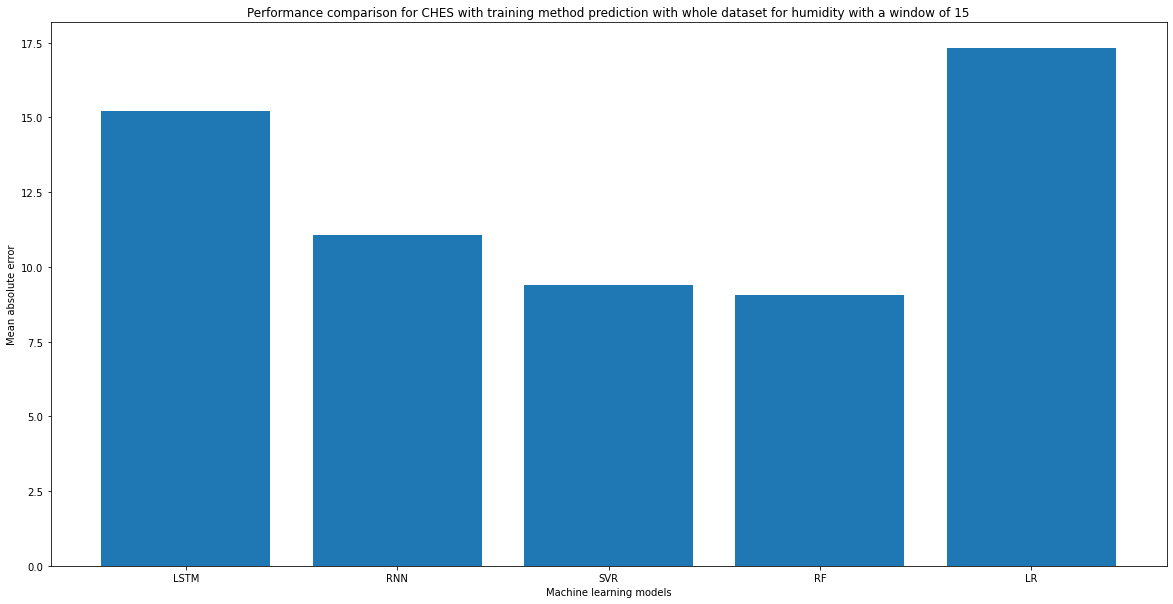

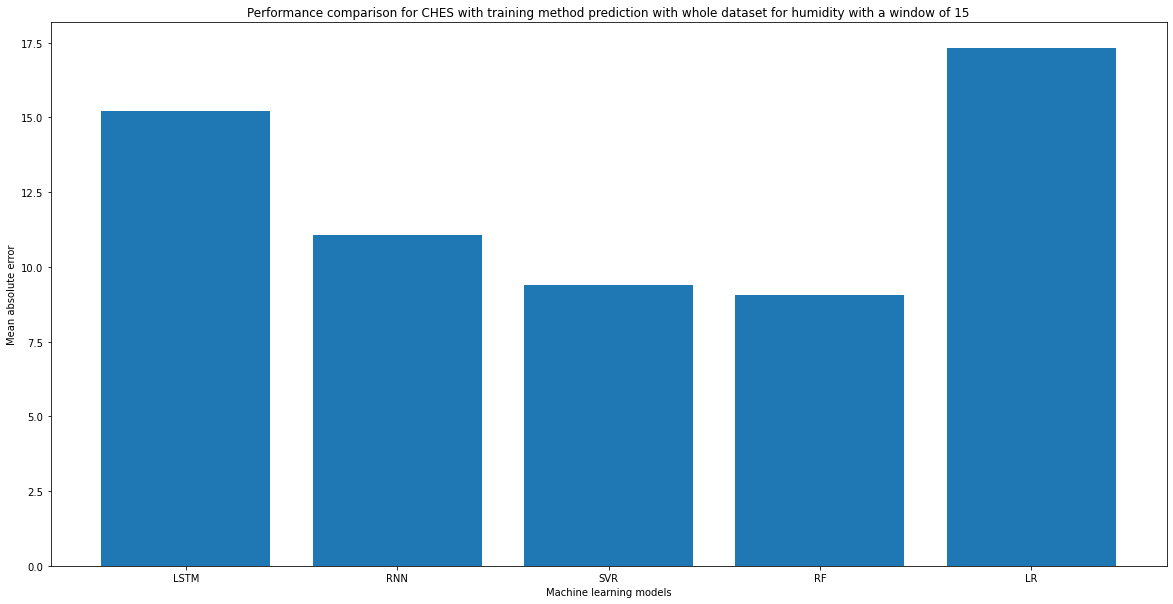

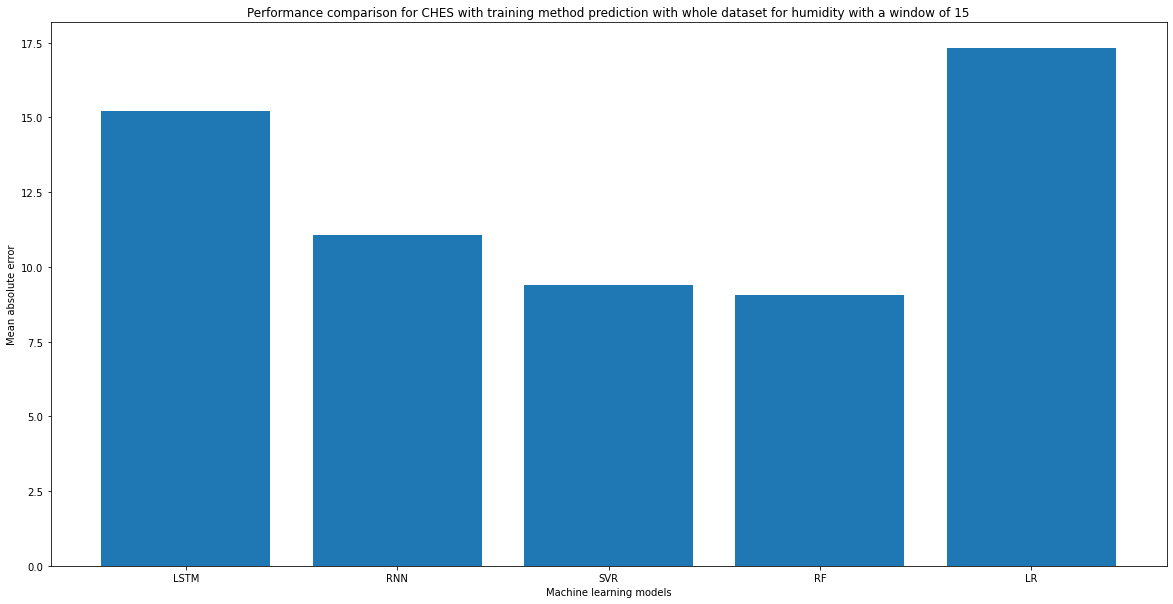

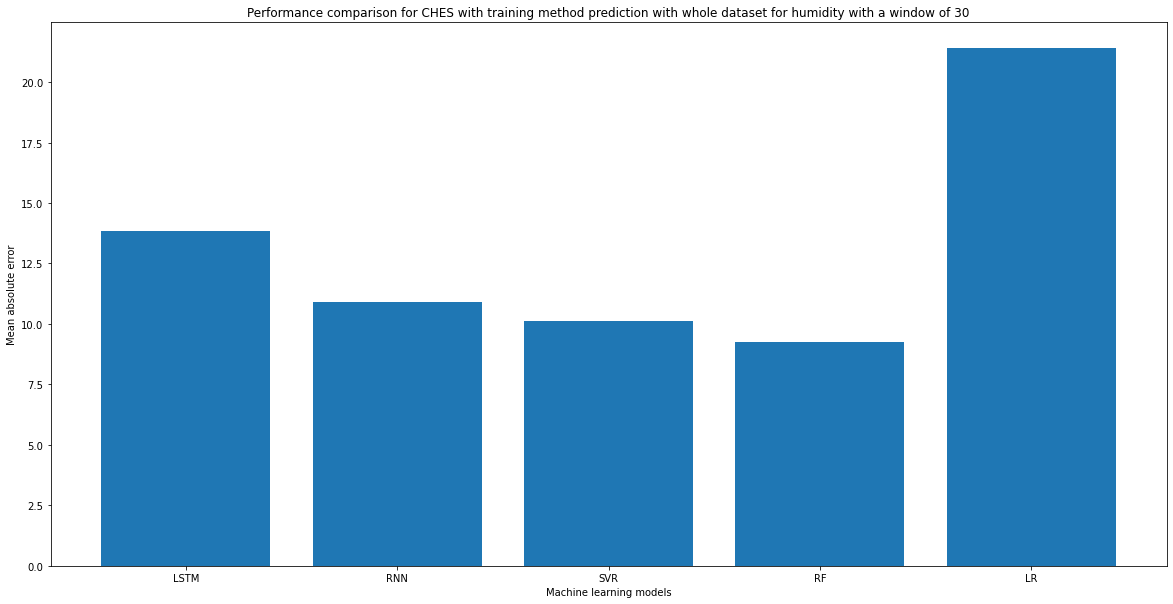

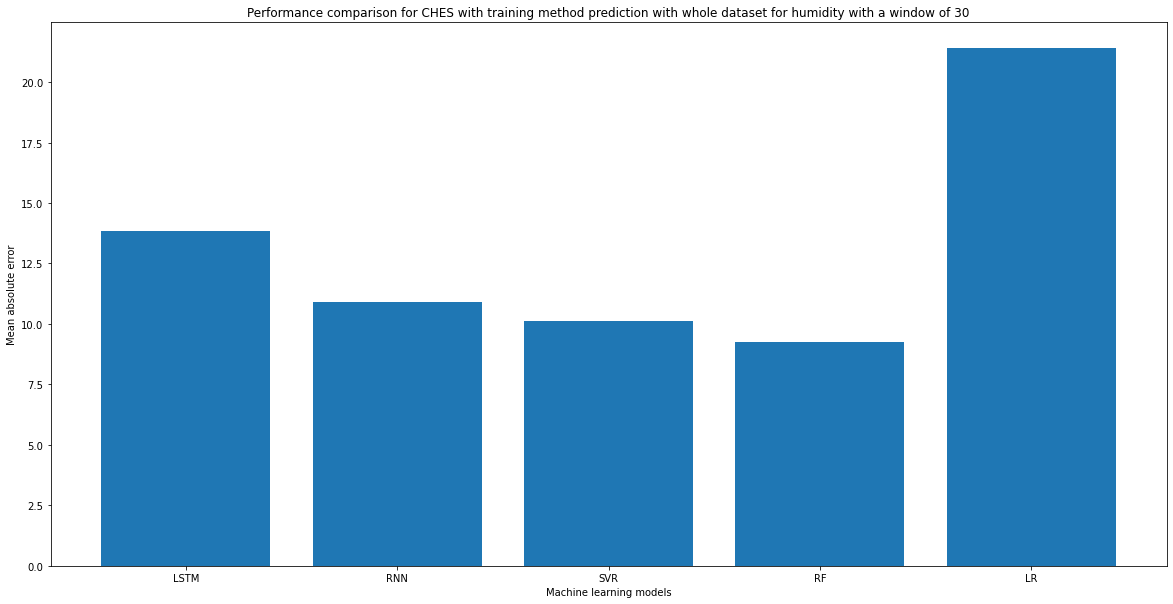

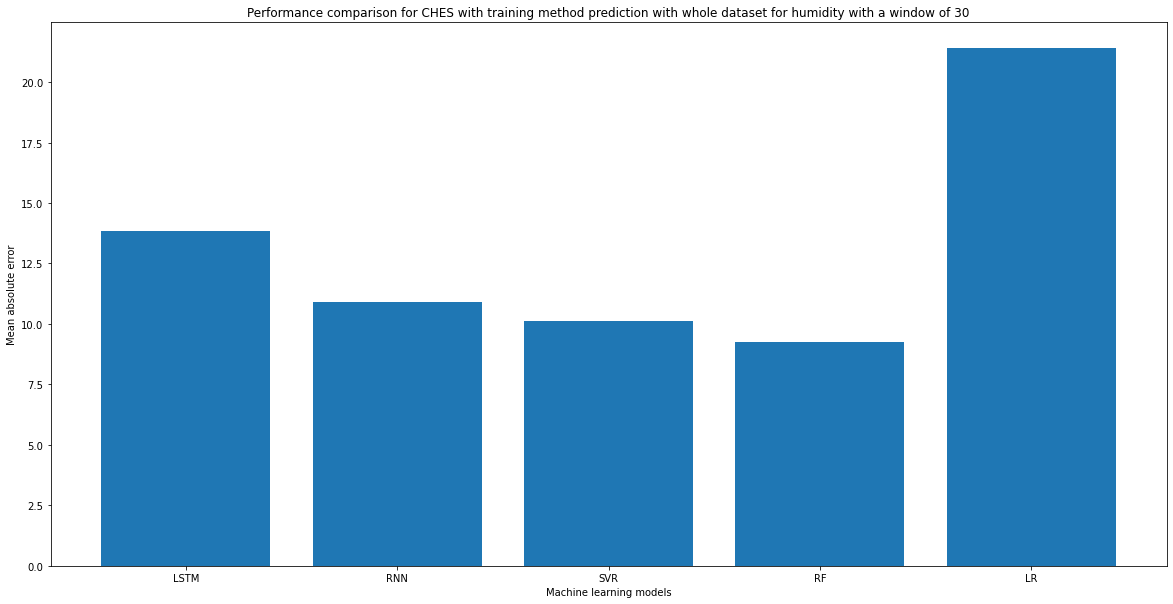

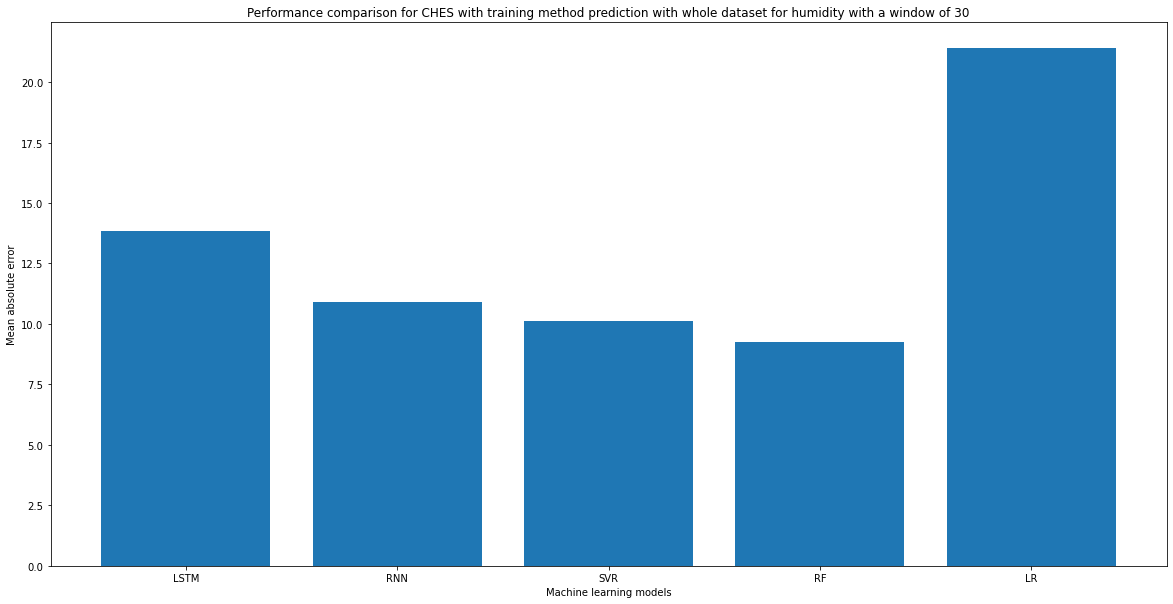

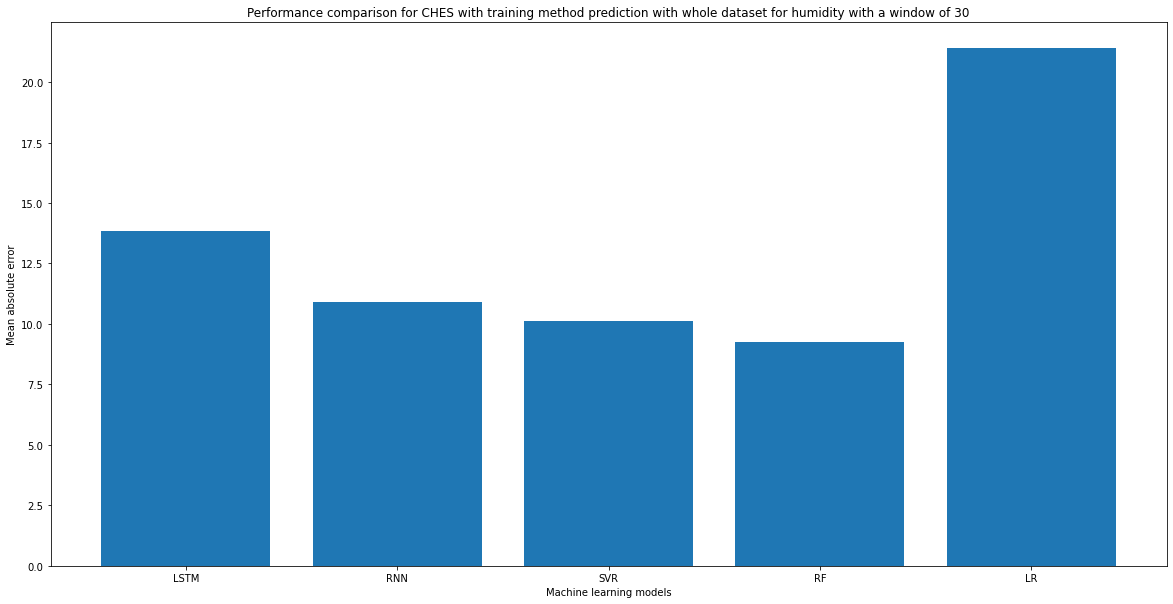

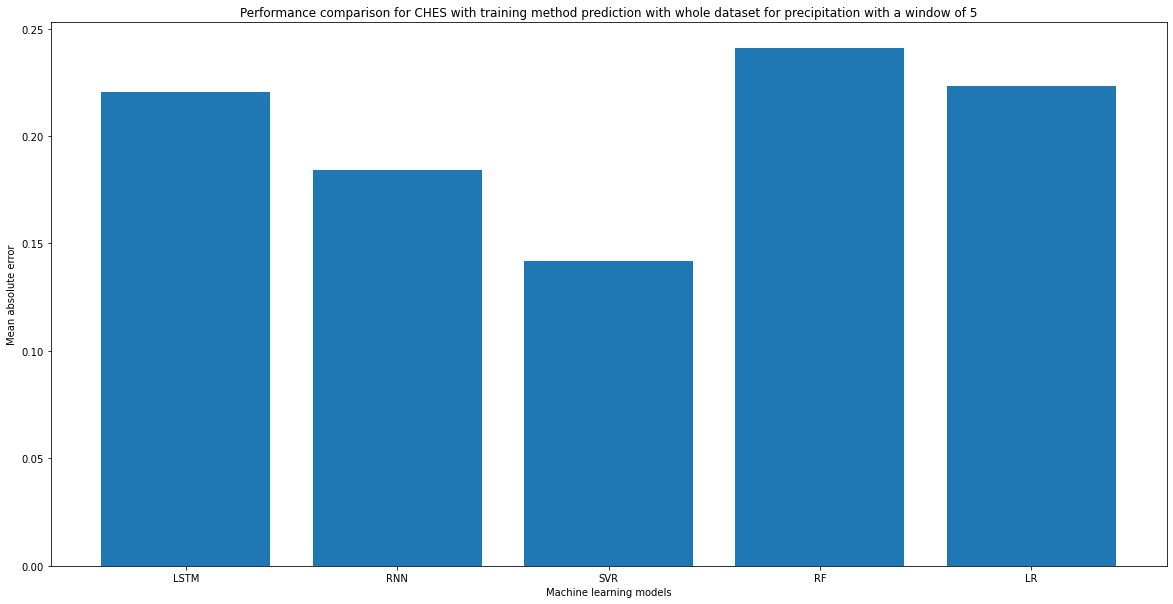

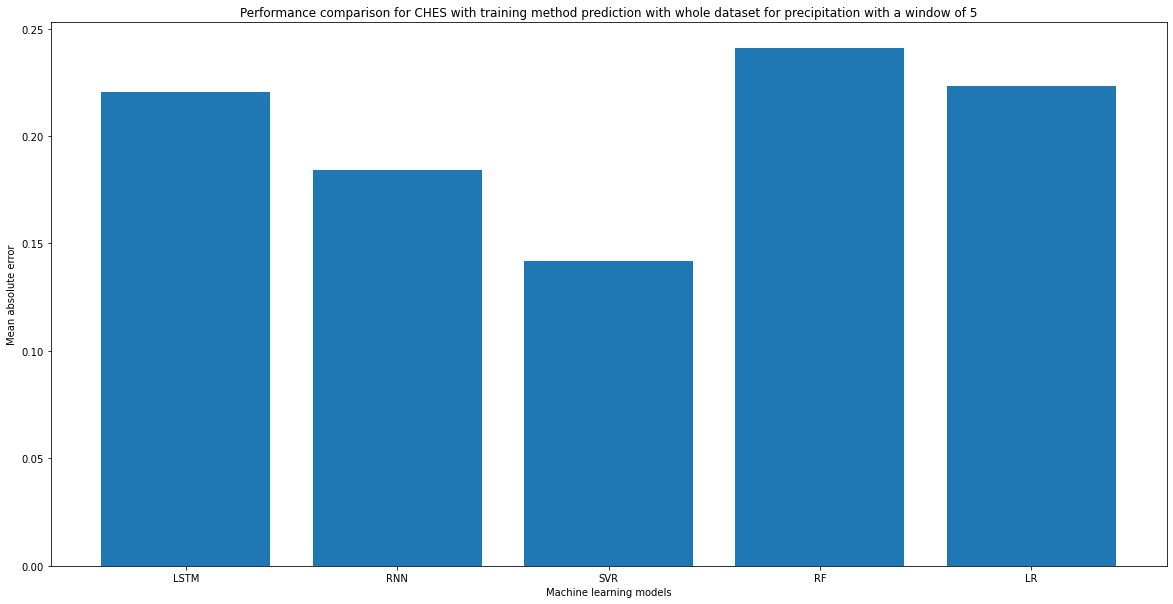

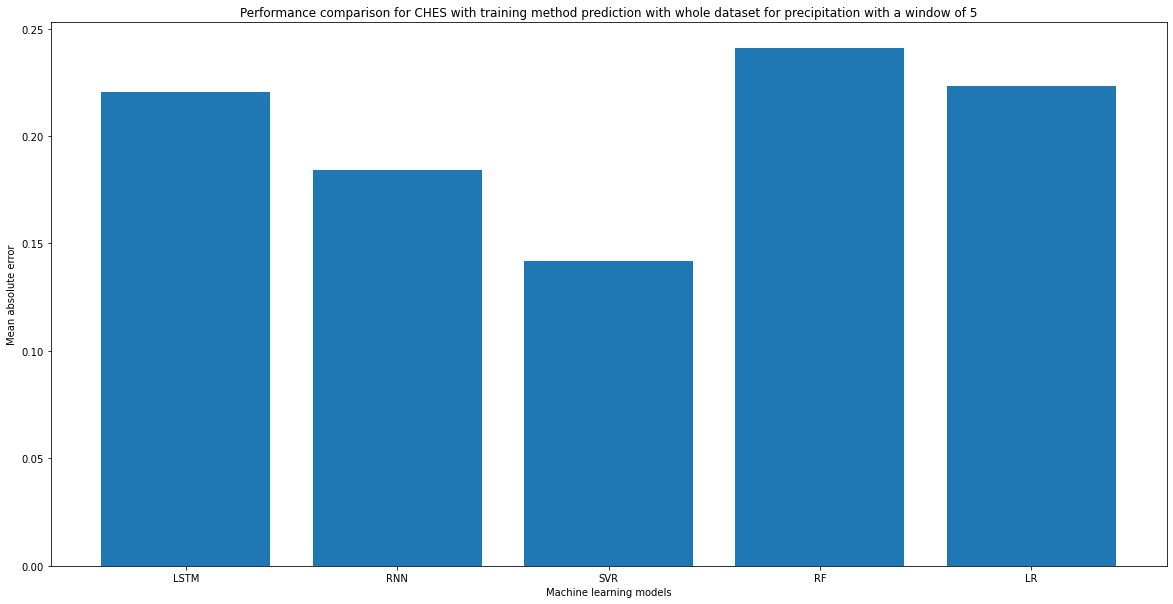

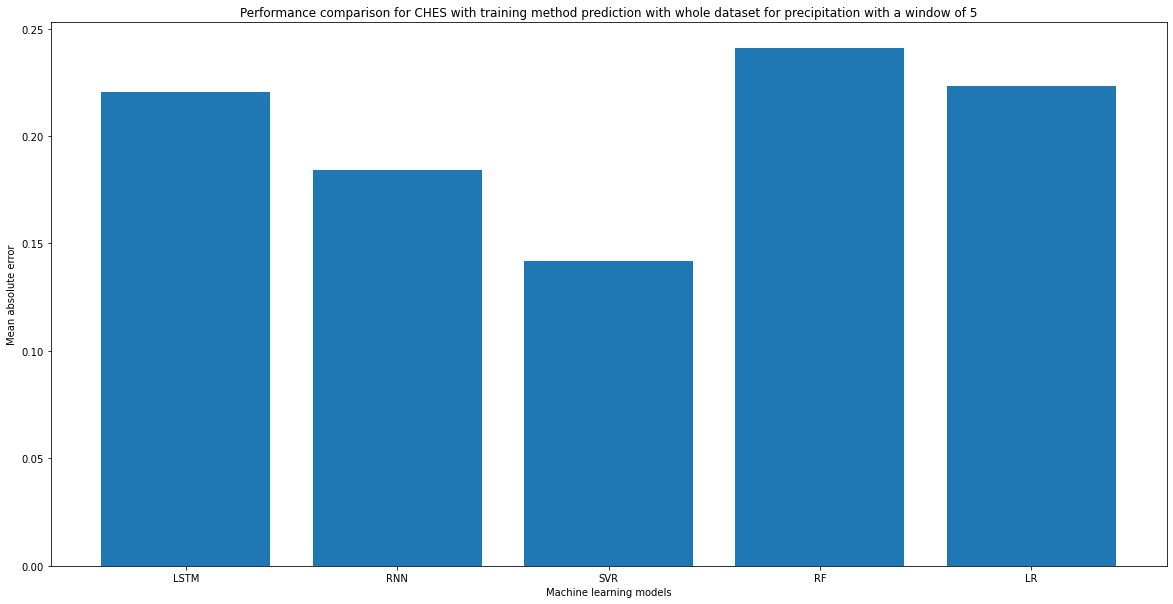

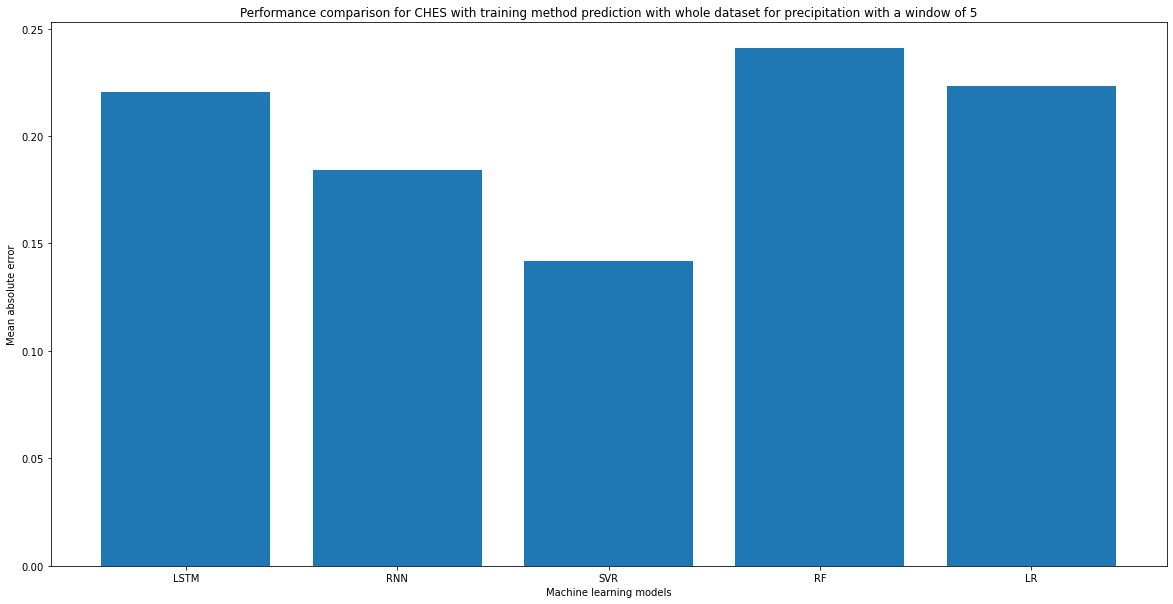

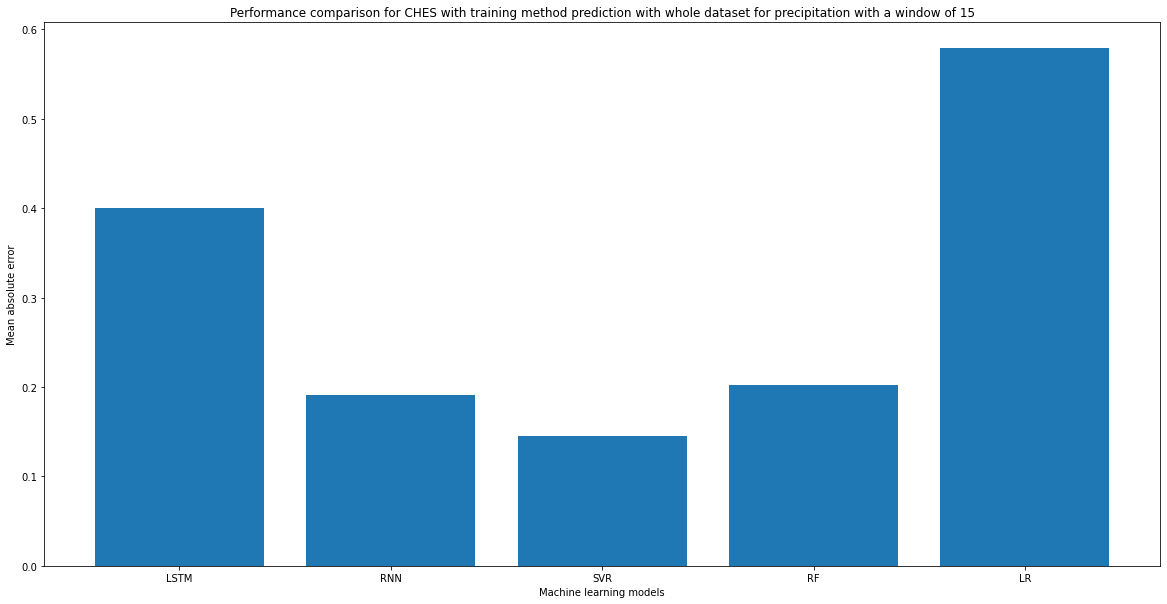

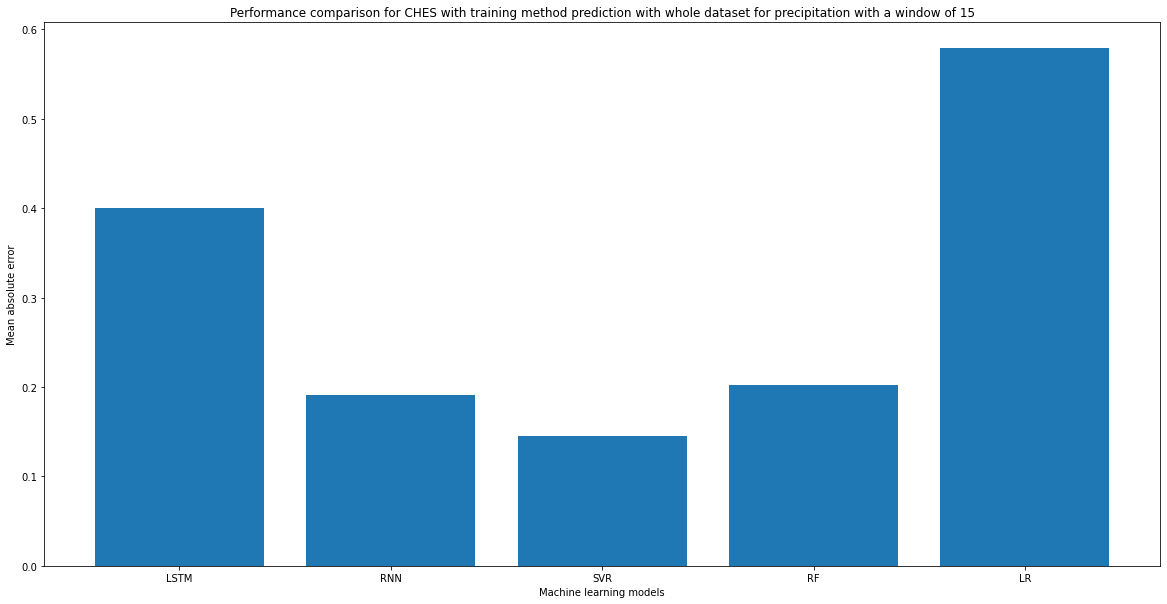

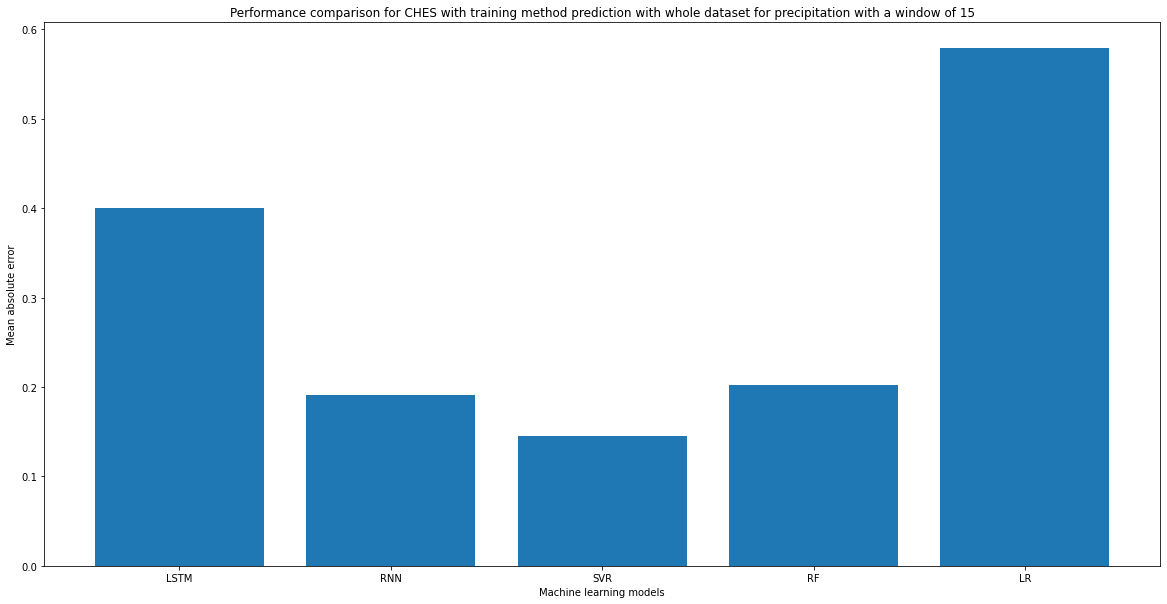

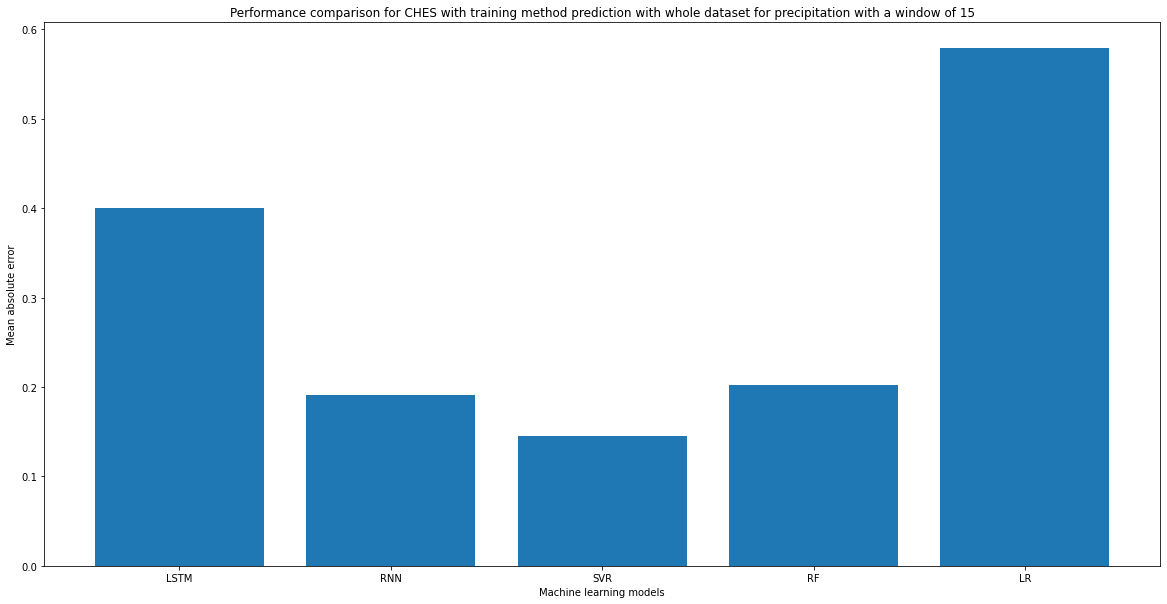

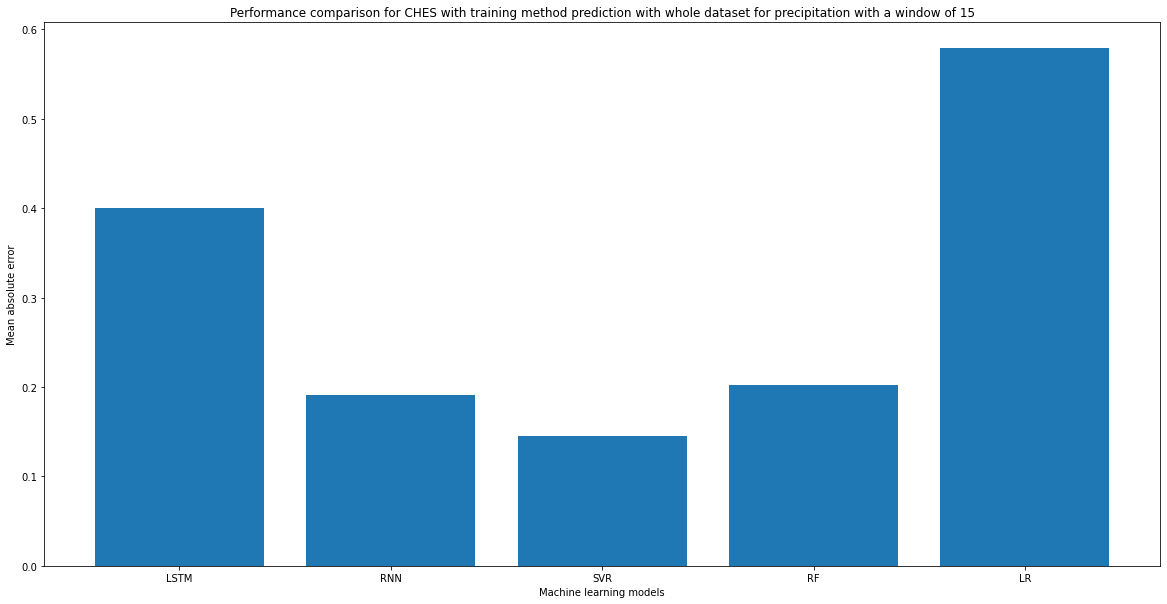

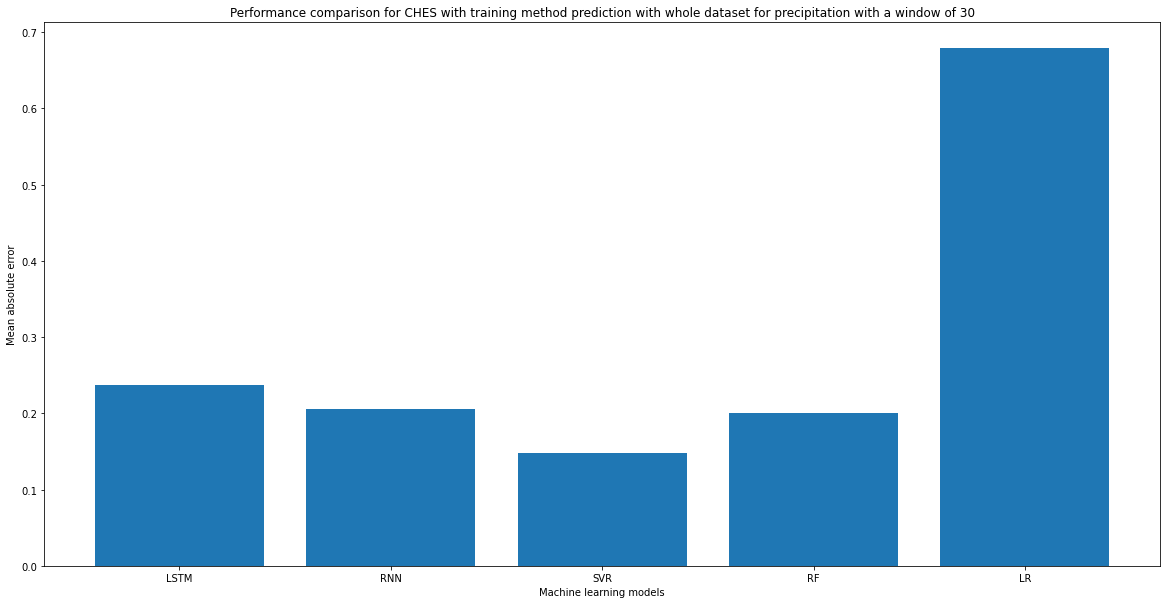

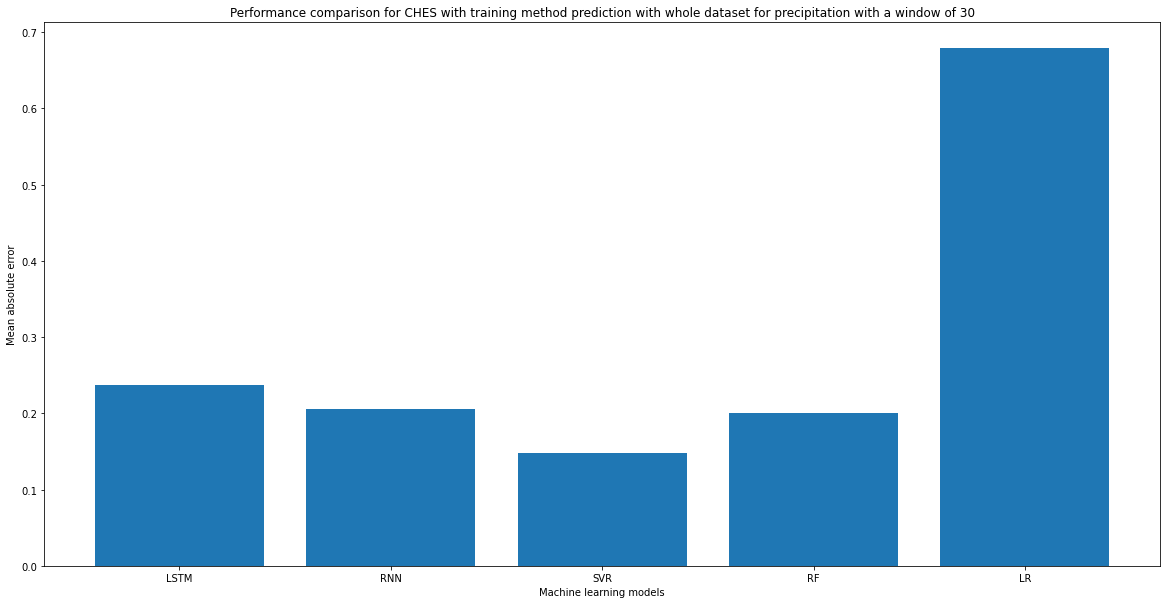

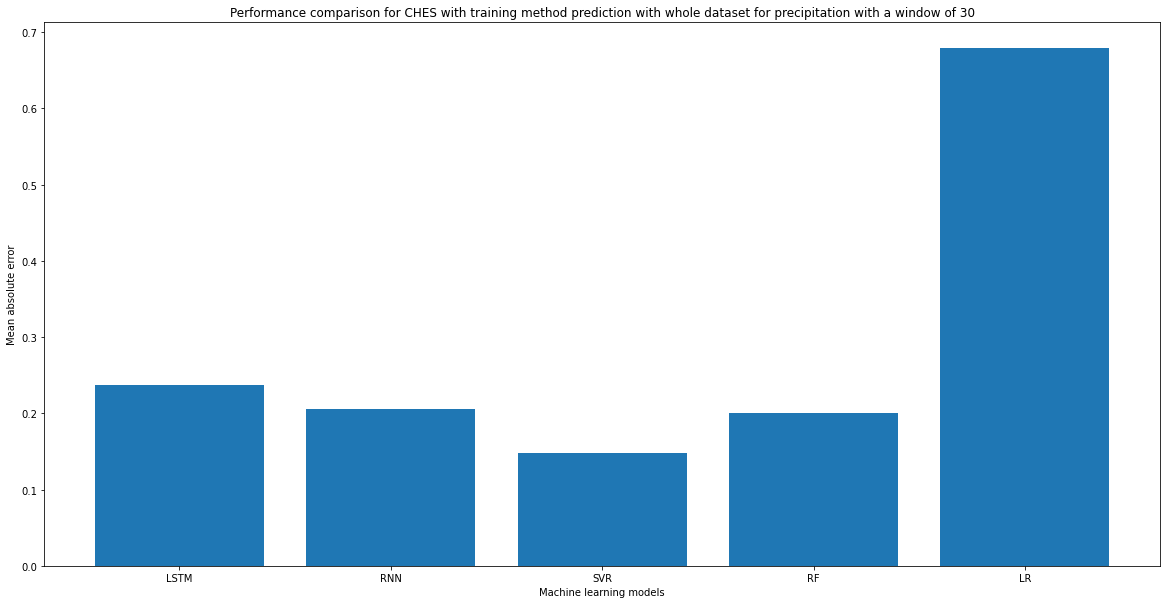

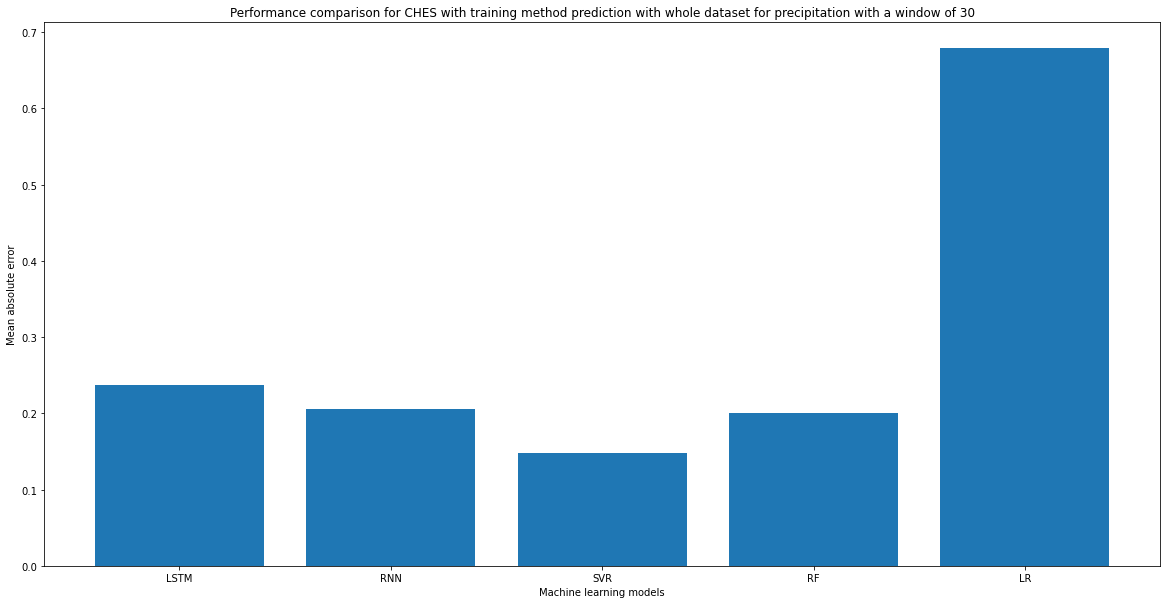

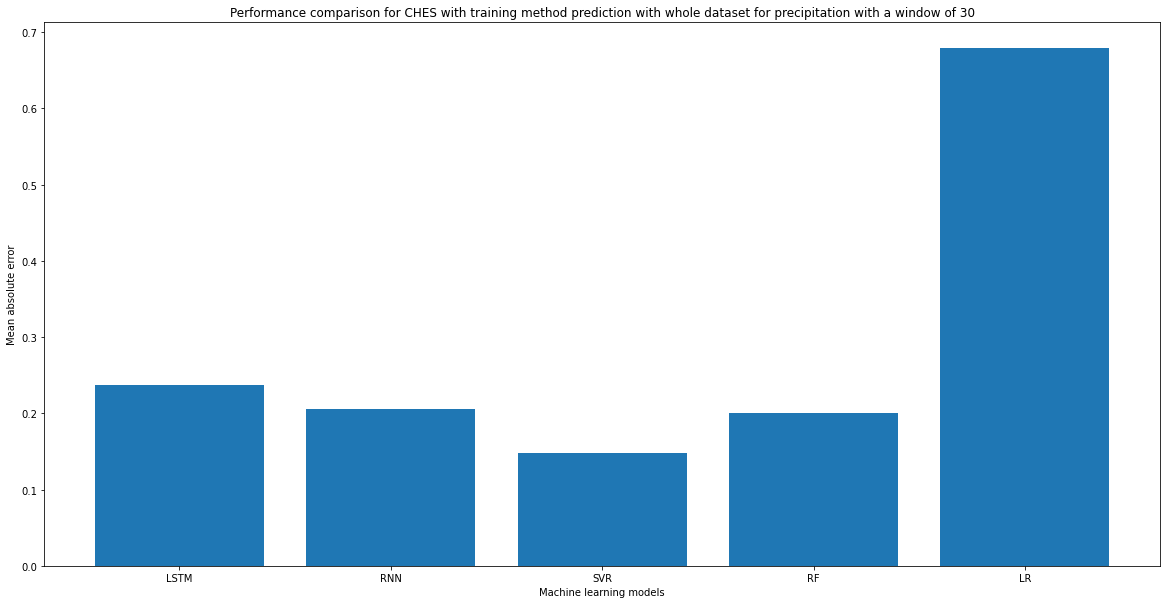

In [8]:
model_list = ['AR','ARIMA','SARIMA','RNN','LSTM',"LR",'RF',"SVR"]
station_list = ['CHES']
target_list = ['temperature','humidity','precipitation']
window_list = [5,15,30]
train_method_list = ['prediction with target only','prediction with whole dataset']


for station_name in station_list:
    print(station_name)
    for train_method in train_method_list:
        print(train_method)
        for target_variable in target_list:
            print(target_variable)
            for window in window_list:
                print(window)
                for model in model_list:
                    temp = mae[(mae['station']==station_name) &
                               (mae['train_method']==train_method) &
                               (mae['target']==target_variable) &
                               (mae["window"]==window)]
                    if len(temp)==0:
                        continue
                    if model == "AR" and train_method == 'prediction with whole dataset':
                        continue
                    if model == "ARIMA" and train_method == 'prediction with whole dataset':
                        continue
                    if model == "SARIMA" and train_method == 'prediction with whole dataset':
                        continue
                    plt.figure(figsize=(20,10))
                    plt.bar(temp['model'],temp['mae'])
                    plt.xlabel("Machine learning models")
                    plt.ylabel("Mean absolute error")
                    plt.title('Performance comparison for '+station_name+' with training method '+train_method+ " for "+target_variable+" with a window of "+str(window))
                    plt.savefig(path+'//Graphs//'+model+'//'+station_name+"_"+model+"_"+train_method+"_"+target_variable+"_"+str(window)+".png")
                    
                   